In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
dataframed = pd.read_csv('final_test.csv')
dataframed.head()

,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M


In [4]:
dataframed.columns.values.tolist()

['weight', 'age', 'height', 'size']

In [5]:
dataframed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119734 entries, 0 to 119733
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   weight  119734 non-null  int64  
 1   age     119477 non-null  float64
 2   height  119404 non-null  float64
 3   size    119734 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 3.7+ MB


In [6]:
dataframed.describe()

,weight,age,height
count,119734.000000,119477.000000,119404.000000
mean,61.756811,34.027311,165.805794
std,9.944863,8.149447,6.737651
min,22.000000,0.000000,137.160000
25%,55.000000,29.000000,160.020000
50%,61.000000,32.000000,165.100000
75%,67.000000,37.000000,170.180000
max,136.000000,117.000000,193.040000


In [7]:
dataframed.dtypes

weight      int64
age       float64
height    float64
size       object
dtype: object

In [8]:
dataframed.isnull().sum()

weight      0
age       257
height    330
size        0
dtype: int64

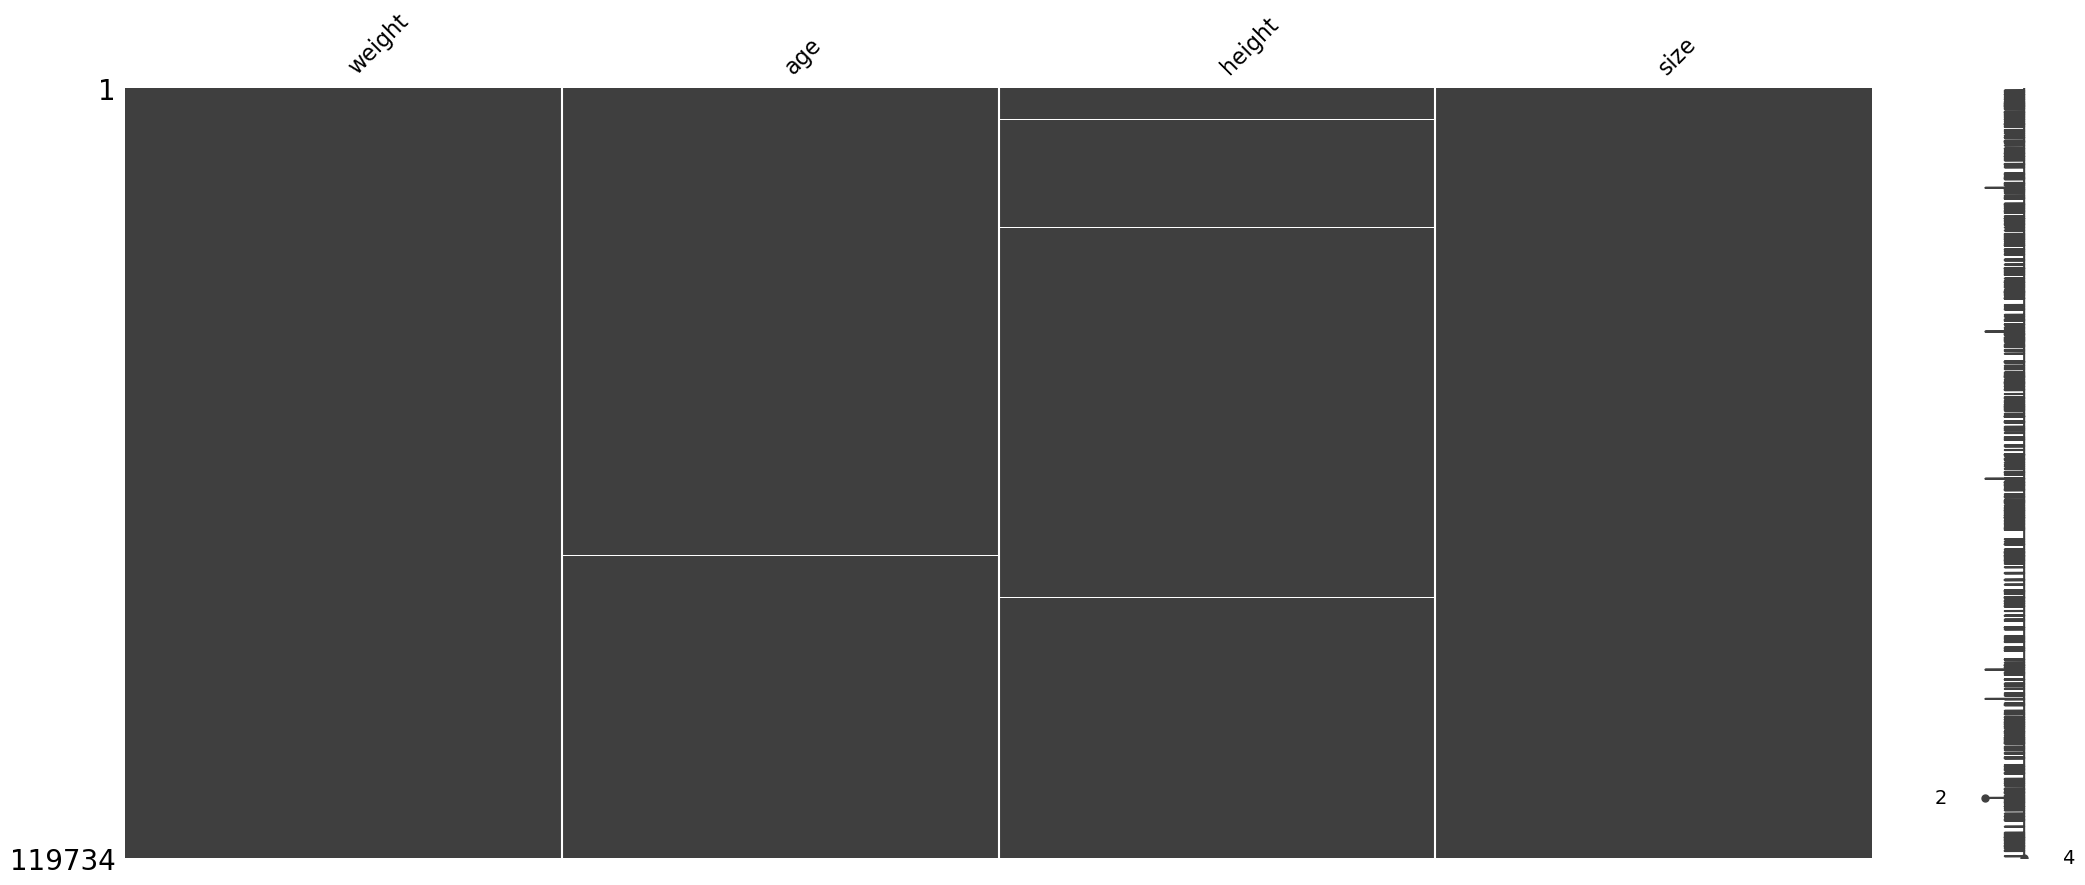

In [9]:
import missingno as msno
msno.matrix(dataframed)
plt.show()

In [10]:
dataframed['age'] = dataframed['age'].fillna(dataframed['age'].median())

In [11]:
dataframed['height'] = dataframed['height'].fillna(dataframed['height'].median())

In [12]:
dataframed['size'] = dataframed['size'].map({"XXS": 1, "S": 2, "M" : 3, "L" : 4, "XL" : 5, "XXL" : 6, "XXXL" : 7})

In [13]:
dataframed['bmi'] = dataframed['weight'] / (pow(dataframed['height'] / 100, 2))

In [14]:
print('Rentang Nilai Di Antara 5 Kolom')

print('weight/berat : {:.4f}'.format(min(dataframed['weight'])) + ' - {:.4f}'.format(max(dataframed['weight'])))
print('age/umur : {:.4f}'.format(min(dataframed['age'])) + ' - {:.4f}'.format(max(dataframed['age'])))
print('height/tinggi : {:.4f}'.format(min(dataframed['height'])) + ' - {:.4f}'.format(max(dataframed['height'])))
print('size/ukuran : {:.4f}'.format(min(dataframed['size'])) + ' - {:.4f}'.format(max(dataframed['size'])))
print('BMI : {:.4f}'.format(min(dataframed['bmi'])) + ' - {:.4f}'.format(max(dataframed['bmi'])))

Rentang Nilai Di Antara 5 Kolom
weight/berat : 22.0000 - 136.0000
age/umur : 0.0000 - 117.0000
height/tinggi : 137.1600 - 193.0400
size/ukuran : 1.0000 - 7.0000
BMI : 7.8283 - 54.3236


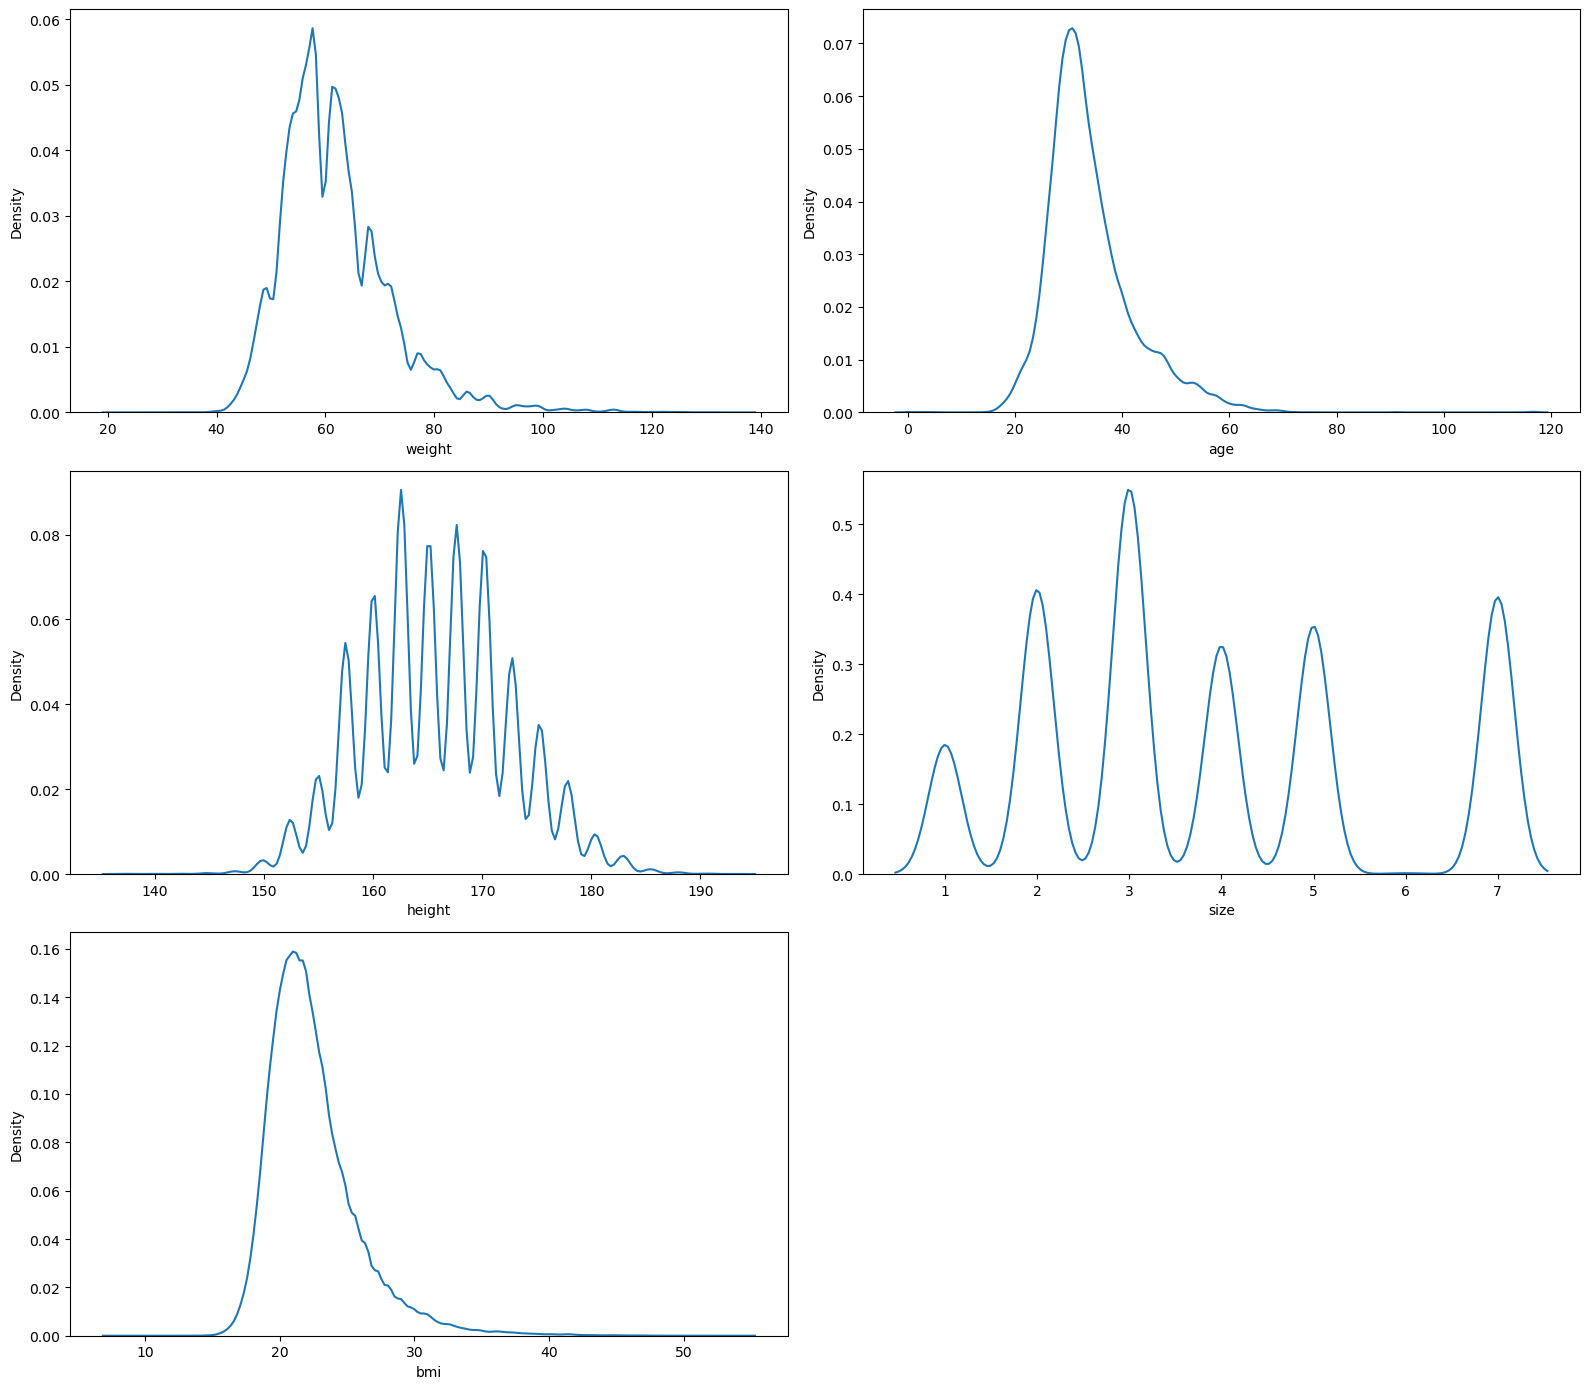

In [15]:
plt.figure(figsize=(16,14))
for i,col in enumerate(dataframed.columns):
    plt.subplot(3,2,i+1)
    sns.kdeplot(data=dataframed[col])
    plt.tight_layout()

[Text(0.5, 58.219999999999985, 'Heatmap koefisien korelasi')]

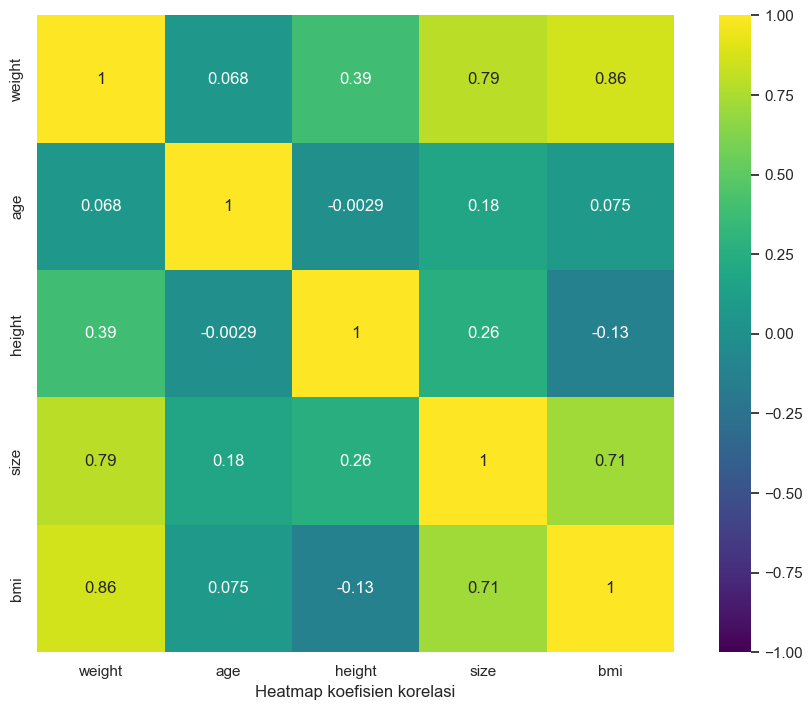

In [16]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
Heated = sns.heatmap(dataframed.corr("pearson"),vmin=-1, vmax=1,cmap='viridis',annot=True, square=True)
Heated.set(xlabel = "Heatmap koefisien korelasi")

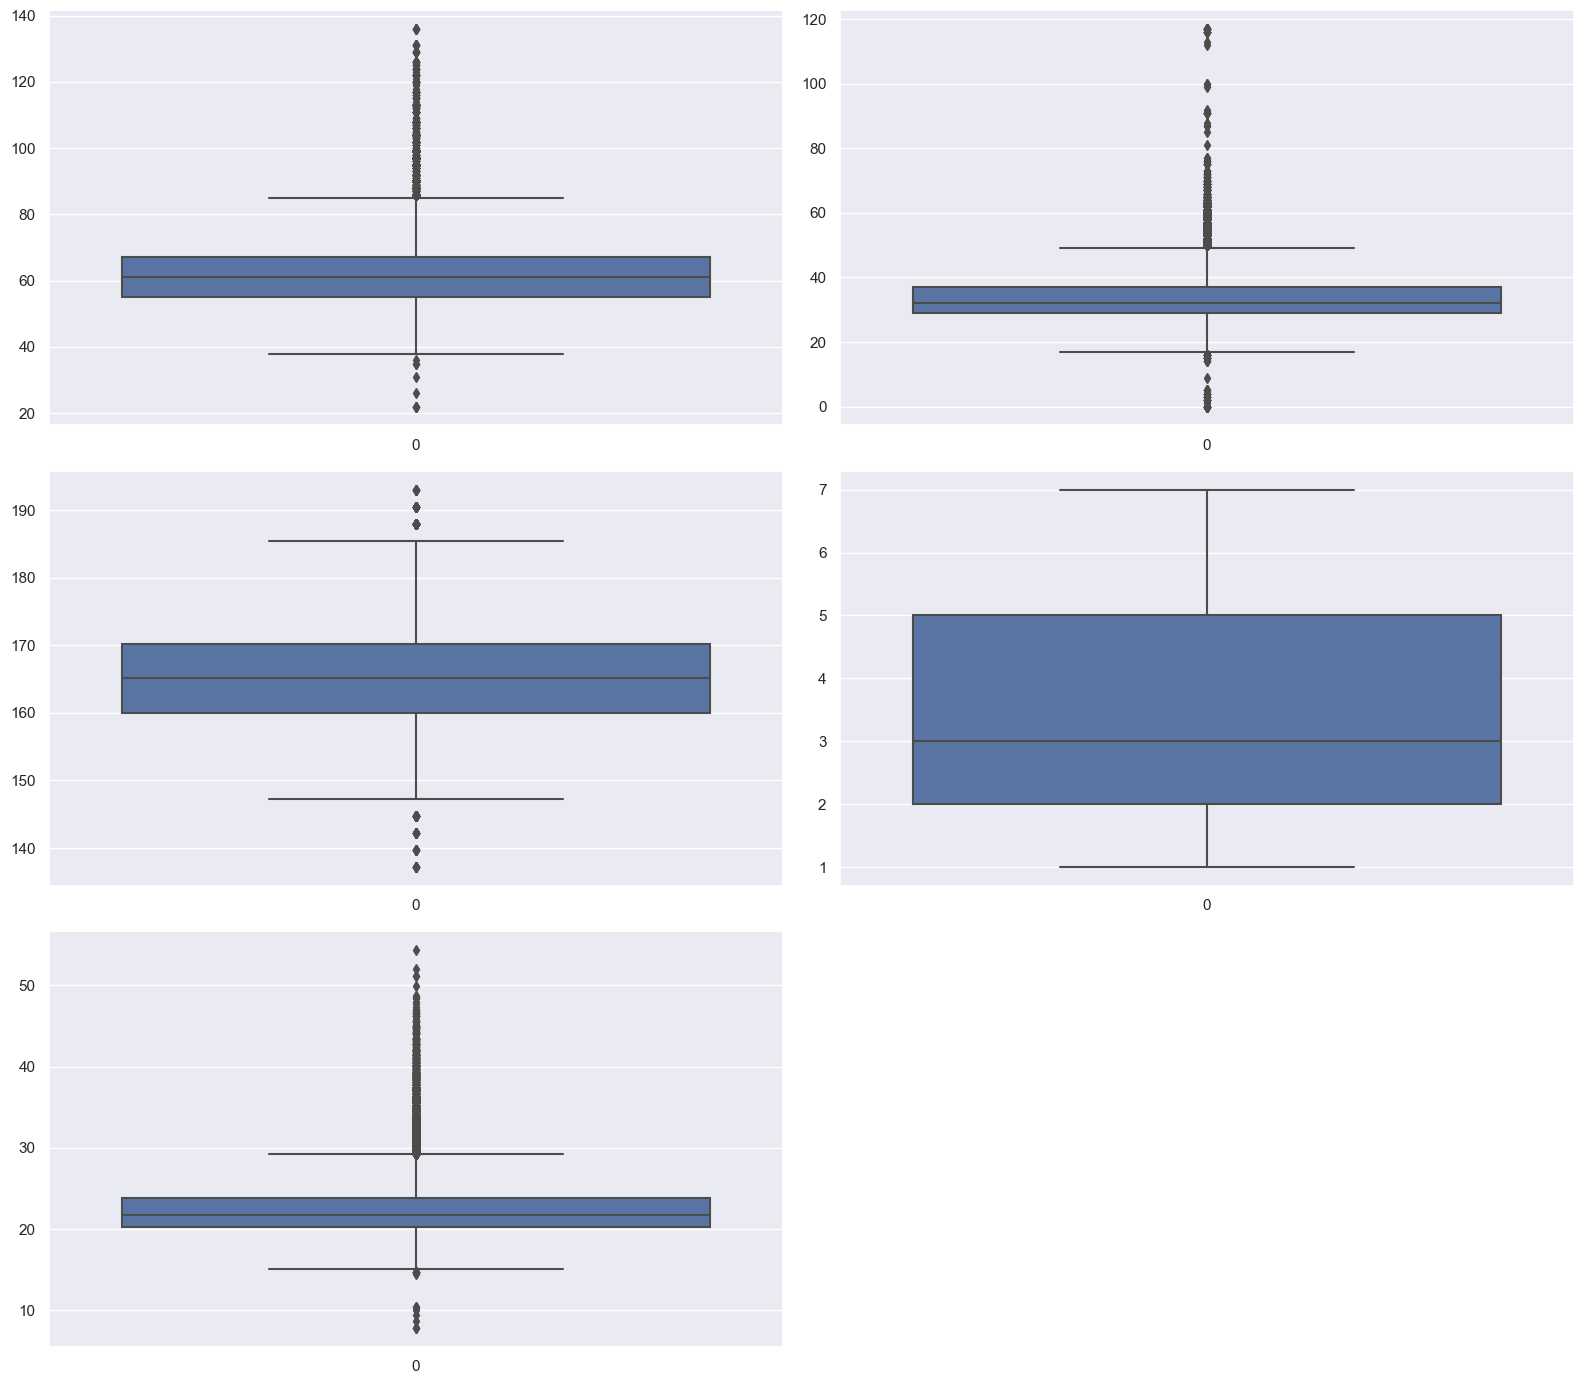

In [17]:
plt.figure(figsize=(16,14))
for i,col in enumerate(dataframed.columns):
    plt.subplot(3,2,i+1)
    sns.boxplot(data=dataframed[col])
    
    plt.tight_layout()

[(22.0, 136.0)]

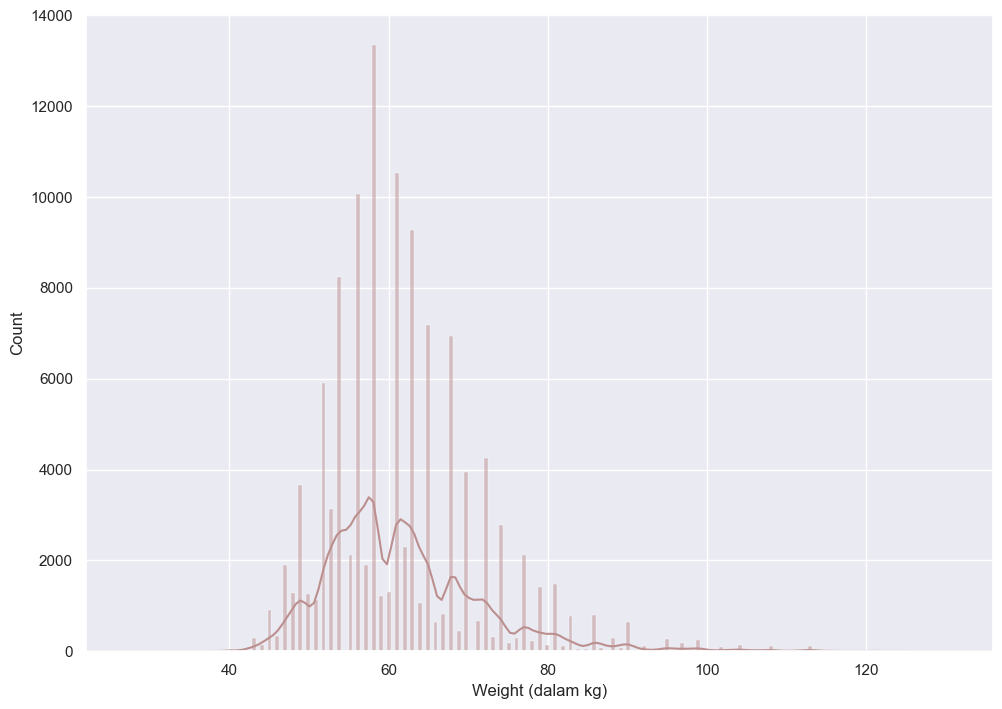

In [18]:
count_plotted = sns.histplot(x = 'weight', data = dataframed, kde = True, color = 'rosybrown')
count_plotted.set(xlabel = "Weight (dalam kg)")
count_plotted.set(xlim = (22.0000,136.0000))

[(22.0, 136.0)]

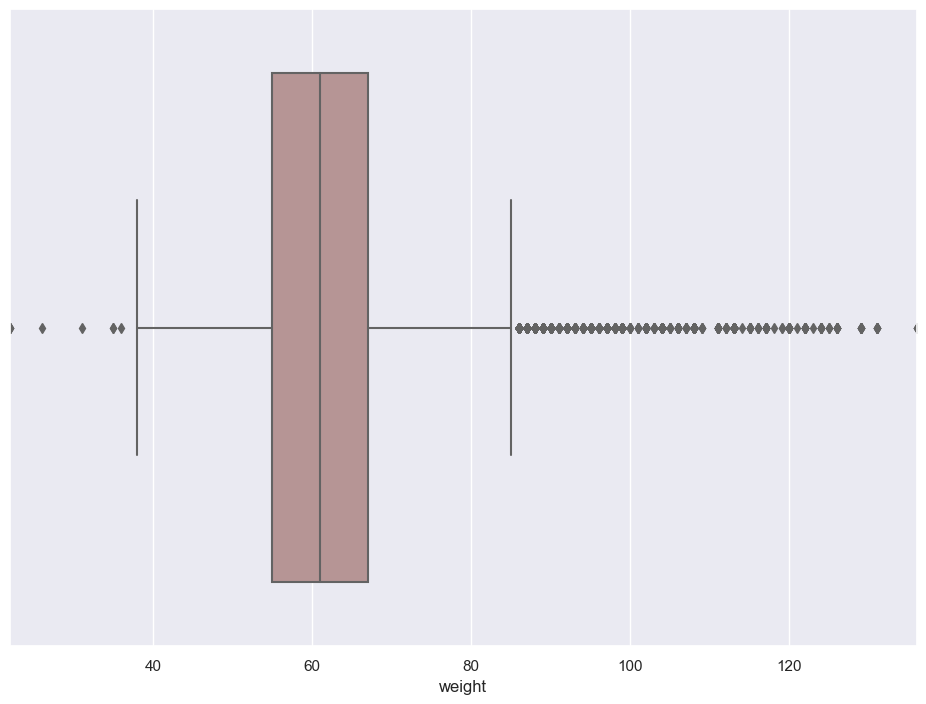

In [19]:
boxxer_plot = sns.boxplot(x = 'weight', data = dataframed, color = 'rosybrown')
boxxer_plot.set(xlim = (22.0000,136.0000))

In [20]:
numpy_array = np.array(dataframed['weight'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("Nilai outliers kurang dari {:.4f}".format(lower_bound), "atau lebih besar dari {:.4f}".format(upper_bound))
print("Ada" ,len(outliers), "outliers.")

Nilai outliers kurang dari 37.0000 atau lebih besar dari 85.0000
Ada 3510 outliers.


[(0.0, 117.0)]

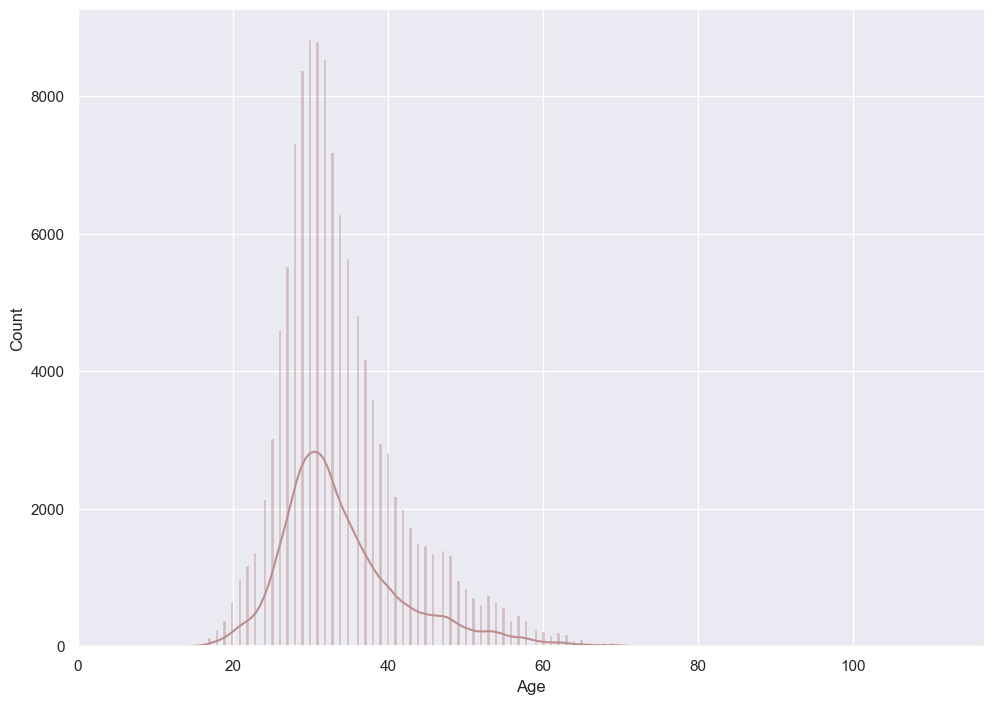

In [21]:
count_plotted = sns.histplot(x = 'age', data = dataframed, kde = True, color = 'rosybrown')
count_plotted.set(xlabel = "Age")
count_plotted.set(xlim = (0.0000, 117.0000))

[(0.0, 117.0)]

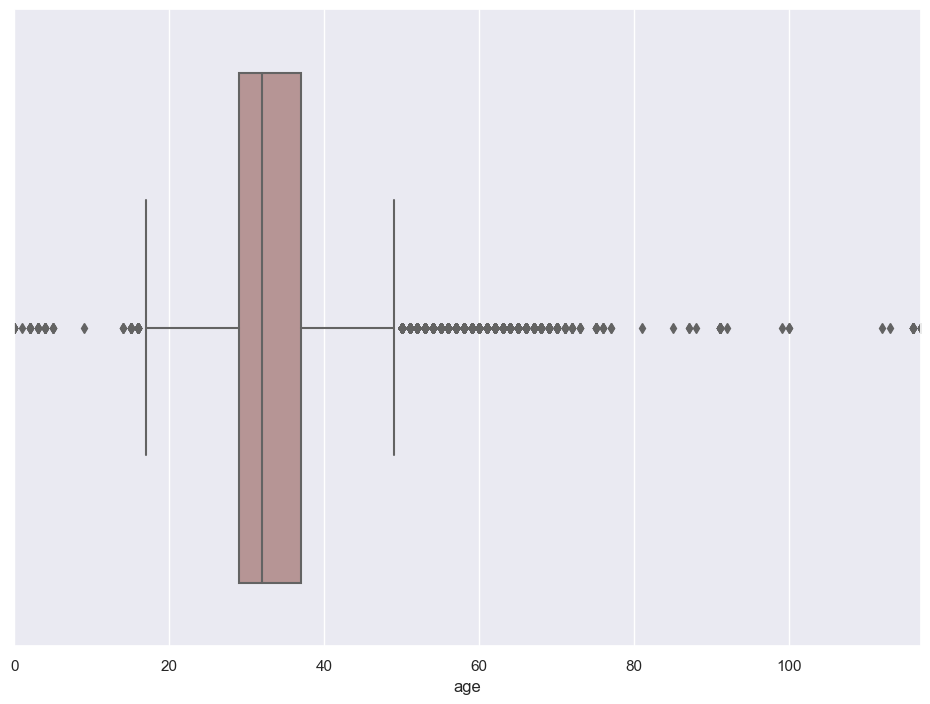

In [22]:
boxxer_plot = sns.boxplot(x = 'age', data = dataframed, color = 'rosybrown')
boxxer_plot.set(xlim = (0.0000, 117.0000))

In [23]:
numpy_array = np.array(dataframed['age'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("Nilai outliers kurang dari {:.4f}".format(lower_bound), "atau lebih besar dari {:.4f}".format(upper_bound))
print("Ada" ,len(outliers), "outliers.")

Nilai outliers kurang dari 17.0000 atau lebih besar dari 49.0000
Ada 6726 outliers.


[(137.16, 193.04)]

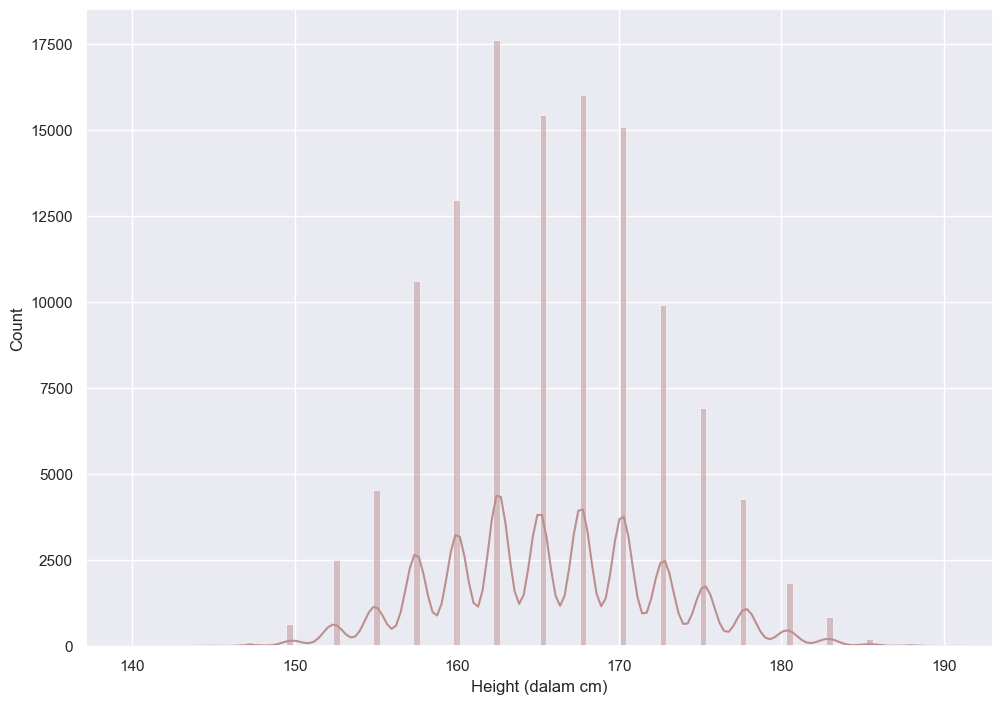

In [24]:
count_plotted = sns.histplot(x = 'height', data = dataframed, kde = True, color = 'rosybrown')
count_plotted.set(xlabel = "Height (dalam cm)")
count_plotted.set(xlim = (137.1600, 193.0400))

[(137.16, 193.04)]

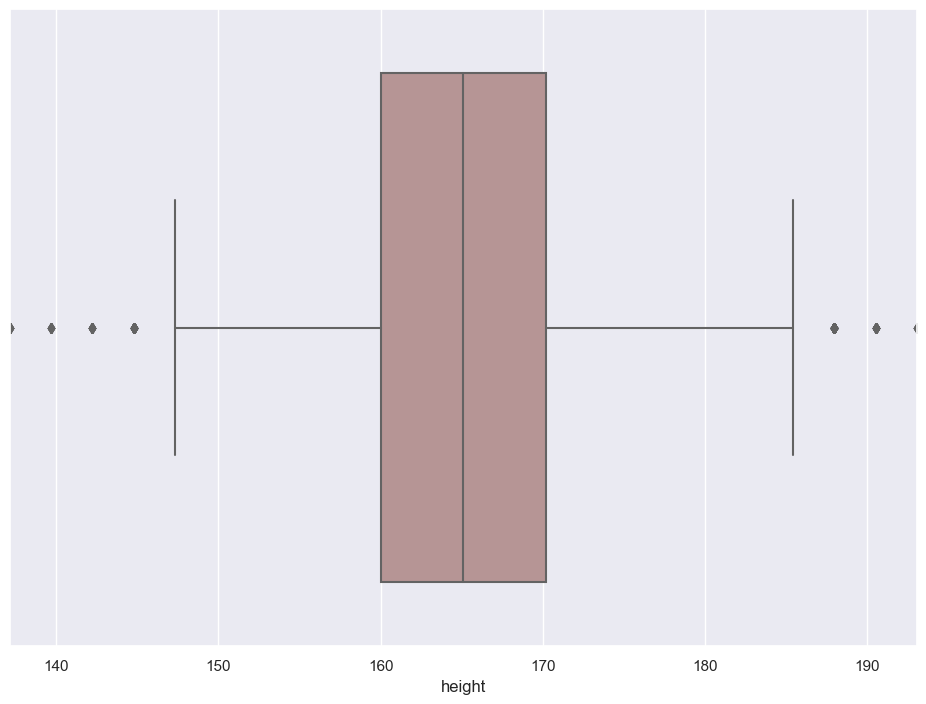

In [25]:
boxxer_plot = sns.boxplot(x = 'height', data = dataframed, color = 'rosybrown')
boxxer_plot.set(xlim = (137.1600, 193.0400))

In [26]:
numpy_array = np.array(dataframed['height'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("Nilai outliers kurang dari {:.4f}".format(lower_bound), "atau lebih besar dari {:.4f}".format(upper_bound))
print("Ada" ,len(outliers), "outliers.")

Nilai outliers kurang dari 144.7800 atau lebih besar dari 185.4200
Ada 185 outliers.


[(1.0, 7.0)]

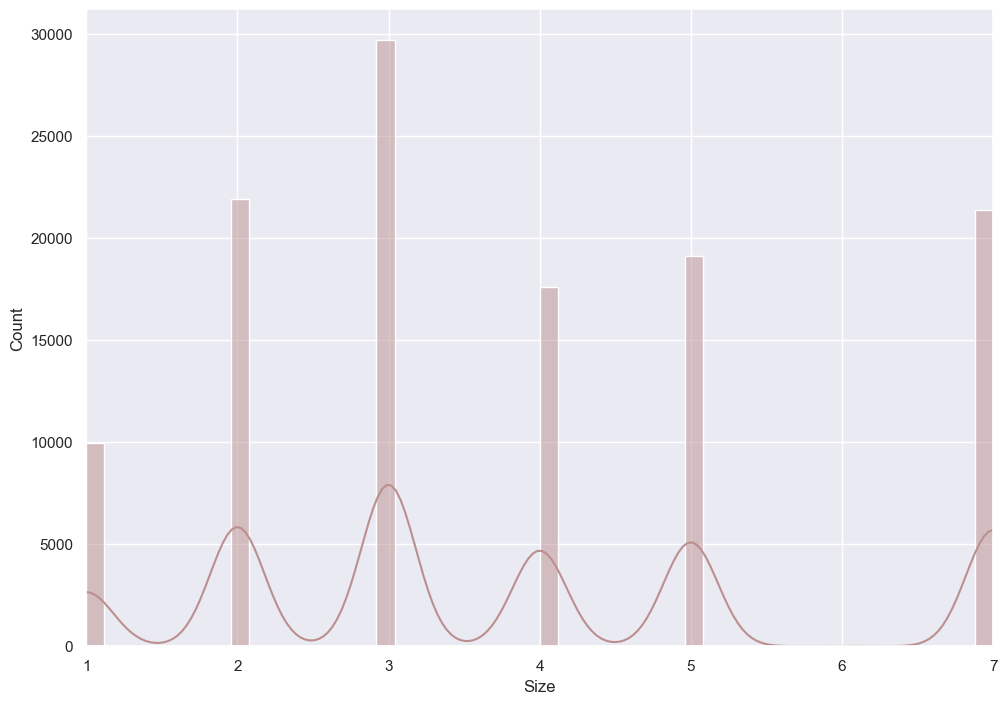

In [27]:
count_plotted = sns.histplot(x = 'size', data = dataframed, kde = True, color = 'rosybrown')
count_plotted.set(xlabel = "Size")
count_plotted.set(xlim = (1.0000, 7.0000))

[(1.0, 7.0)]

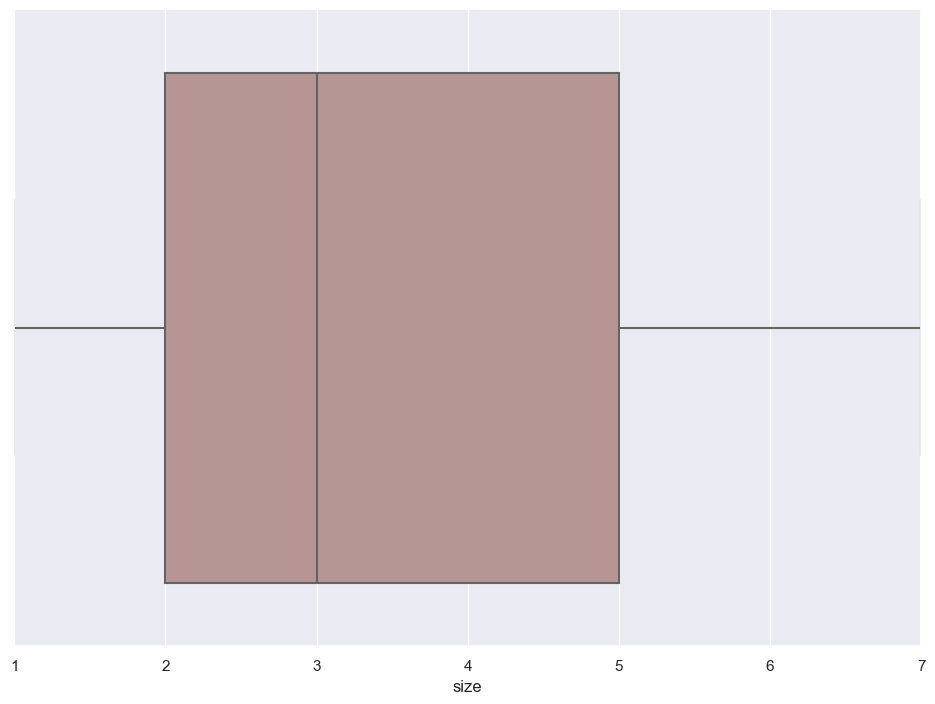

In [28]:
boxxer_plot = sns.boxplot(x = 'size', data = dataframed, color = 'rosybrown')
boxxer_plot.set(xlim = (1.0000, 7.0000))

In [29]:
numpy_array = np.array(dataframed['size'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("Nilai Outliers lebih besar dari {:.4f}".format(upper_bound))
print("Ada" ,len(outliers), "outliers.")

Nilai Outliers lebih besar dari 9.5000
Ada 0 outliers.


[(7.8283, 54.3236)]

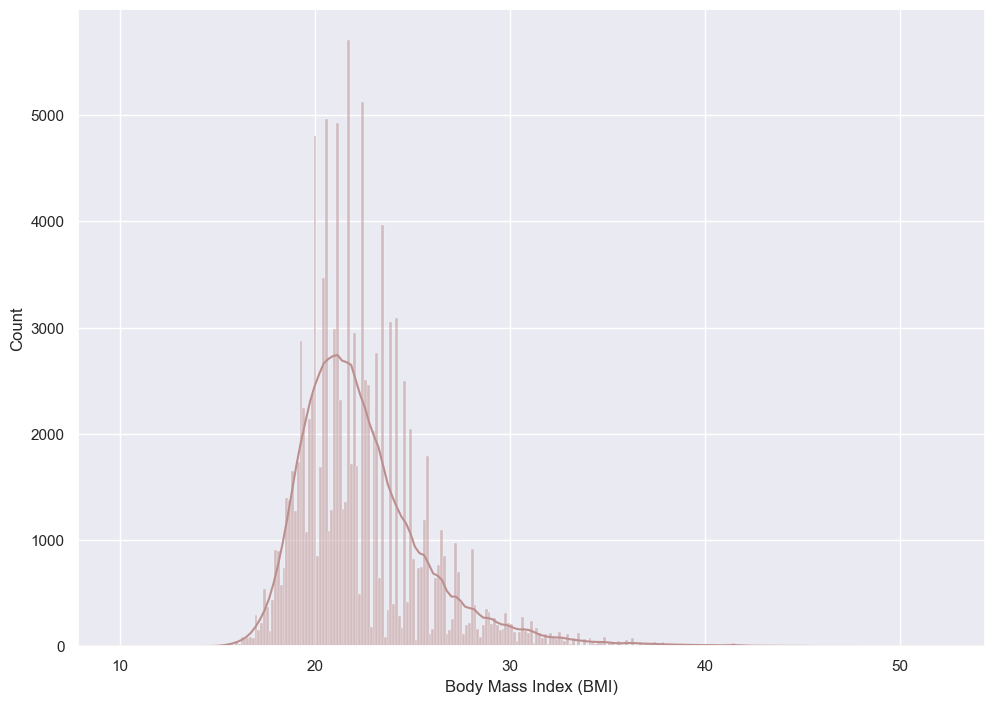

In [30]:
count_plotted = sns.histplot(x = 'bmi', data = dataframed, kde = True, color = 'rosybrown')
count_plotted.set(xlabel = "Body Mass Index (BMI)")
count_plotted.set(xlim = (7.8283, 54.3236))

[(7.8283, 54.3236)]

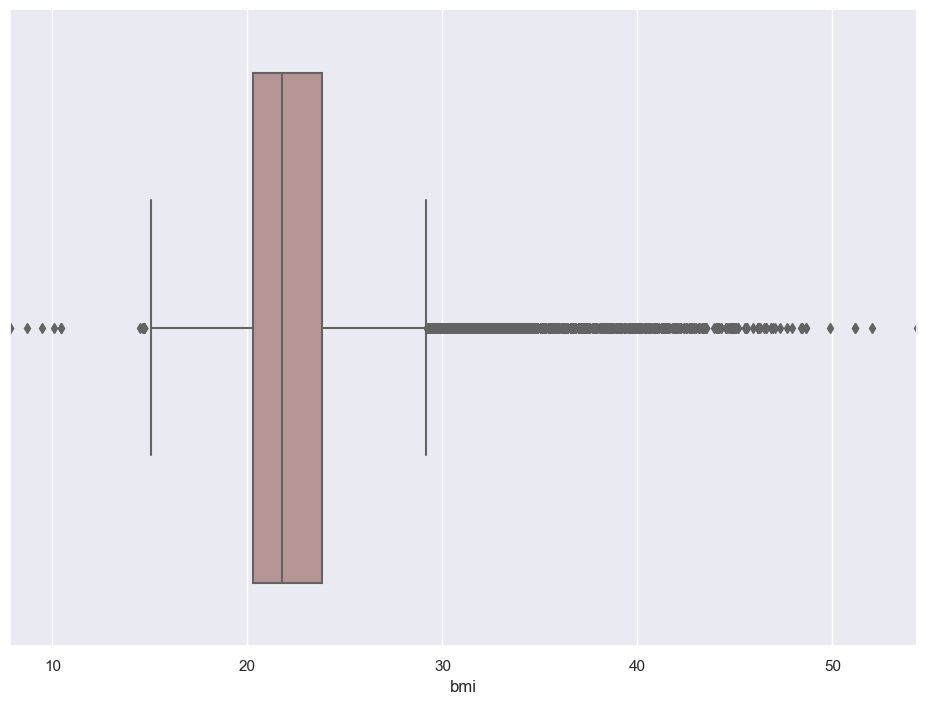

In [31]:
boxxer_plot = sns.boxplot(x = 'bmi', data = dataframed, color = 'rosybrown')
boxxer_plot.set(xlim = (7.8283, 54.3236))

In [32]:
numpy_array = np.array(dataframed['bmi'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("Nilai outliers kurang dari {:.4f}".format(lower_bound), "atau lebih besar dari {:.4f}".format(upper_bound))
print("Ada" ,len(outliers), "outliers.")

Nilai outliers kurang dari 14.9449 atau lebih besar dari 29.1782
Ada 5166 outliers.


[(22.0, 136.0)]

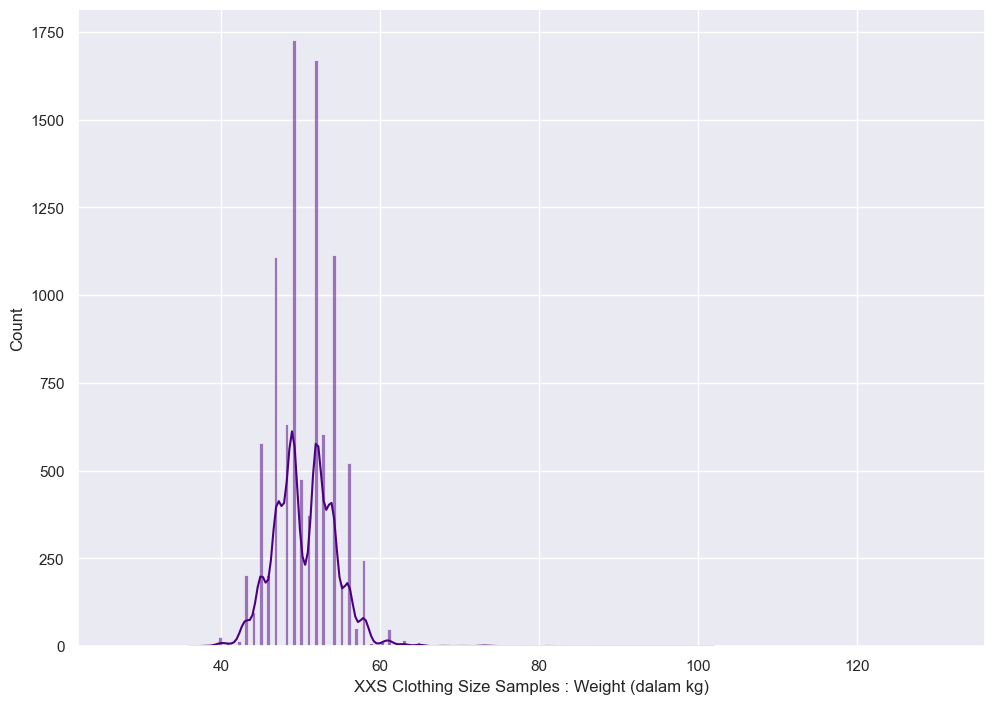

In [33]:
count_plotted = sns.histplot(x = 'weight', data = dataframed.loc[dataframed['size'] == 1], kde = True, color = 'indigo')
count_plotted.set(xlabel = "XXS Clothing Size Samples : Weight (dalam kg)")
count_plotted.set(xlim = (22.0000,136.0000))

[Text(0.5, 0, 'XXS Clothing Size Samples : Weight (dalam kg)')]

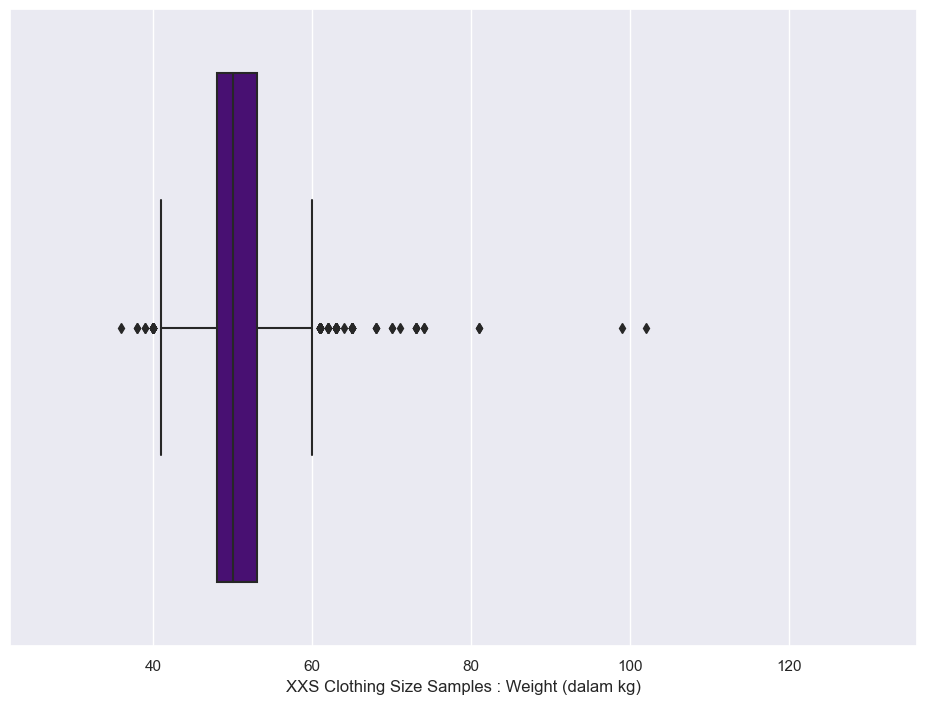

In [34]:
boxxer_plot = sns.boxplot(x = 'weight', data = dataframed.loc[dataframed['size'] == 1], color = 'indigo')
boxxer_plot.set(xlim = (22.0000,136.0000))
boxxer_plot.set(xlabel = "XXS Clothing Size Samples : Weight (dalam kg)")

In [35]:
numpy_array = np.array(dataframed.loc[dataframed['size'] == 1]['weight'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("Nilai outliers kurang dari {:.4f}".format(lower_bound), "atau lebih besar dari {:.4f}".format(upper_bound))
print("Ada" ,len(outliers), "outliers.")

Nilai outliers kurang dari 40.5000 atau lebih besar dari 60.5000
Ada 132 outliers.


[(0.0, 117.0)]

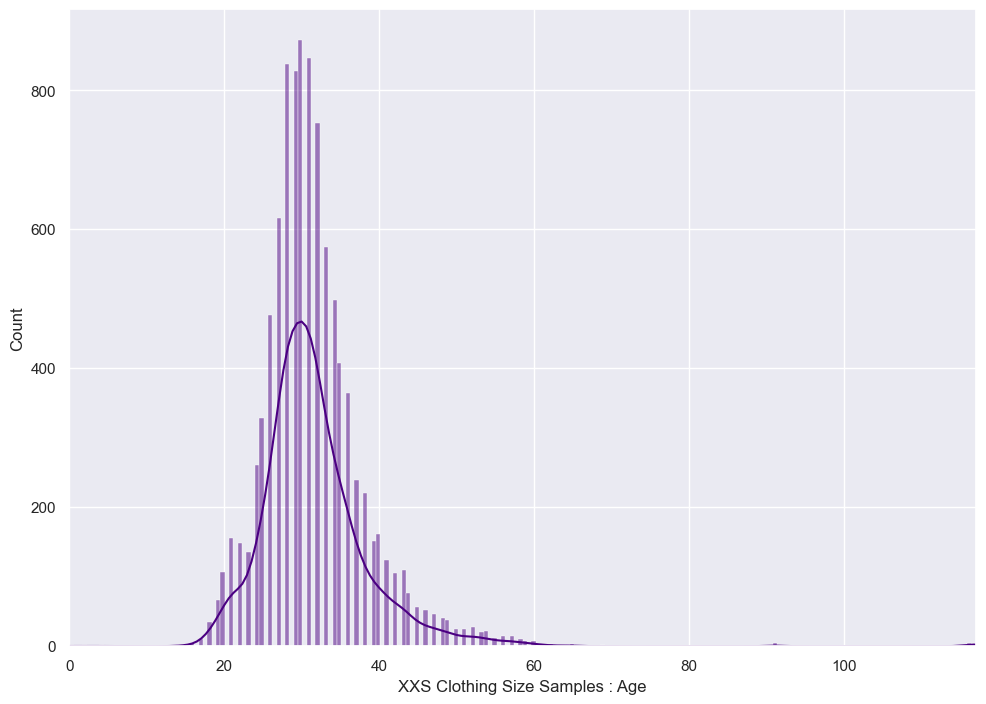

In [36]:
count_plotted = sns.histplot(x = 'age', data = dataframed.loc[dataframed['size'] == 1], kde = True, color = 'indigo')
count_plotted.set(xlabel = "XXS Clothing Size Samples : Age")
count_plotted.set(xlim = (0.0000, 117.0000))

[Text(0.5, 0, 'XXS Clothing Size Samples : Age')]

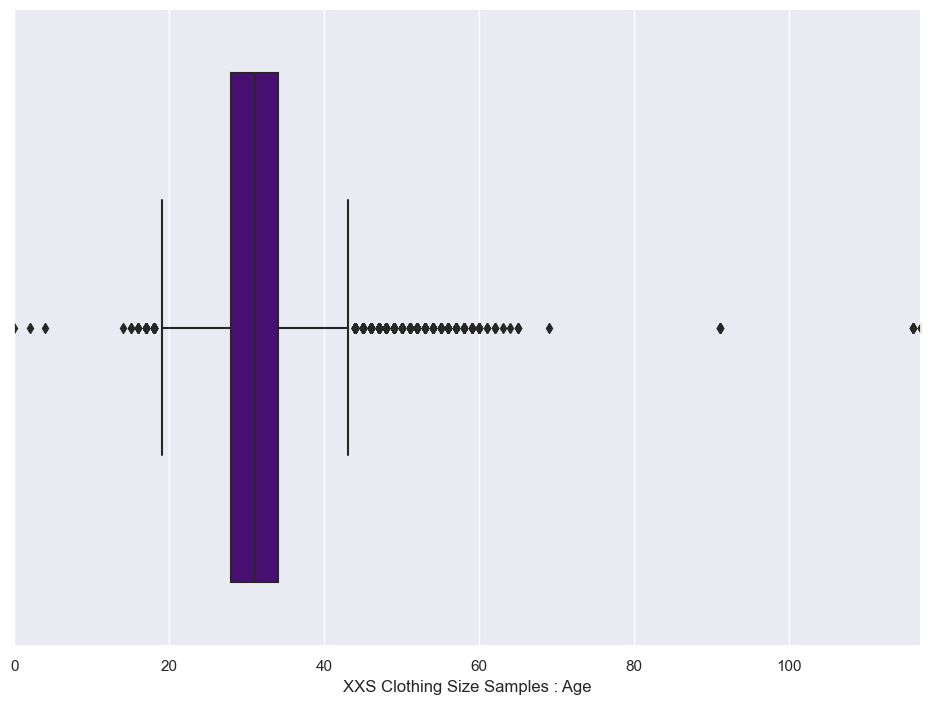

In [37]:
boxxer_plot = sns.boxplot(x = 'age', data = dataframed.loc[dataframed['size'] == 1], color = 'indigo')
boxxer_plot.set(xlim = (0.0000, 117.0000))
boxxer_plot.set(xlabel = "XXS Clothing Size Samples : Age")

In [38]:
numpy_array = np.array(dataframed.loc[dataframed['size'] == 1]['age'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("Nilai outliers kurang dari {:.4f}".format(lower_bound), "atau lebih besar dari {:.4f}".format(upper_bound))
print("Ada" ,len(outliers), "outliers.")

Nilai outliers kurang dari 19.0000 atau lebih besar dari 43.0000
Ada 576 outliers.


[(137.16, 193.04)]

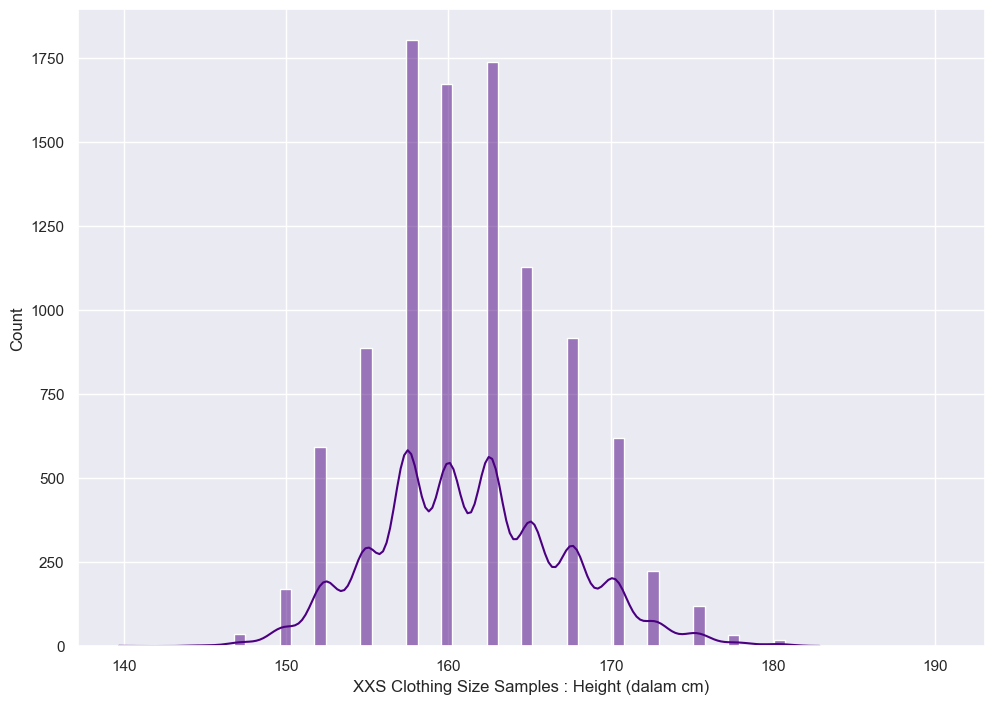

In [39]:
count_plotted = sns.histplot(x = 'height', data = dataframed.loc[dataframed['size'] == 1], kde = True, color = 'indigo')
count_plotted.set(xlabel = "XXS Clothing Size Samples : Height (dalam cm)")
count_plotted.set(xlim = (137.1600, 193.0400))

[Text(0.5, 0, 'XXS Clothing Size Samples : Height (dalam cm)')]

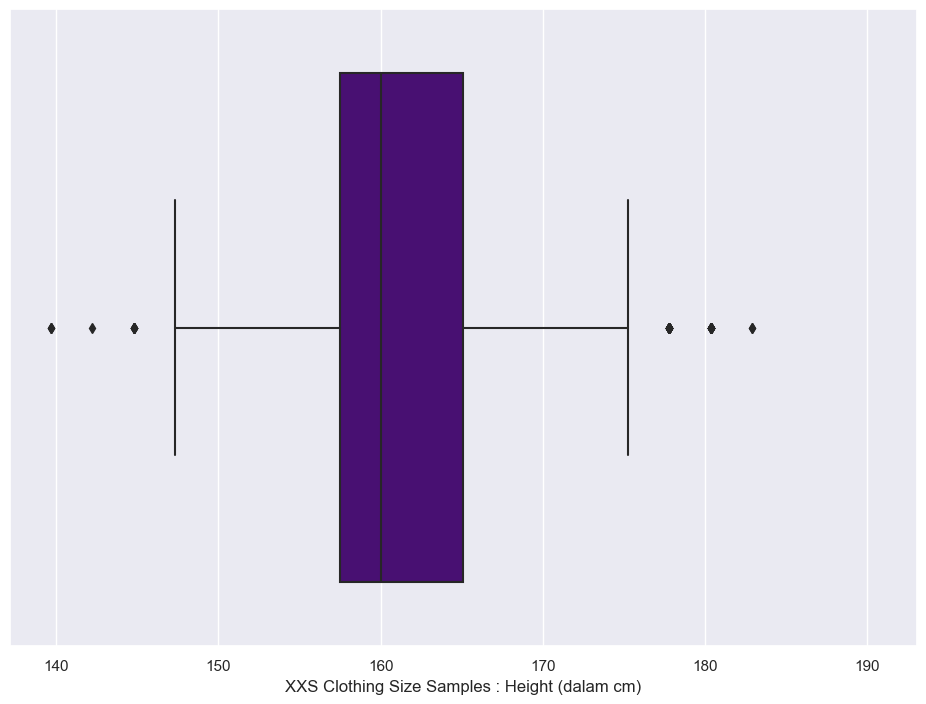

In [40]:
boxxer_plot = sns.boxplot(x = 'height', data = dataframed.loc[dataframed['size'] == 1], color = 'indigo')
boxxer_plot.set(xlim = (137.1600, 193.0400))
boxxer_plot.set(xlabel = "XXS Clothing Size Samples : Height (dalam cm)")

In [41]:
numpy_array = np.array(dataframed.loc[dataframed['size'] == 1]['height'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("Nilai outliers kurang dari {:.4f}".format(lower_bound), "atau lebih besar dari {:.4f}".format(upper_bound))
print("Ada" ,len(outliers), "outliers.")

Nilai outliers kurang dari 146.0500 atau lebih besar dari 176.5300
Ada 65 outliers.


[(1.0, 7.0)]

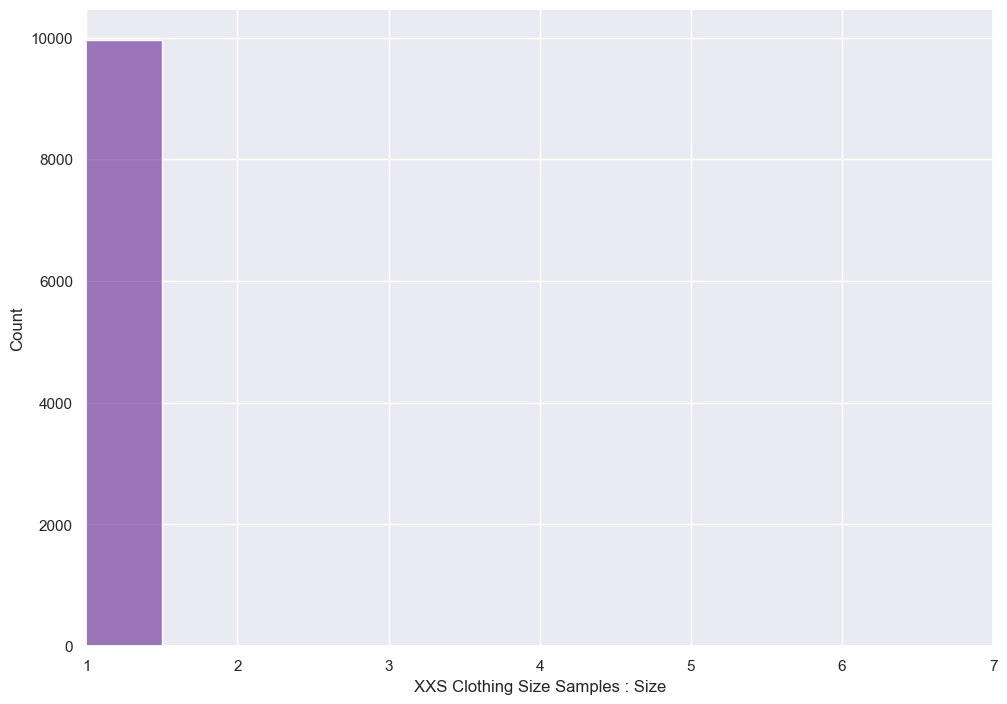

In [42]:
count_plotted = sns.histplot(x = 'size', data = dataframed.loc[dataframed['size'] == 1], kde = True, color = 'indigo')
count_plotted.set(xlabel = "XXS Clothing Size Samples : Size")
count_plotted.set(xlim = (1.0000, 7.0000))

[Text(0.5, 0, 'XXS Clothing Size Samples : Size')]

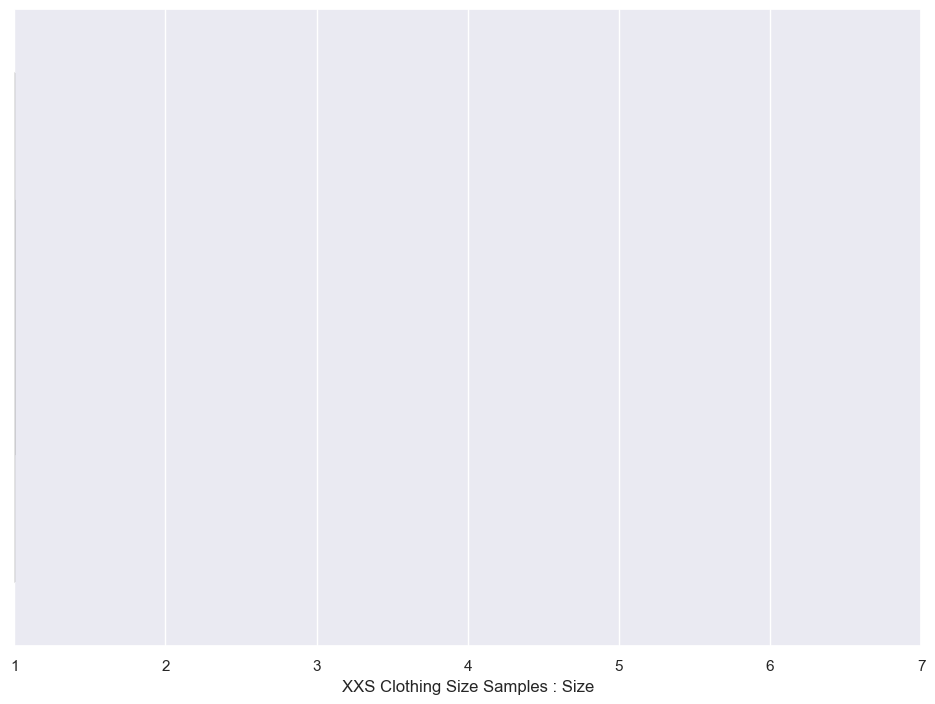

In [43]:
boxxer_plot = sns.boxplot(x = 'size', data = dataframed.loc[dataframed['size'] == 1], color = 'indigo')
boxxer_plot.set(xlim = (1.0000, 7.0000))
boxxer_plot.set(xlabel = "XXS Clothing Size Samples : Size")

In [44]:
numpy_array = np.array(dataframed.loc[dataframed['size'] == 1]['size'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("Nilai outliers kurang dari {:.4f}".format(lower_bound), "atau lebih besar dari {:.4f}".format(upper_bound))
print("Ada" ,len(outliers), "outliers.")

Nilai outliers kurang dari 1.0000 atau lebih besar dari 1.0000
Ada 0 outliers.


[(7.8283, 54.3236)]

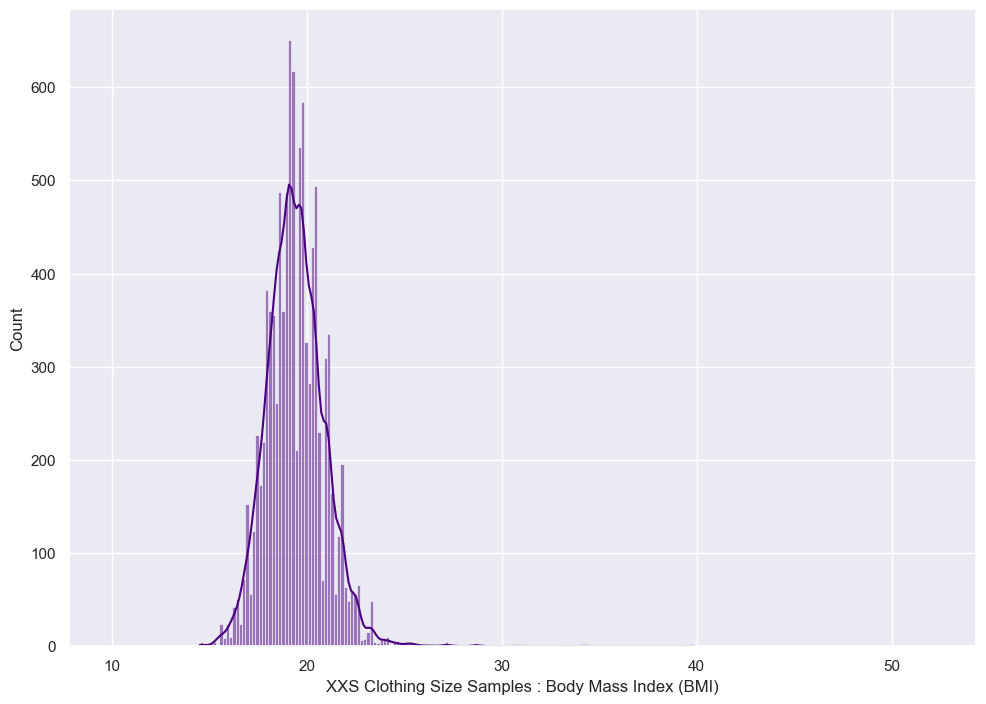

In [45]:
count_plotted = sns.histplot(x = 'bmi', data = dataframed.loc[dataframed['size'] == 1], kde = True, color = 'indigo')
count_plotted.set(xlabel = "XXS Clothing Size Samples : Body Mass Index (BMI)")
count_plotted.set(xlim = (7.8283, 54.3236))

[Text(0.5, 0, 'XXS Clothing Size Samples : Body Mass Index (BMI)')]

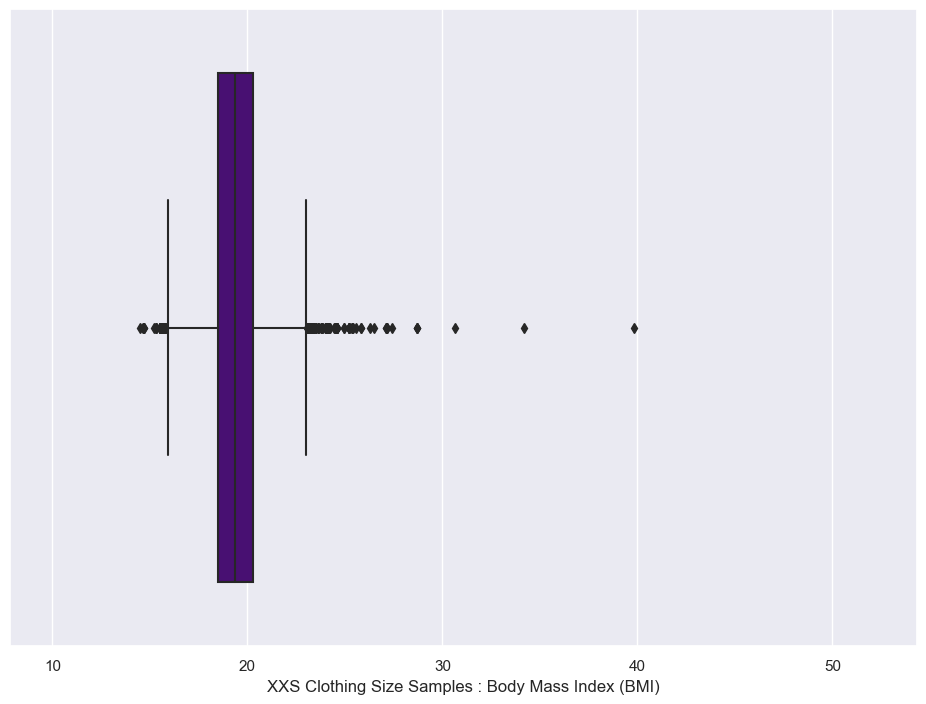

In [46]:
boxxer_plot = sns.boxplot(x = 'bmi', data = dataframed.loc[dataframed['size'] == 1], color = 'indigo')
boxxer_plot.set(xlim = (7.8283, 54.3236))
boxxer_plot.set(xlabel = "XXS Clothing Size Samples : Body Mass Index (BMI)")

In [47]:
numpy_array = np.array(dataframed.loc[dataframed['size'] == 1]['bmi'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("Nilai outliers kurang dari {:.4f}".format(lower_bound), "atau lebih besar dari {:.4f}".format(upper_bound))
print("Ada" ,len(outliers), "outliers.")

Nilai outliers kurang dari 15.7970 atau lebih besar dari 23.0137
Ada 178 outliers.


[(22.0, 136.0)]

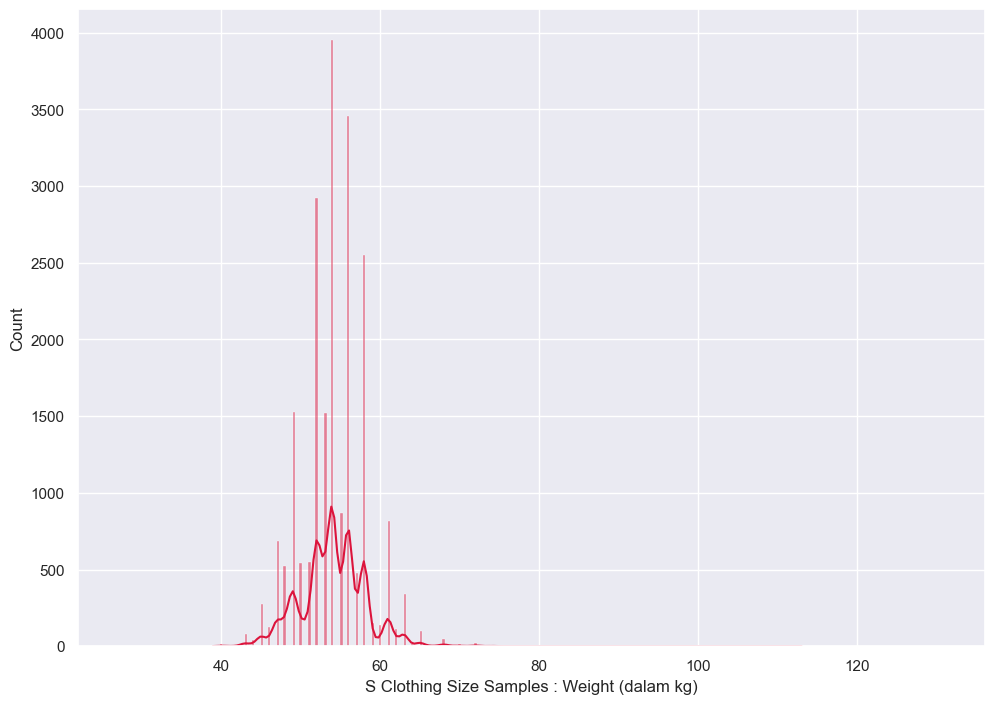

In [48]:
count_plotted = sns.histplot(x = 'weight', data = dataframed.loc[dataframed['size'] == 2], kde = True, color = 'crimson')
count_plotted.set(xlabel = "S Clothing Size Samples : Weight (dalam kg)")
count_plotted.set(xlim = (22.0000, 136.0000))


[Text(0.5, 0, 'S Clothing Size Samples : Weight (dalam kg)')]

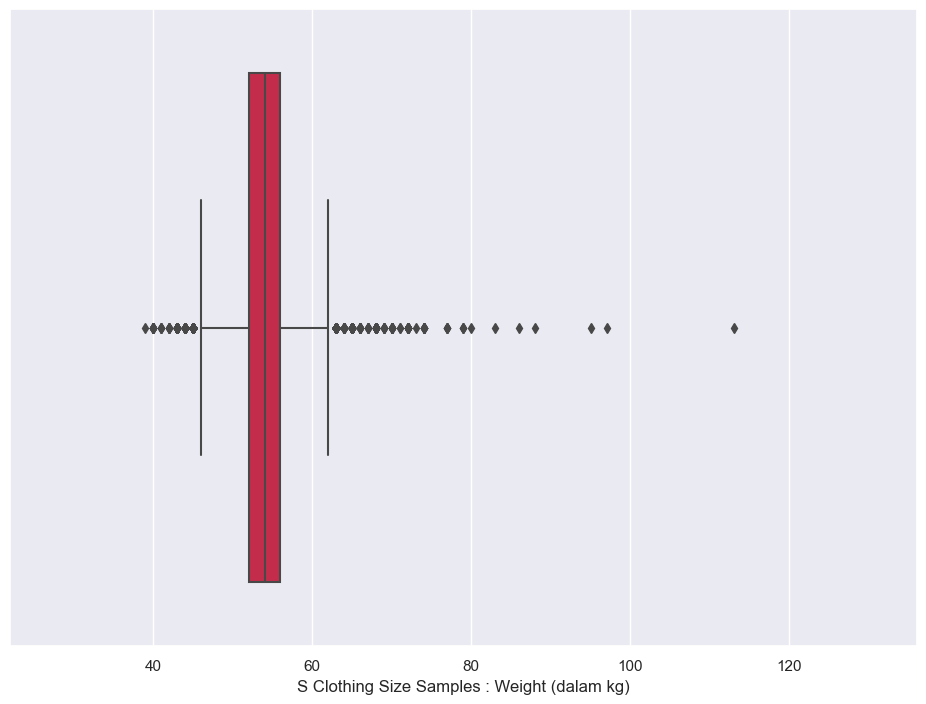

In [49]:
boxxer_plot = sns.boxplot(x = 'weight', data = dataframed.loc[dataframed['size'] == 2], color = 'crimson')
boxxer_plot.set(xlim = (22.0000, 136.0000))
boxxer_plot.set(xlabel = "S Clothing Size Samples : Weight (dalam kg)")

In [50]:
numpy_array = np.array(dataframed.loc[dataframed['size'] == 2]['weight'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("Nilai outliers kurang dari {:.4f}".format(lower_bound), "atau lebih besar dari {:.4f}".format(upper_bound))
print("Ada" ,len(outliers), "outliers.")

Nilai outliers kurang dari 46.0000 atau lebih besar dari 62.0000
Ada 1000 outliers.


[(0.0, 117.0)]

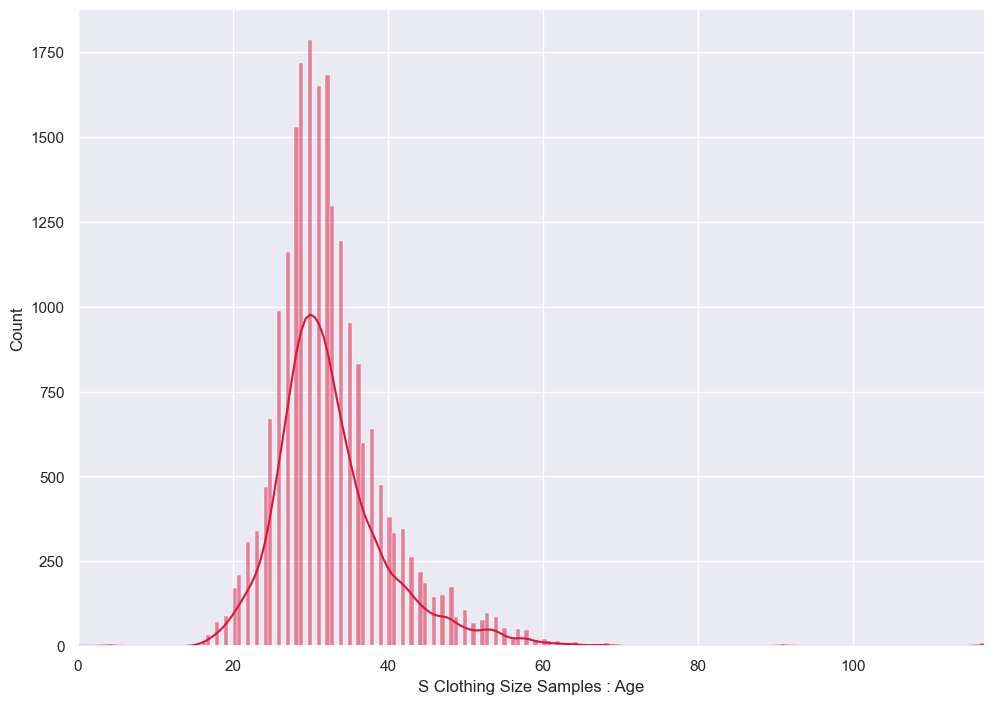

In [51]:
count_plotted = sns.histplot(x = 'age', data = dataframed.loc[dataframed['size'] == 2], kde = True, color = 'crimson')
count_plotted.set(xlabel = "S Clothing Size Samples : Age")
count_plotted.set(xlim = (0.0000, 117.0000))

[Text(0.5, 0, 'S Clothing Size Samples : Age')]

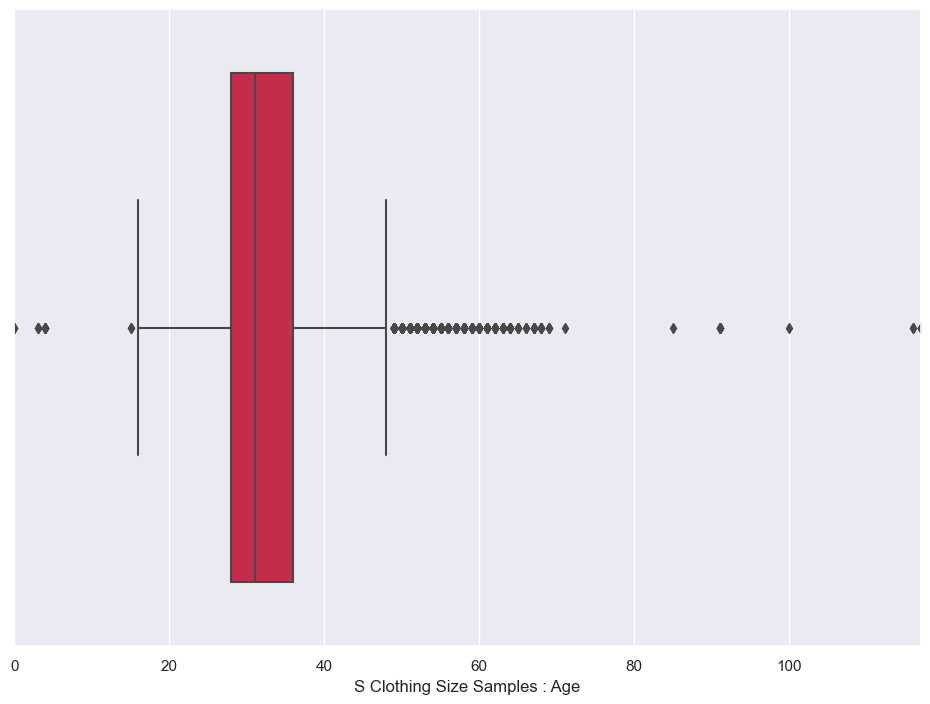

In [52]:
boxxer_plot = sns.boxplot(x = 'age', data = dataframed.loc[dataframed['size'] == 2], color = 'crimson')
boxxer_plot.set(xlim = (0.0000, 117.0000))
boxxer_plot.set(xlabel = "S Clothing Size Samples : Age")

In [53]:
numpy_array = np.array(dataframed.loc[dataframed['size'] == 2]['age'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("Nilai outliers kurang dari {:.4f}".format(lower_bound), "atau lebih besar dari {:.4f}".format(upper_bound))
print("Ada" ,len(outliers), "outliers.")

Nilai outliers kurang dari 16.0000 atau lebih besar dari 48.0000
Ada 847 outliers.


[(137.16, 193.04)]

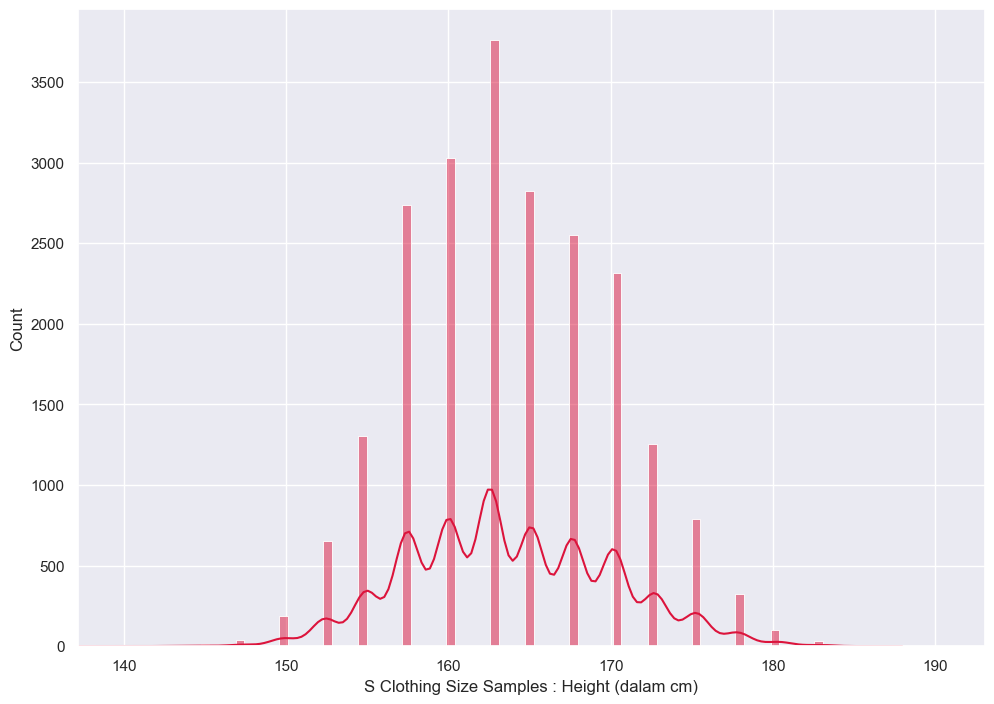

In [54]:
count_plotted = sns.histplot(x = 'height', data = dataframed.loc[dataframed['size'] == 2], kde = True, color = 'crimson')
count_plotted.set(xlabel = "S Clothing Size Samples : Height (dalam cm)")
count_plotted.set(xlim = (137.1600, 193.0400))

[Text(0.5, 0, 'S Clothing Size Samples : Height (dalam cm)')]

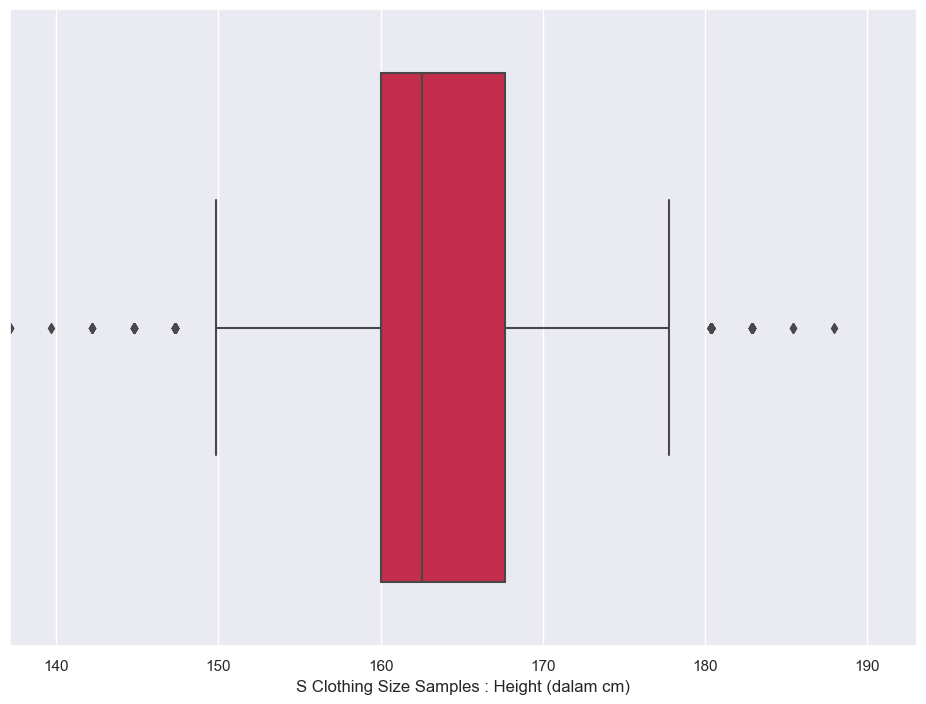

In [55]:
boxxer_plot = sns.boxplot(x = 'height', data = dataframed.loc[dataframed['size'] == 2], color = 'crimson')
boxxer_plot.set(xlim = (137.1600, 193.0400))
boxxer_plot.set(xlabel = "S Clothing Size Samples : Height (dalam cm)")

In [56]:
numpy_array = np.array(dataframed.loc[dataframed['size'] == 2]['height'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("Nilai outliers kurang dari {:.4f}".format(lower_bound), "atau lebih besar dari {:.4f}".format(upper_bound))
print("Ada" ,len(outliers), "outliers.")

Nilai outliers kurang dari 148.5900 atau lebih besar dari 179.0700
Ada 189 outliers.


[(1.0, 7.0)]

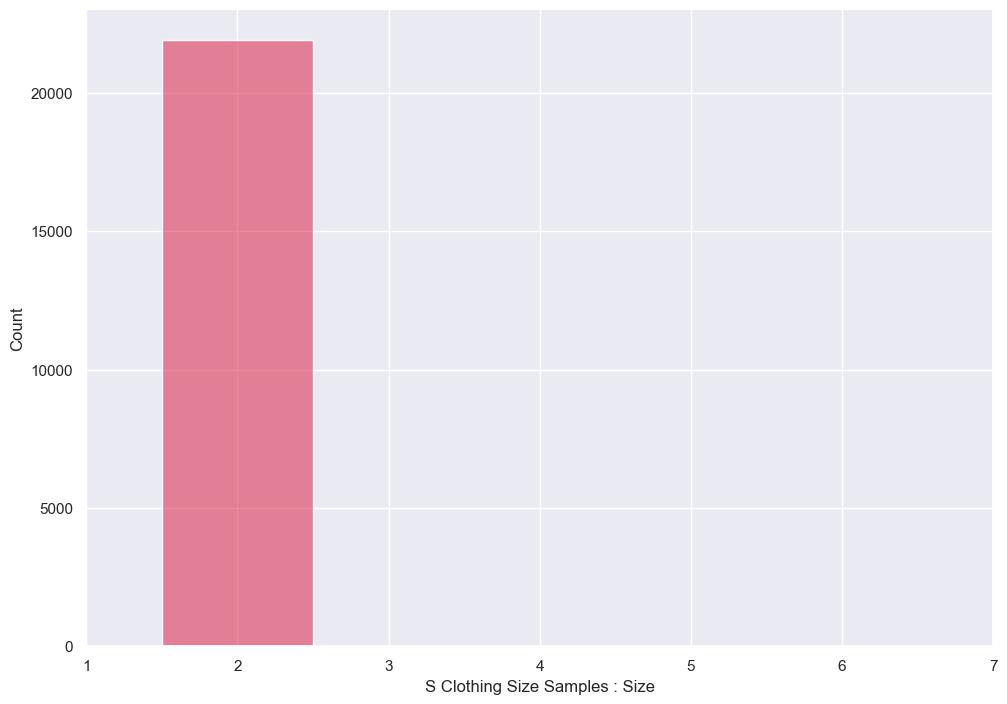

In [57]:
count_plotted = sns.histplot(x = 'size', data = dataframed.loc[dataframed['size'] == 2], kde = True, color = 'crimson')
count_plotted.set(xlabel = "S Clothing Size Samples : Size")
count_plotted.set(xlim = (1.0000, 7.0000))

[Text(0.5, 0, 'S Clothing Size Samples : Size')]

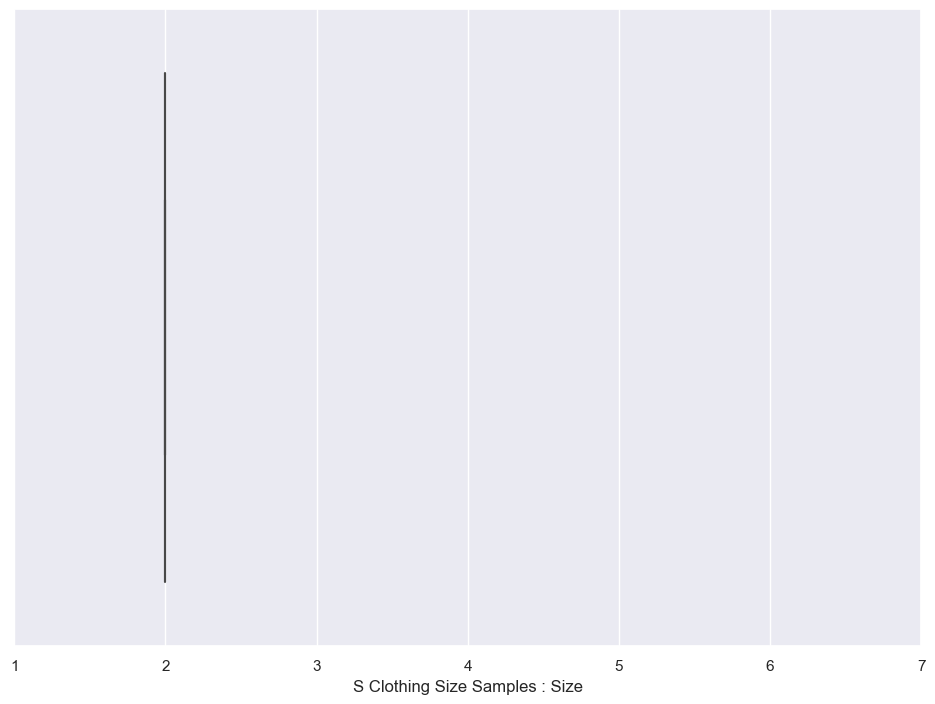

In [58]:
boxxer_plot = sns.boxplot(x = 'size', data = dataframed.loc[dataframed['size'] == 2], color = 'crimson')
boxxer_plot.set(xlim = (1.0000, 7.0000))
boxxer_plot.set(xlabel = "S Clothing Size Samples : Size")

In [59]:
numpy_array = np.array(dataframed.loc[dataframed['size'] == 2]['size'],)
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("Nilai outliers kurang dari {:.4f}".format(lower_bound), "atau lebih besar dari {:.4f}".format(upper_bound))
print("Ada" ,len(outliers), "outliers.")

Nilai outliers kurang dari 2.0000 atau lebih besar dari 2.0000
Ada 0 outliers.


[(7.8283, 54.3236)]

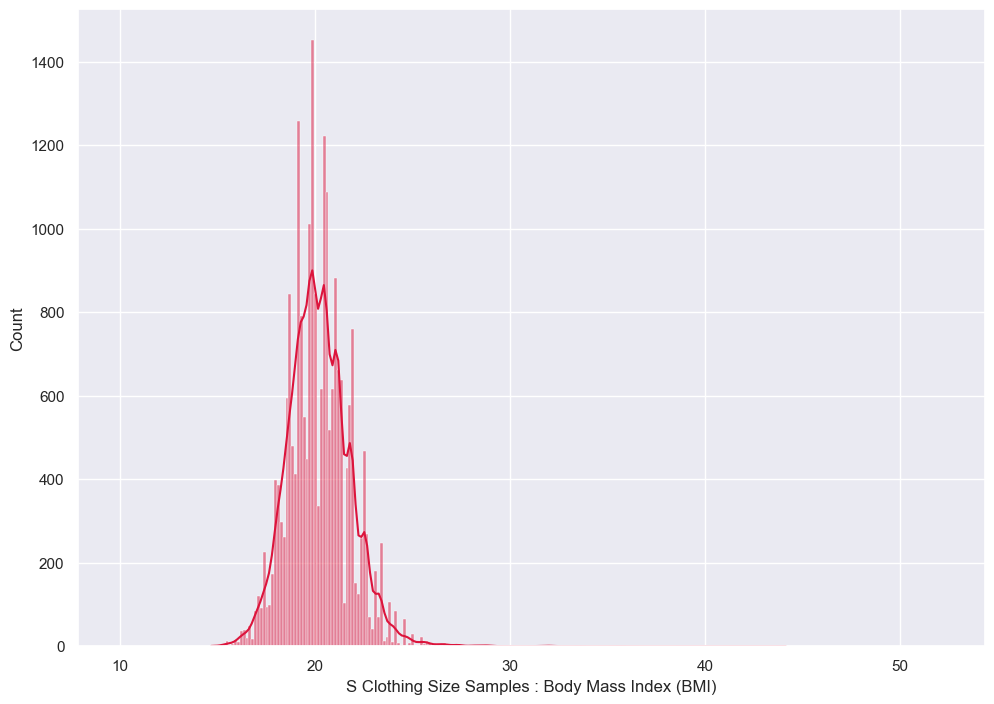

In [60]:
count_plotted = sns.histplot(x = 'bmi', data = dataframed.loc[dataframed['size'] == 2], kde = True, color = 'crimson')
count_plotted.set(xlabel = "S Clothing Size Samples : Body Mass Index (BMI)")
count_plotted.set(xlim = (7.8283, 54.3236))

[Text(0.5, 0, 'S Clothing Size Samples : Body Mass Index (BMI)')]

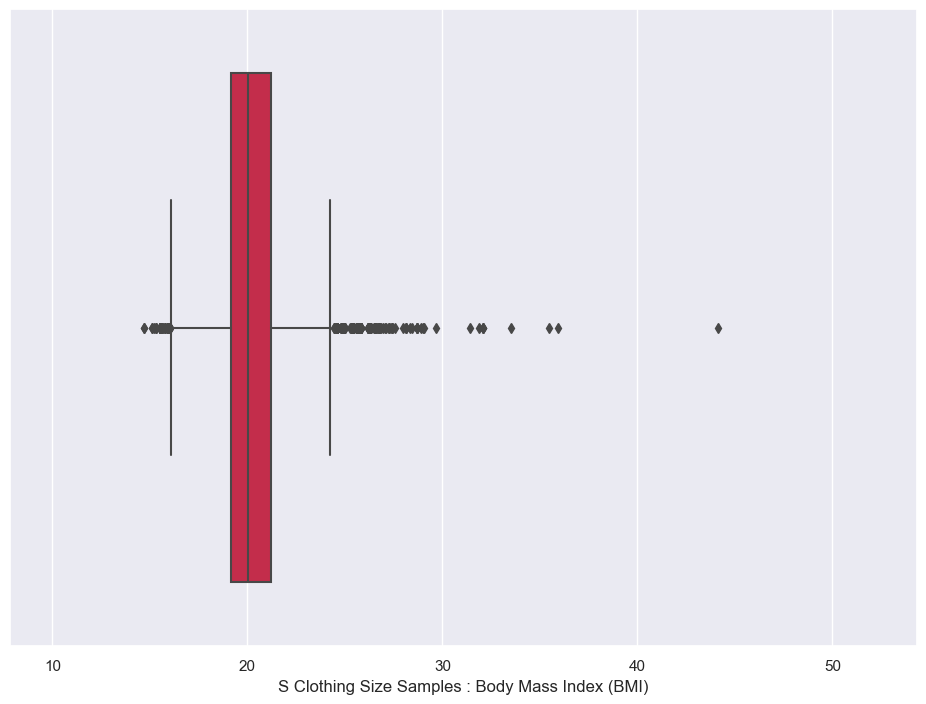

In [61]:
boxxer_plot = sns.boxplot(x = 'bmi', data = dataframed.loc[dataframed['size'] == 2], color = 'crimson')
boxxer_plot.set(xlim = (7.8283, 54.3236))
boxxer_plot.set(xlabel = "S Clothing Size Samples : Body Mass Index (BMI)")

In [62]:
numpy_array = np.array(dataframed.loc[dataframed['size'] == 2]['bmi'],)
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("Nilai outliers kurang dari {:.4f}".format(lower_bound), "atau lebih besar dari {:.4f}".format(upper_bound))
print("Ada" ,len(outliers), "outliers.")

Nilai outliers kurang dari 16.0524 atau lebih besar dari 24.2749
Ada 265 outliers.


[(22.0, 136.0)]

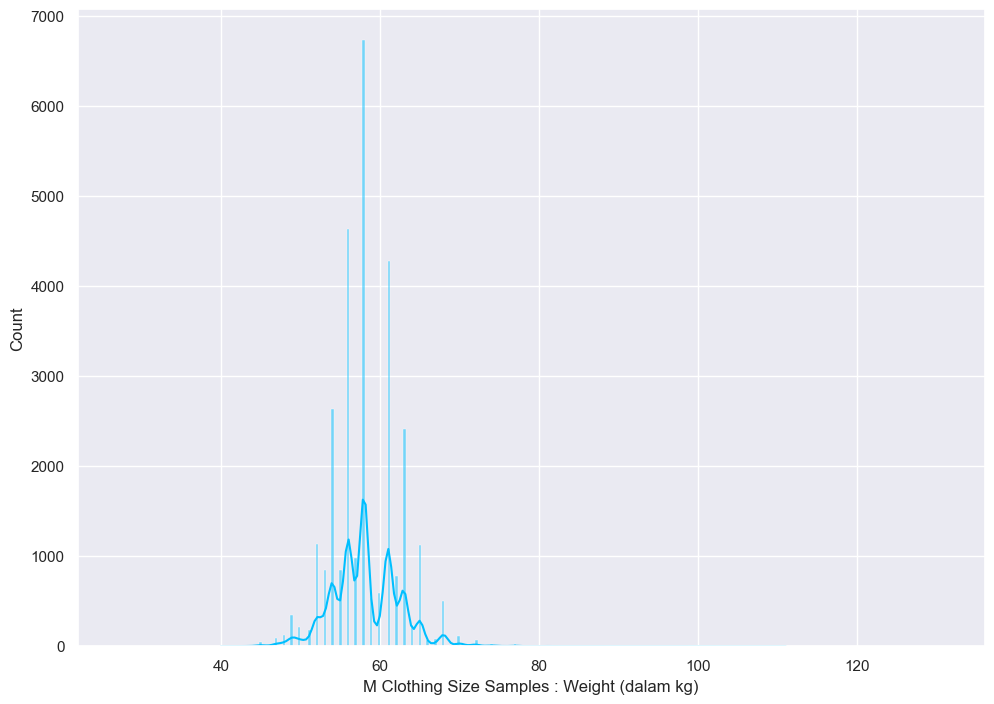

In [63]:
count_plotted = sns.histplot(x = 'weight', data = dataframed.loc[dataframed['size'] == 3], kde = True, color = 'deepskyblue')
count_plotted.set(xlabel = "M Clothing Size Samples : Weight (dalam kg)")
count_plotted.set(xlim = (22.0000, 136.0000))

[Text(0.5, 0, 'M Clothing Size Samples : Weight (dalam kg)')]

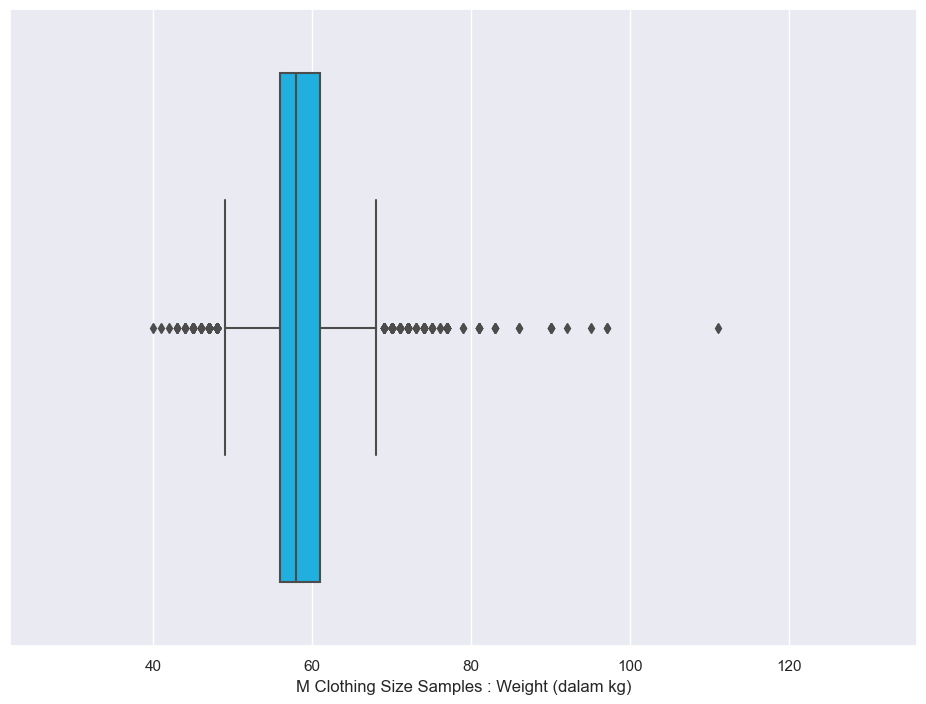

In [64]:
boxxer_plot = sns.boxplot(x = 'weight', data = dataframed.loc[dataframed['size'] == 3], color = 'deepskyblue')
boxxer_plot.set(xlim = (22.0000, 136.0000))
boxxer_plot.set(xlabel = "M Clothing Size Samples : Weight (dalam kg)")

In [65]:
numpy_array = np.array(dataframed.loc[dataframed['size'] == 3]['weight'],)
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("Nilai outliers kurang dari {:.4f}".format(lower_bound), "atau lebih besar dari {:.4f}".format(upper_bound))
print("Ada" ,len(outliers), "outliers.")

Nilai outliers kurang dari 48.5000 atau lebih besar dari 68.5000
Ada 580 outliers.


[(0.0, 117.0)]

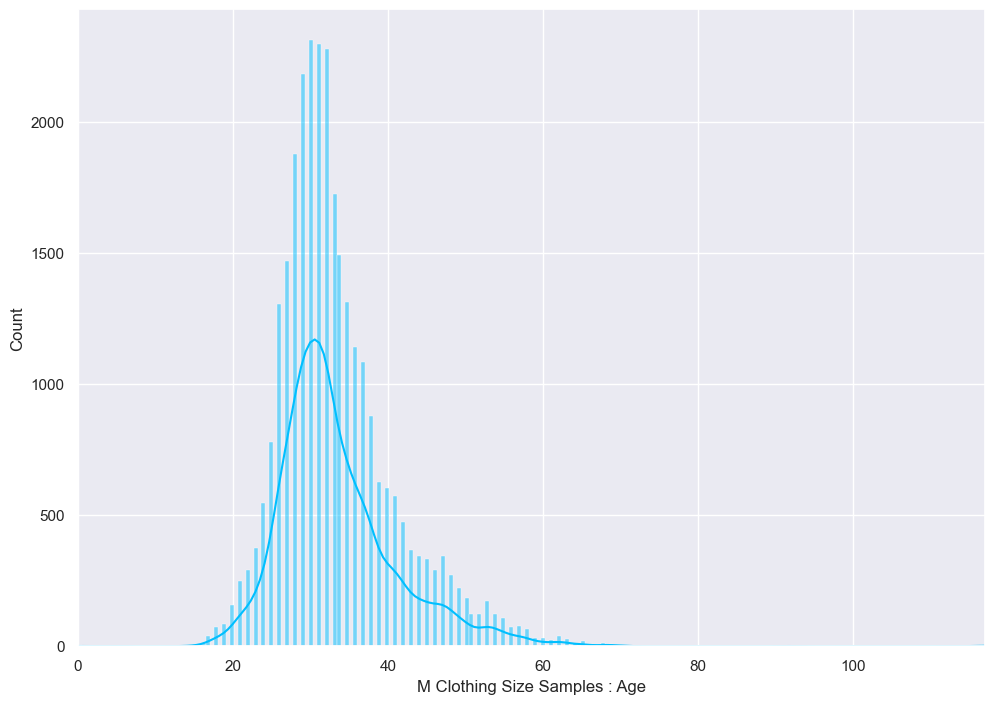

In [66]:
count_plotted = sns.histplot(x = 'age', data = dataframed.loc[dataframed['size'] == 3], kde = True, color = 'deepskyblue')
count_plotted.set(xlabel = "M Clothing Size Samples : Age")
count_plotted.set(xlim = (0.0000, 117.0000))

[Text(0.5, 0, 'M Clothing Size Samples : Age')]

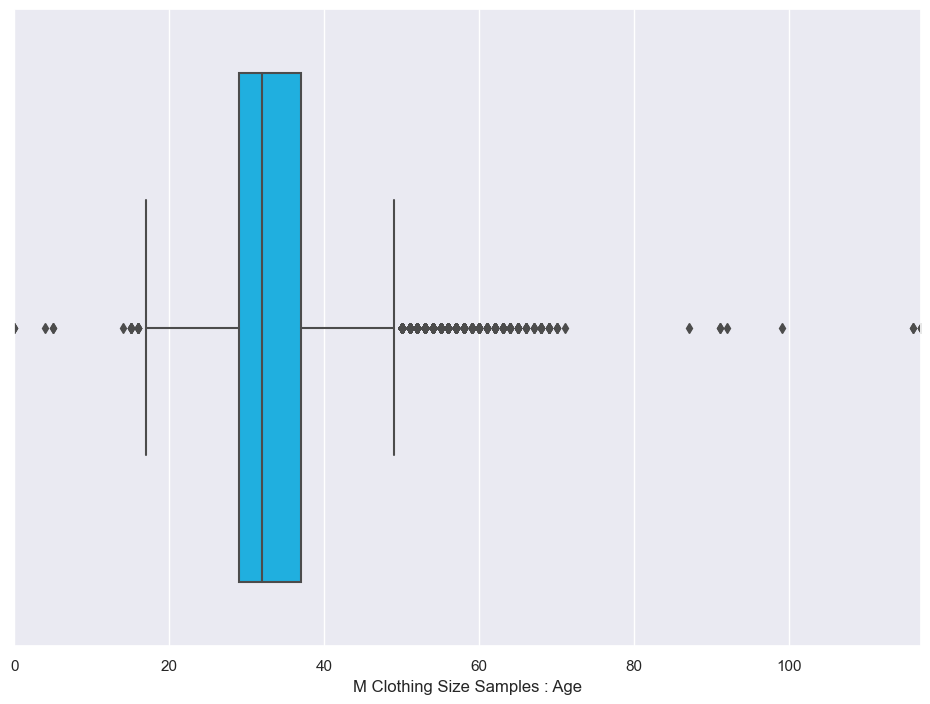

In [67]:
boxxer_plot = sns.boxplot(x = 'age', data = dataframed.loc[dataframed['size'] == 3], color = 'deepskyblue')
boxxer_plot.set(xlim = (0.0000, 117.0000))
boxxer_plot.set(xlabel = "M Clothing Size Samples : Age")

In [68]:
numpy_array = np.array(dataframed.loc[dataframed['size'] == 3]['age'],)
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("Nilai outliers kurang dari {:.4f}".format(lower_bound), "atau lebih besar dari {:.4f}".format(upper_bound))
print("Ada" ,len(outliers), "outliers.")

Nilai outliers kurang dari 17.0000 atau lebih besar dari 49.0000
Ada 1304 outliers.


[(137.16, 193.04)]

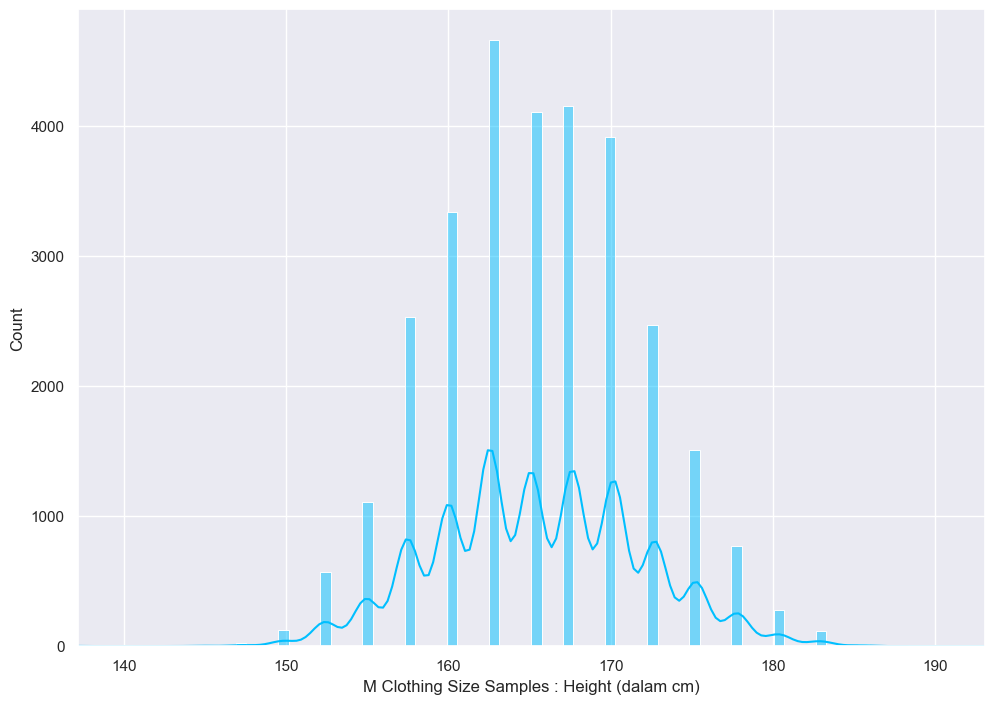

In [69]:
count_plotted = sns.histplot(x = 'height', data = dataframed.loc[dataframed['size'] == 3], kde = True, color = 'deepskyblue')
count_plotted.set(xlabel = "M Clothing Size Samples : Height (dalam cm)")
count_plotted.set(xlim = (137.1600, 193.0400))

[Text(0.5, 0, 'M Clothing Size Samples : Height (dalam cm)')]

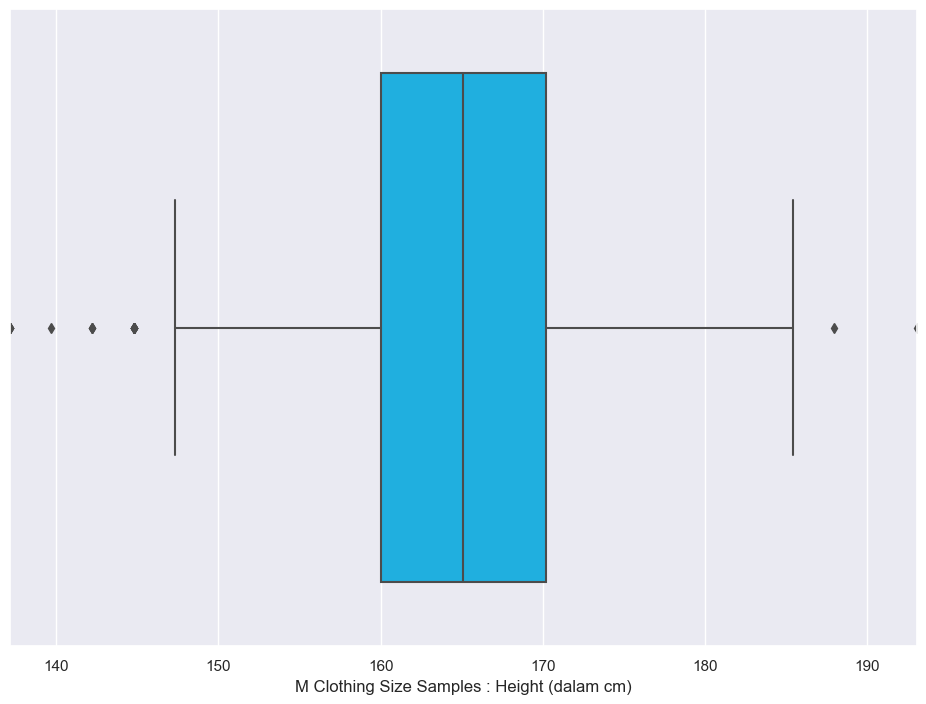

In [70]:
boxxer_plot = sns.boxplot(x = 'height', data = dataframed.loc[dataframed['size'] == 3], color = 'deepskyblue')
boxxer_plot.set(xlim = (137.1600, 193.0400))
boxxer_plot.set(xlabel = "M Clothing Size Samples : Height (dalam cm)")

In [71]:
numpy_array = np.array(dataframed.loc[dataframed['size'] == 3]['height'],)
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("Nilai outliers kurang dari {:.4f}".format(lower_bound), "atau lebih besar dari {:.4f}".format(upper_bound))
print("Ada" ,len(outliers), "outliers.")

Nilai outliers kurang dari 144.7800 atau lebih besar dari 185.4200
Ada 22 outliers.


[(1.0, 7.0)]

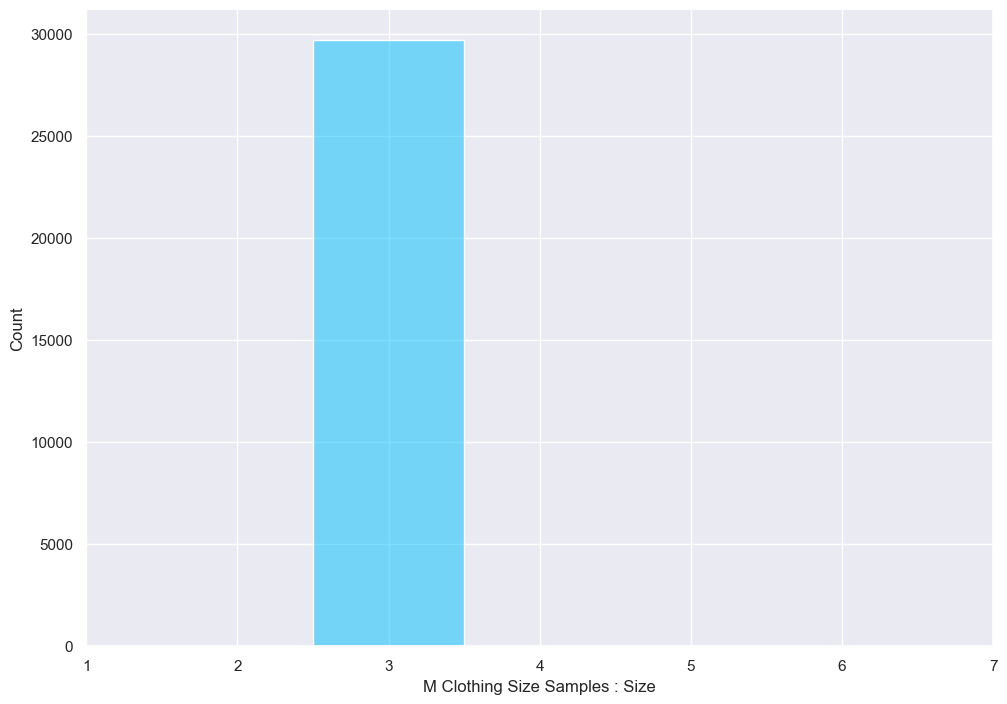

In [72]:
count_plotted = sns.histplot(x = 'size', data = dataframed.loc[dataframed['size'] == 3], kde = True, color = 'deepskyblue')
count_plotted.set(xlabel = "M Clothing Size Samples : Size")
count_plotted.set(xlim = (1.0000, 7.0000))

[Text(0.5, 0, 'M Clothing Size Samples : Size')]

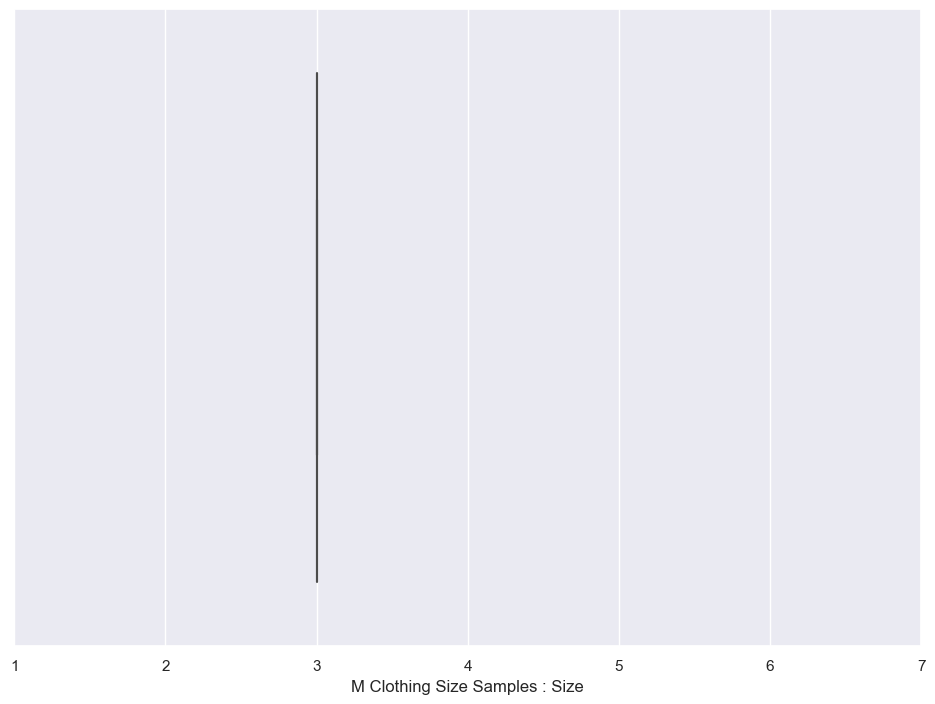

In [73]:
boxxer_plot = sns.boxplot(x = 'size', data = dataframed.loc[dataframed['size'] == 3], color = 'deepskyblue')
boxxer_plot.set(xlim = (1.0000, 7.0000))
boxxer_plot.set(xlabel = "M Clothing Size Samples : Size")

In [74]:
numpy_array = np.array(dataframed.loc[dataframed['size'] == 3]['size'],)
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("Nilai outliers kurang dari {:.4f}".format(lower_bound), "atau lebih besar dari {:.4f}".format(upper_bound))
print("Ada" ,len(outliers), "outliers.")

Nilai outliers kurang dari 3.0000 atau lebih besar dari 3.0000
Ada 0 outliers.


[(7.8283, 54.3236)]

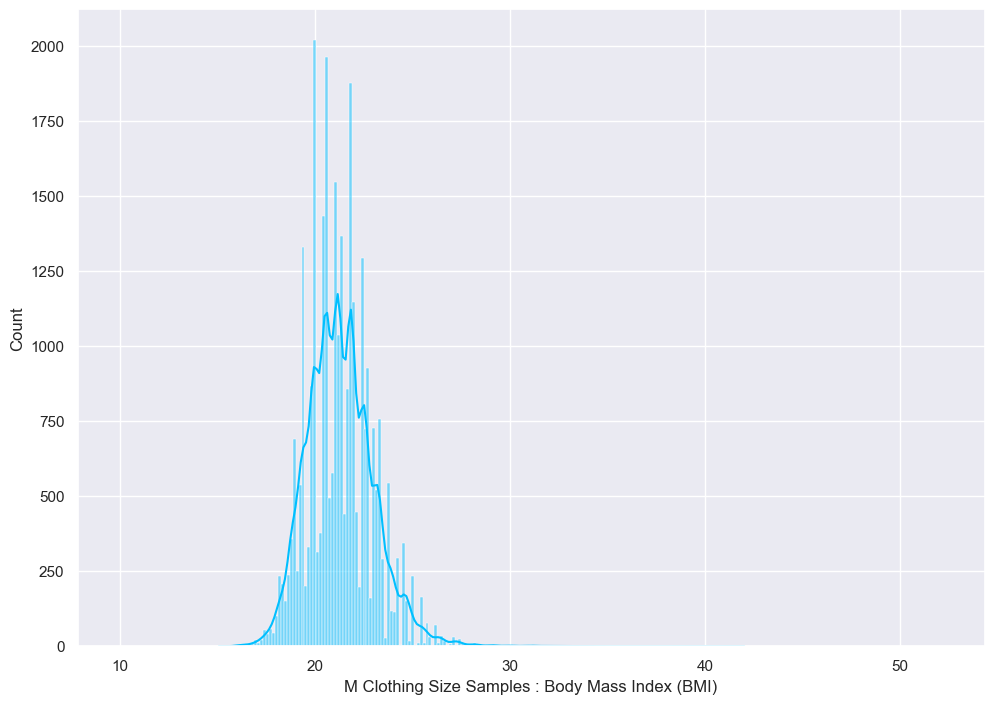

In [75]:
count_plotted = sns.histplot(x = 'bmi', data = dataframed.loc[dataframed['size'] == 3], kde = True, color = 'deepskyblue')
count_plotted.set(xlabel = "M Clothing Size Samples : Body Mass Index (BMI)")
count_plotted.set(xlim = (7.8283, 54.3236))

[Text(0.5, 0, 'M Clothing Size Samples : Body Mass Index (BMI)')]

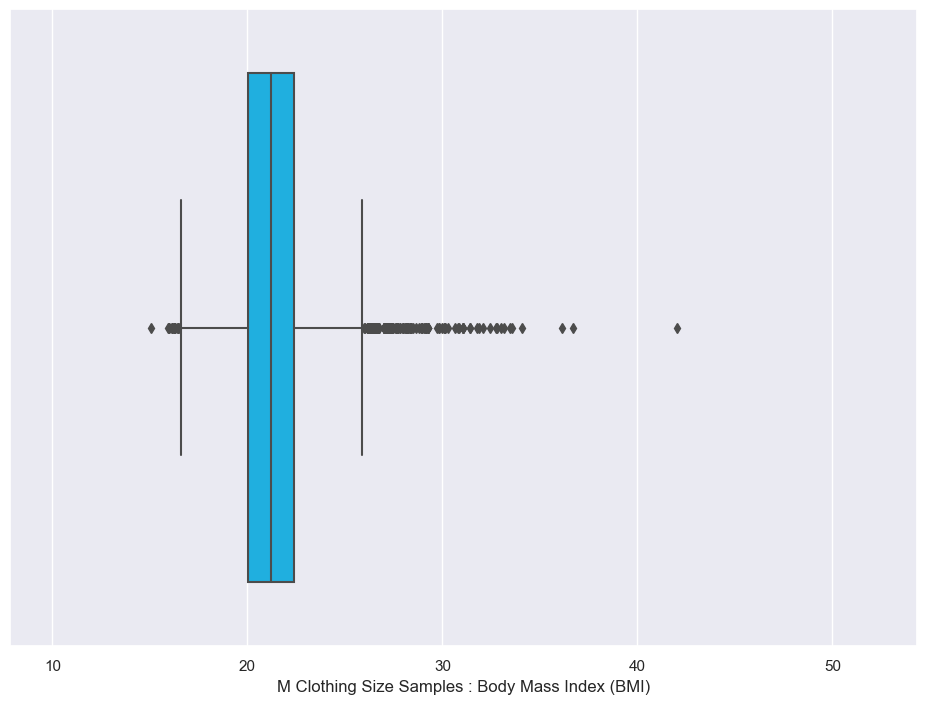

In [76]:
boxxer_plot = sns.boxplot(x = 'bmi', data = dataframed.loc[dataframed['size'] == 3], color = 'deepskyblue')
boxxer_plot.set(xlim = (7.8283, 54.3236))
boxxer_plot.set(xlabel = "M Clothing Size Samples : Body Mass Index (BMI)")

In [77]:
numpy_array = np.array(dataframed.loc[dataframed['size'] == 3]['bmi'],)
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("Nilai outliers kurang dari {:.4f}".format(lower_bound), "atau lebih besar dari {:.4f}".format(upper_bound))
print("Ada" ,len(outliers), "outliers.")

Nilai outliers kurang dari 16.4988 atau lebih besar dari 25.9067
Ada 305 outliers.


[(22.0, 136.0)]

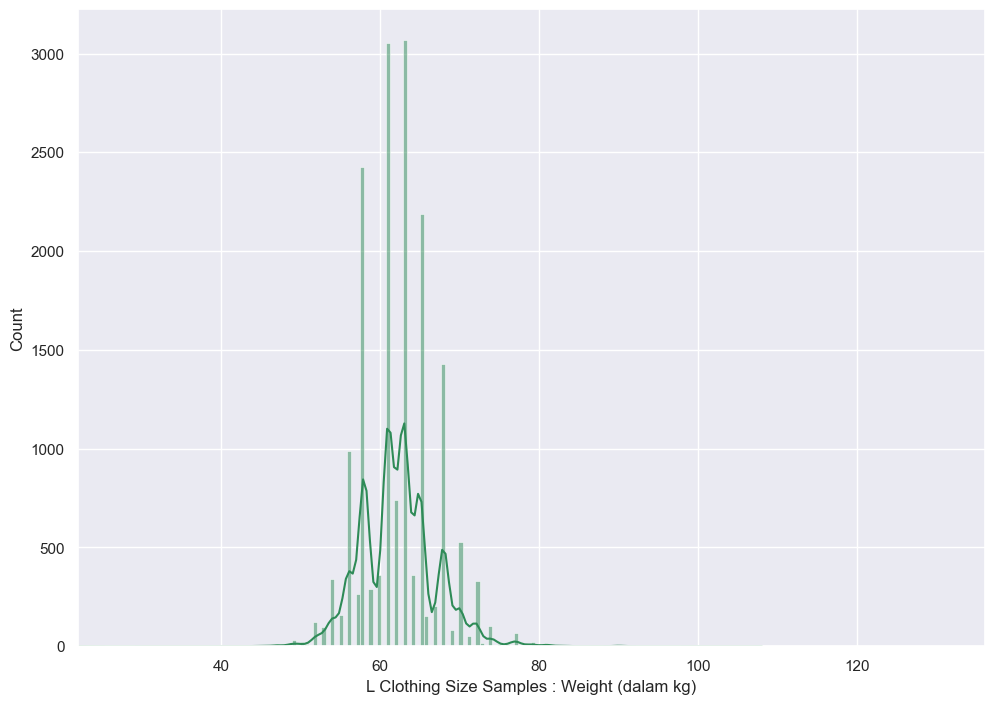

In [78]:
count_plotted = sns.histplot(x = 'weight', data = dataframed.loc[dataframed['size'] == 4], kde = True, color = 'seagreen')
count_plotted.set(xlabel = "L Clothing Size Samples : Weight (dalam kg)")
count_plotted.set(xlim = (22.0000, 136.0000))

[Text(0.5, 0, 'L Clothing Size Samples : Weight (dalam kg)')]

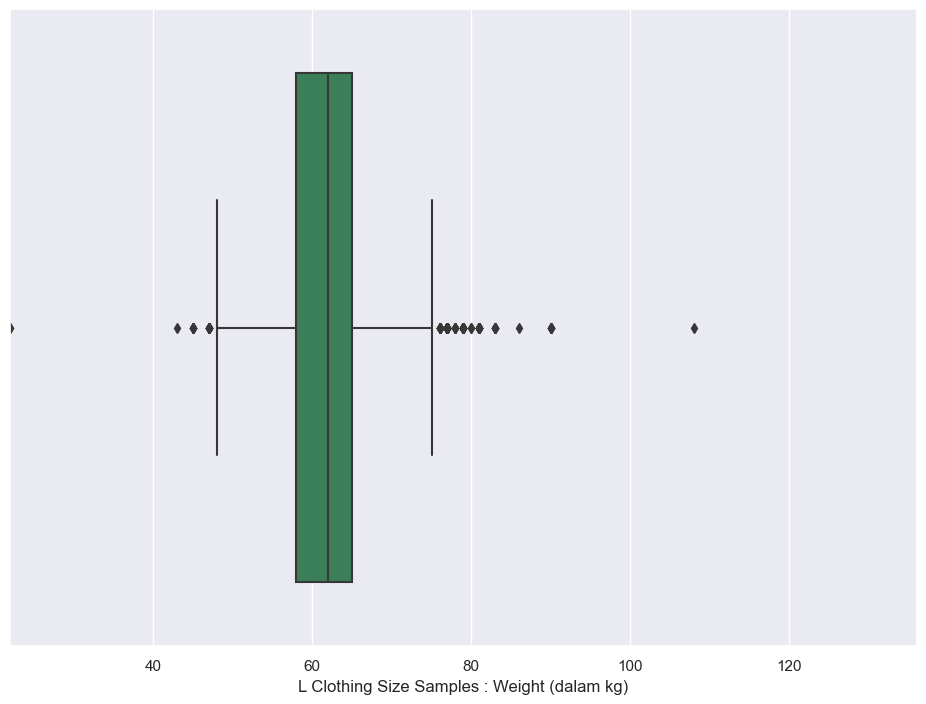

In [79]:
boxxer_plot = sns.boxplot(x = 'weight', data = dataframed.loc[dataframed['size'] == 4], color = 'seagreen')
boxxer_plot.set(xlim = (22.0000, 136.0000))
boxxer_plot.set(xlabel = "L Clothing Size Samples : Weight (dalam kg)")

In [80]:
numpy_array = np.array(dataframed.loc[dataframed['size'] == 4]['weight'],)
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("Nilai outliers kurang dari {:.4f}".format(lower_bound), "atau lebih besar dari {:.4f}".format(upper_bound))
print("Ada" ,len(outliers), "outliers.")

Nilai outliers kurang dari 47.5000 atau lebih besar dari 75.5000
Ada 162 outliers.


[(0.0, 117.0)]

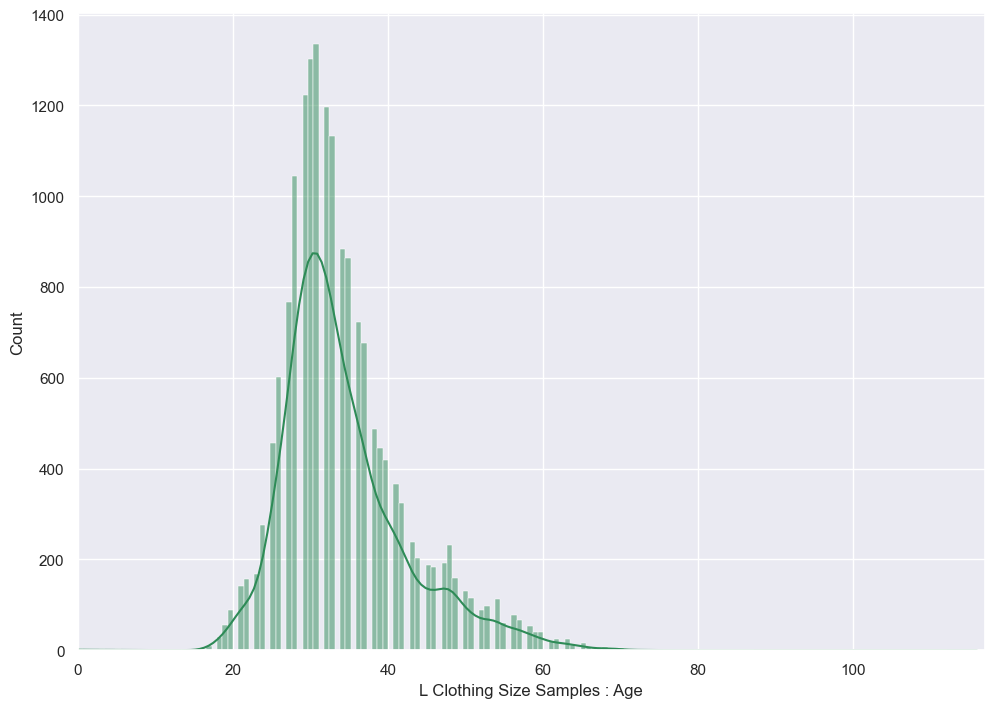

In [81]:
count_plotted = sns.histplot(x = 'age', data = dataframed.loc[dataframed['size'] == 4], kde = True, color = 'seagreen')
count_plotted.set(xlabel = "L Clothing Size Samples : Age")
count_plotted.set(xlim = (0.0000, 117.0000))

[Text(0.5, 0, 'L Clothing Size Samples : Age')]

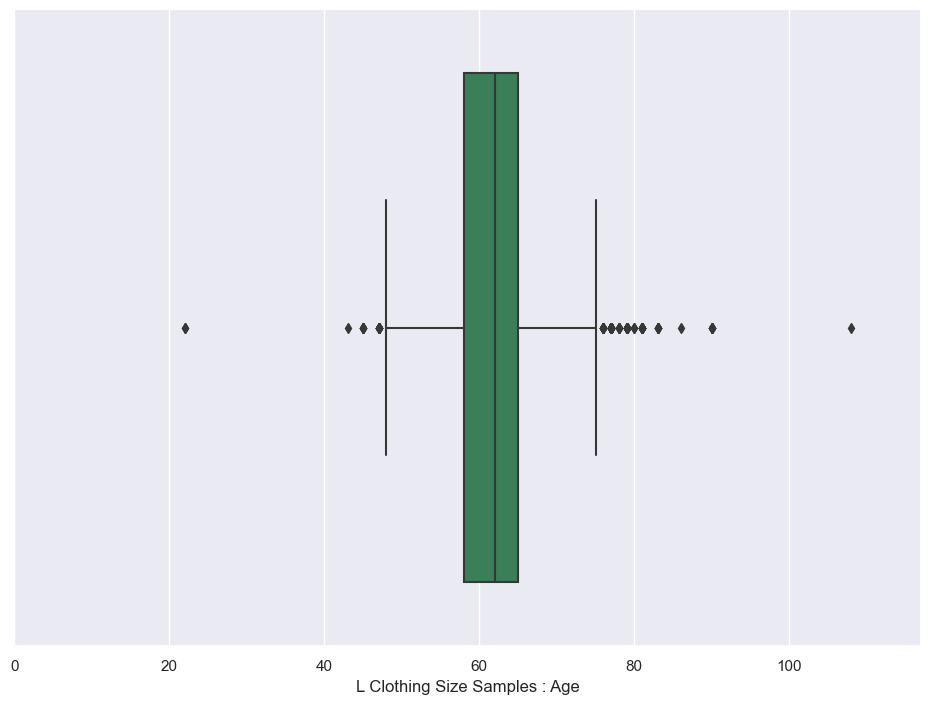

In [82]:
boxxer_plot = sns.boxplot(x = 'weight', data = dataframed.loc[dataframed['size'] == 4], color = 'seagreen')
boxxer_plot.set(xlim = (0.0000, 117.0000))
boxxer_plot.set(xlabel = "L Clothing Size Samples : Age")


In [83]:
numpy_array = np.array(dataframed.loc[dataframed['size'] == 4]['age'],)
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("Nilai outliers kurang dari {:.4f}".format(lower_bound), "atau lebih besar dari {:.4f}".format(upper_bound))
print("Ada" ,len(outliers), "outliers.")

Nilai outliers kurang dari 15.5000 atau lebih besar dari 51.5000
Ada 775 outliers.


[(137.16, 193.04)]

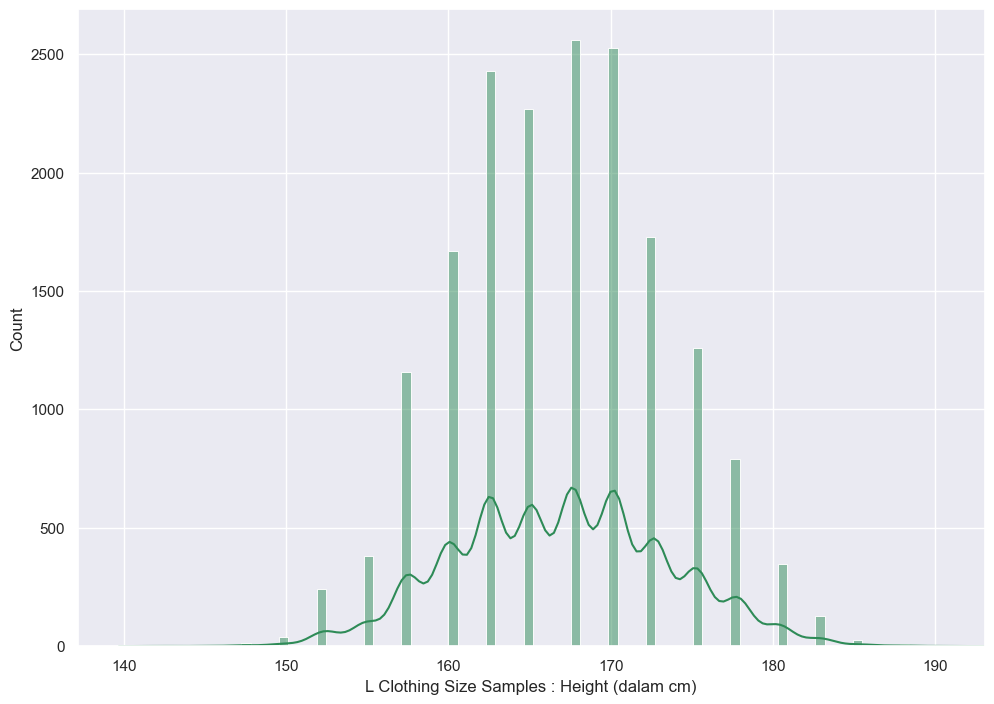

In [84]:
count_plotted = sns.histplot(x = 'height', data = dataframed.loc[dataframed['size'] == 4], kde = True, color = 'seagreen')
count_plotted.set(xlabel = "L Clothing Size Samples : Height (dalam cm)")
count_plotted.set(xlim = (137.1600, 193.0400))

[Text(0.5, 0, 'L Clothing Size Samples : Height (dalam cm)')]

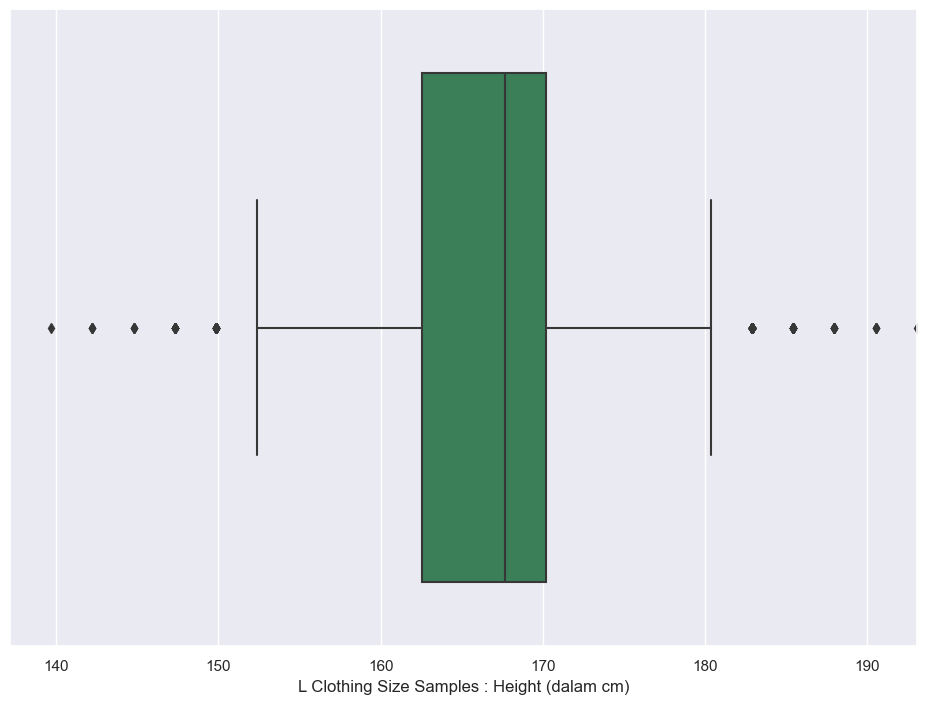

In [85]:
boxxer_plot = sns.boxplot(x = 'height', data = dataframed.loc[dataframed['size'] == 4], color = 'seagreen')
boxxer_plot.set(xlim = (137.1600, 193.0400))
boxxer_plot.set(xlabel = "L Clothing Size Samples : Height (dalam cm)")

In [86]:
numpy_array = np.array(dataframed.loc[dataframed['size'] == 4]['height'],)
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("Nilai outliers kurang dari {:.4f}".format(lower_bound), "atau lebih besar dari {:.4f}".format(upper_bound))
print("Ada" ,len(outliers), "outliers.")

Nilai outliers kurang dari 151.1300 atau lebih besar dari 181.6100
Ada 231 outliers.


[(1.0, 7.0)]

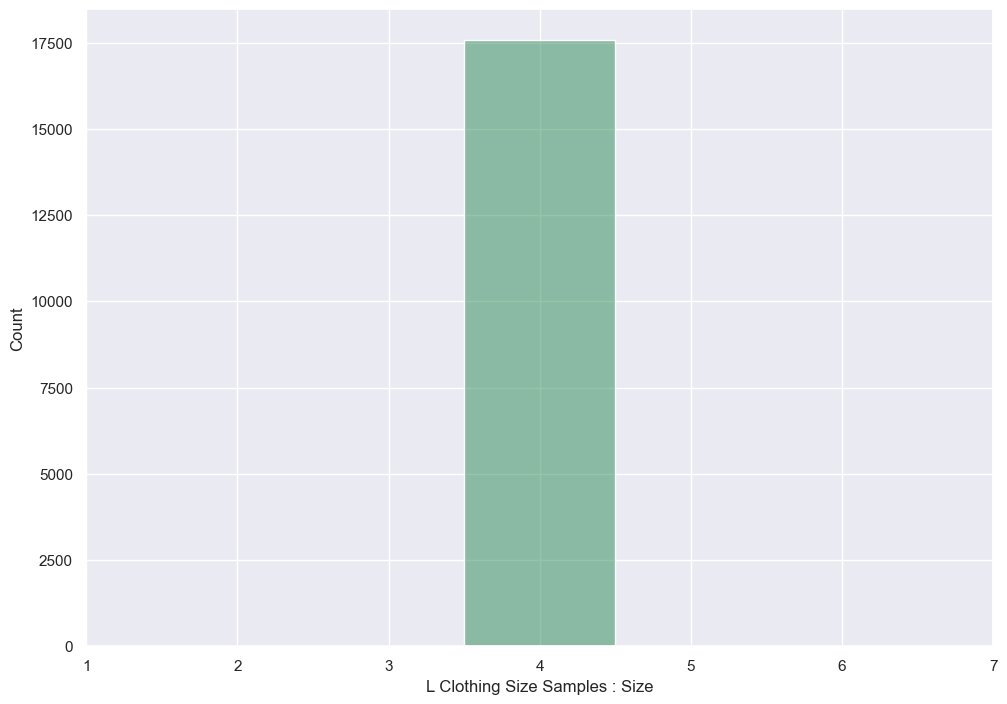

In [87]:
count_plotted = sns.histplot(x = 'size', data = dataframed.loc[dataframed['size'] == 4], kde = True, color = 'seagreen')
count_plotted.set(xlabel = "L Clothing Size Samples : Size")
count_plotted.set(xlim = (1.0000, 7.0000))

[Text(0.5, 0, 'L Clothing Size Samples : Size')]

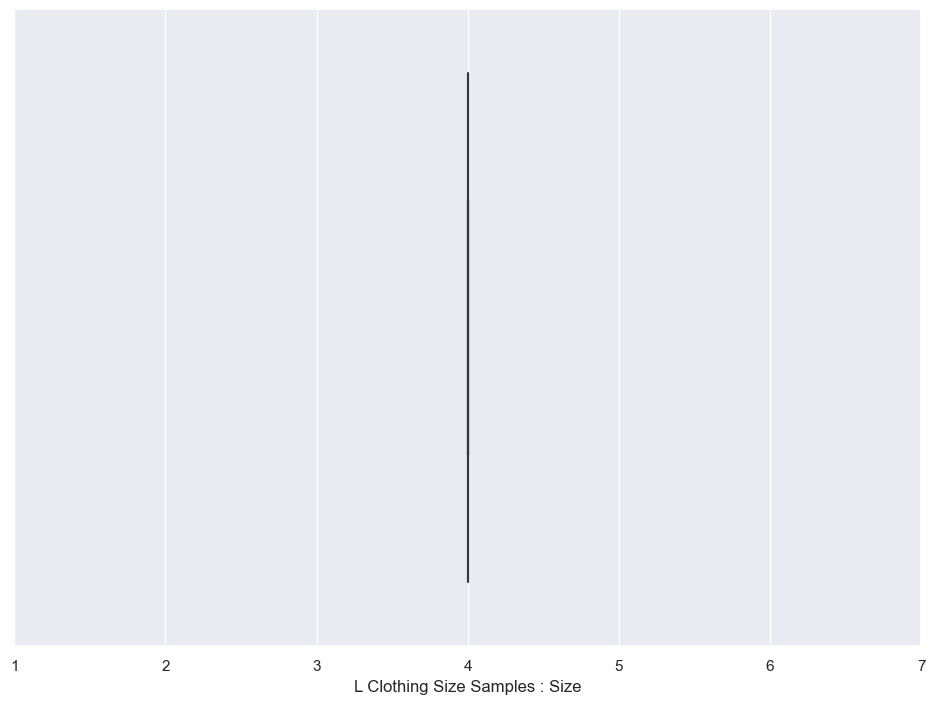

In [88]:
boxxer_plot = sns.boxplot(x = 'size', data = dataframed.loc[dataframed['size'] == 4], color = 'seagreen')
boxxer_plot.set(xlim = (1.0000, 7.0000))
boxxer_plot.set(xlabel = "L Clothing Size Samples : Size")

In [89]:
numpy_array = np.array(dataframed.loc[dataframed['size'] == 4]['size'],)
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("Nilai outliers kurang dari {:.4f}".format(lower_bound), "atau lebih besar dari {:.4f}".format(upper_bound))
print("Ada" ,len(outliers), "outliers.")

Nilai outliers kurang dari 4.0000 atau lebih besar dari 4.0000
Ada 0 outliers.


[(7.8283, 54.3236)]

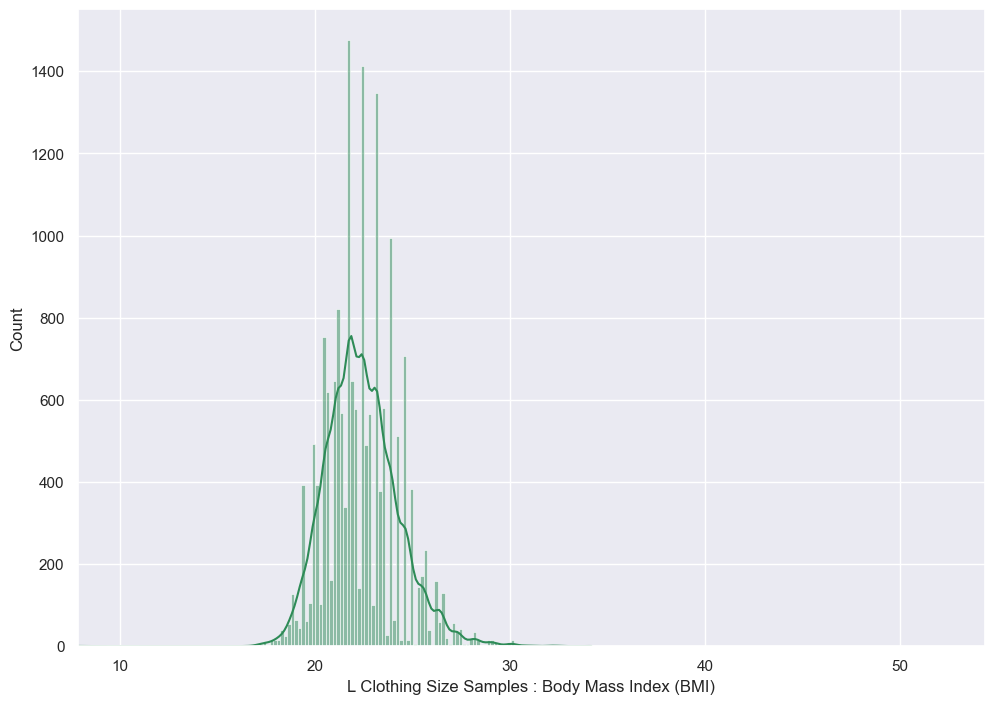

In [90]:
count_plotted = sns.histplot(x = 'bmi', data = dataframed.loc[dataframed['size'] == 4], kde = True, color = 'seagreen')
count_plotted.set(xlabel = "L Clothing Size Samples : Body Mass Index (BMI)")
count_plotted.set(xlim = (7.8283, 54.3236))

[Text(0.5, 0, 'L Clothing Size Samples : Body Mass Index (BMI)')]

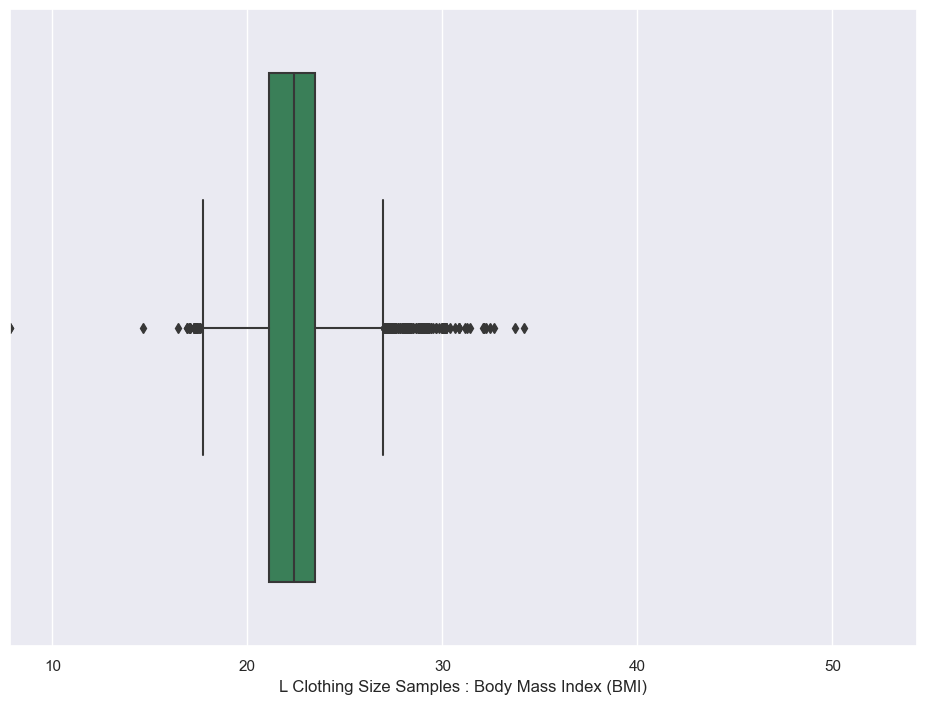

In [91]:
boxxer_plot = sns.boxplot(x = 'bmi', data = dataframed.loc[dataframed['size'] == 4], color = 'seagreen')
boxxer_plot.set(xlim = (7.8283, 54.3236))
boxxer_plot.set(xlabel = "L Clothing Size Samples : Body Mass Index (BMI)")

In [92]:
numpy_array = np.array(dataframed.loc[dataframed['size'] == 4]['bmi'],)
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("Nilai outliers kurang dari {:.4f}".format(lower_bound), "atau lebih besar dari {:.4f}".format(upper_bound))
print("Ada" ,len(outliers), "outliers.")

Nilai outliers kurang dari 17.6024 atau lebih besar dari 26.9777
Ada 325 outliers.


[(22.0, 136.0)]

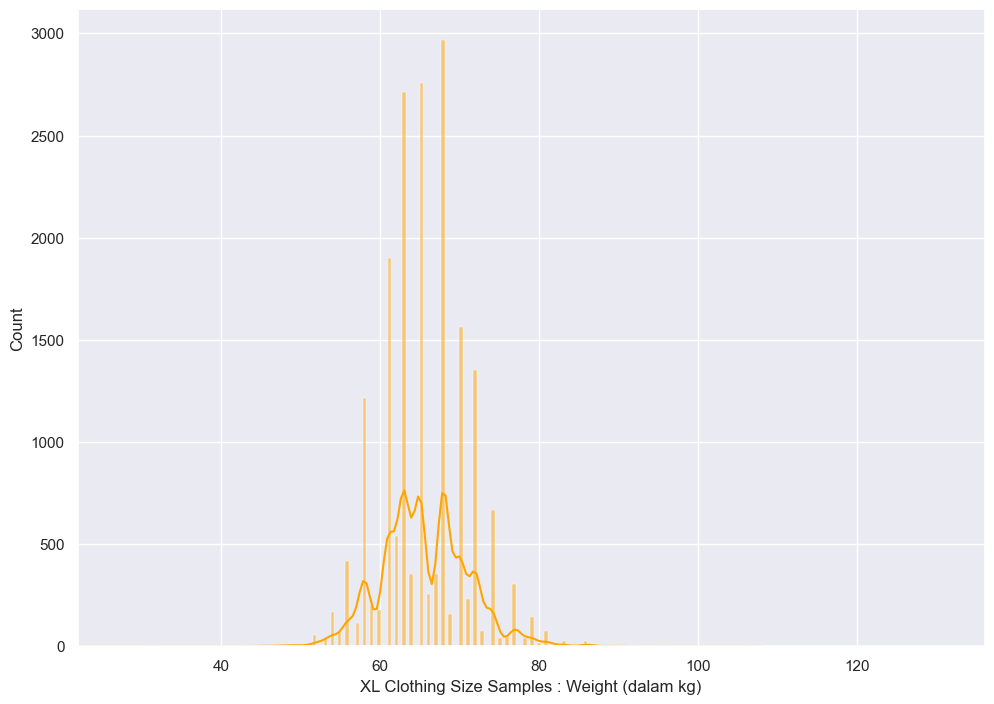

In [93]:
count_plotted = sns.histplot(x = 'weight', data = dataframed.loc[dataframed['size'] == 5], kde = True, color = 'orange')
count_plotted.set(xlabel = "XL Clothing Size Samples : Weight (dalam kg)")
count_plotted.set(xlim = (22.0000, 136.0000))

[Text(0.5, 0, 'XL Clothing Size Samples : Weight (dalam kg)')]

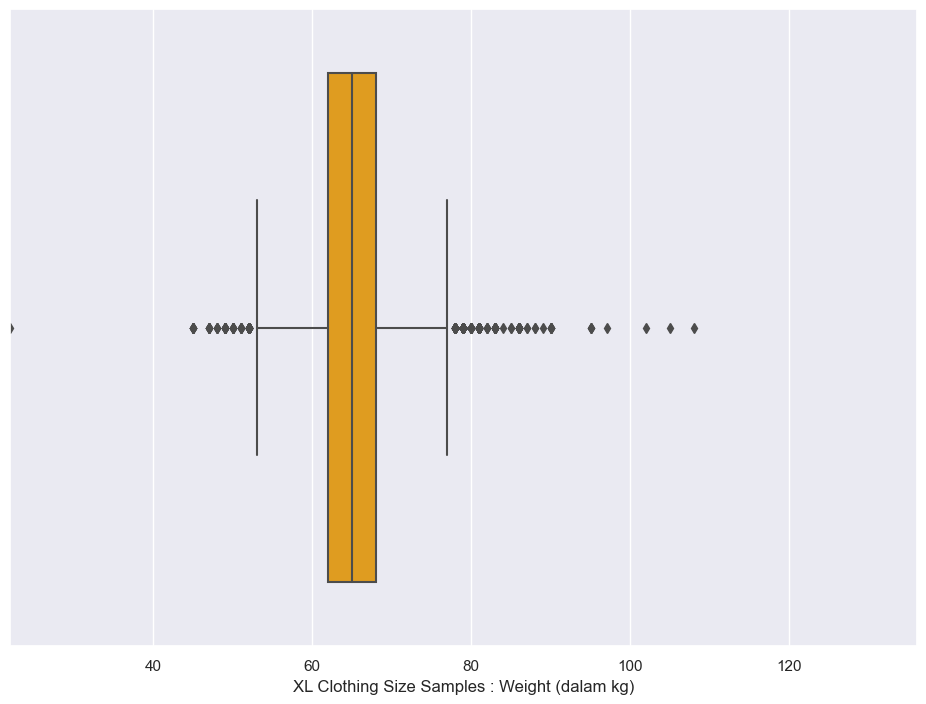

In [94]:
boxxer_plot = sns.boxplot(x = 'weight', data = dataframed.loc[dataframed['size'] == 5], color = 'orange')
boxxer_plot.set(xlim = (22.0000, 136.0000))
boxxer_plot.set(xlabel = "XL Clothing Size Samples : Weight (dalam kg)")

In [95]:
numpy_array = np.array(dataframed.loc[dataframed['size'] == 5]['weight'],)
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("Nilai outliers kurang dari {:.4f}".format(lower_bound), "atau lebih besar dari {:.4f}".format(upper_bound))
print("Ada" ,len(outliers), "outliers.")

Nilai outliers kurang dari 53.0000 atau lebih besar dari 77.0000
Ada 447 outliers.


[(0.0, 117.0)]

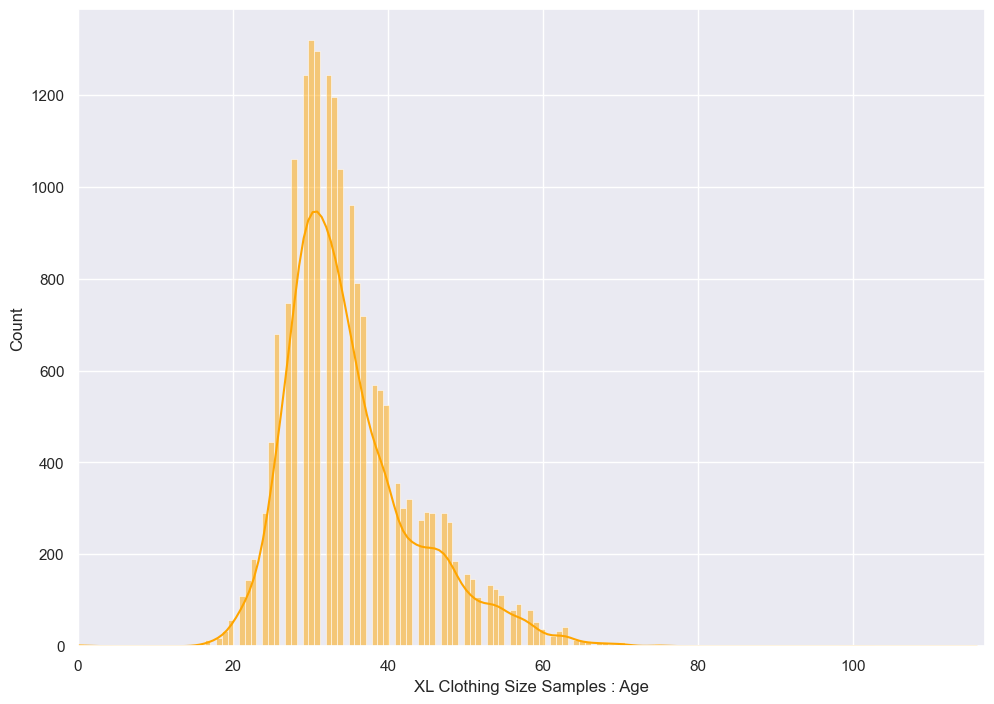

In [96]:
count_plotted = sns.histplot(x = 'age', data = dataframed.loc[dataframed['size'] == 5], kde = True, color = 'orange')
count_plotted.set(xlabel = "XL Clothing Size Samples : Age")
count_plotted.set(xlim = (0.0000, 117.0000))

[Text(0.5, 0, 'XL Clothing Size Samples : Age')]

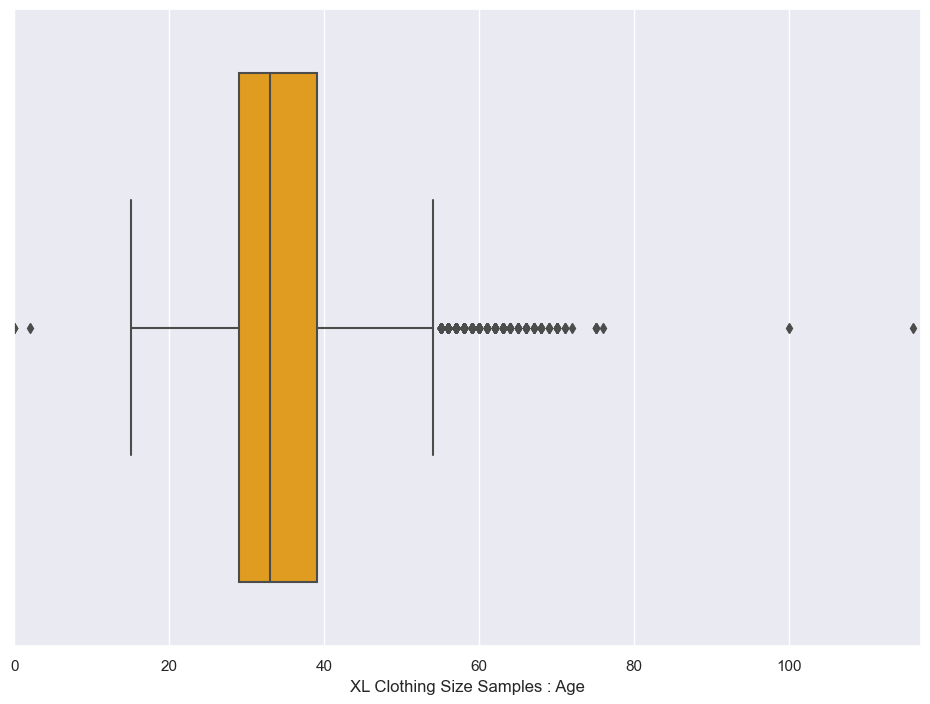

In [97]:
boxxer_plot = sns.boxplot(x = 'age', data = dataframed.loc[dataframed['size'] == 5], color = 'orange')
boxxer_plot.set(xlim = (0.0000, 117.0000))
boxxer_plot.set(xlabel = "XL Clothing Size Samples : Age")

In [98]:
numpy_array = np.array(dataframed.loc[dataframed['size'] == 5]['age'],)
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("Nilai outliers kurang dari {:.4f}".format(lower_bound), "atau lebih besar dari {:.4f}".format(upper_bound))
print("Ada" ,len(outliers), "outliers.")

Nilai outliers kurang dari 14.0000 atau lebih besar dari 54.0000
Ada 630 outliers.


[(137.16, 193.04)]

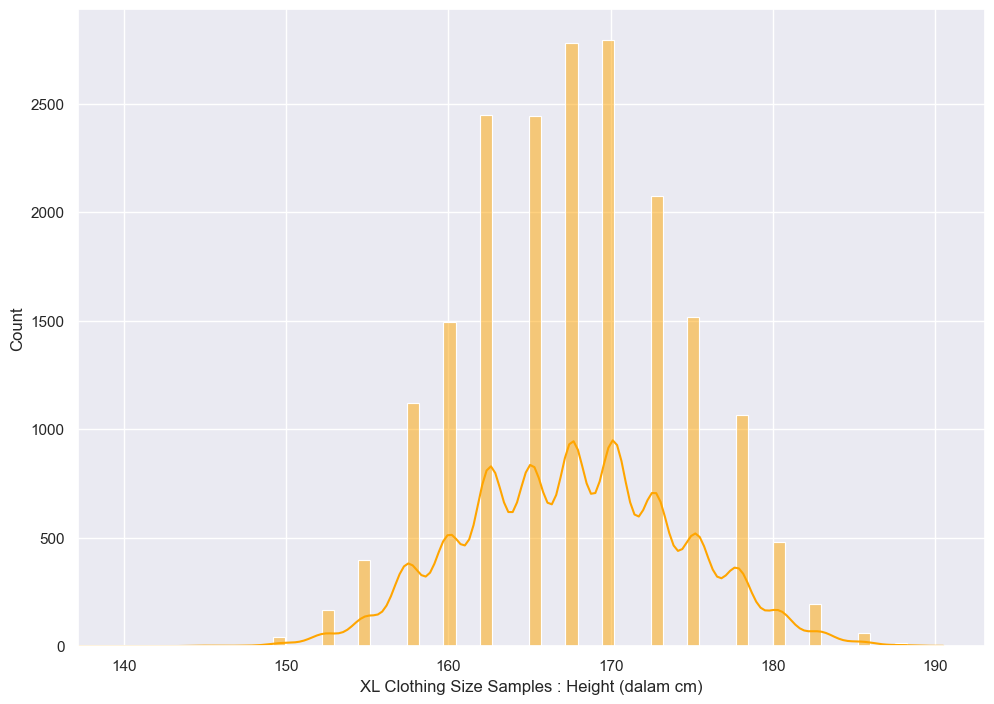

In [99]:
count_plotted = sns.histplot(x = 'height', data = dataframed.loc[dataframed['size'] == 5], kde = True, color = 'orange')
count_plotted.set(xlabel = "XL Clothing Size Samples : Height (dalam cm)")
count_plotted.set(xlim = (137.1600, 193.0400))

[Text(0.5, 0, 'XL Clothing Size Samples : Height (dalam cm)')]

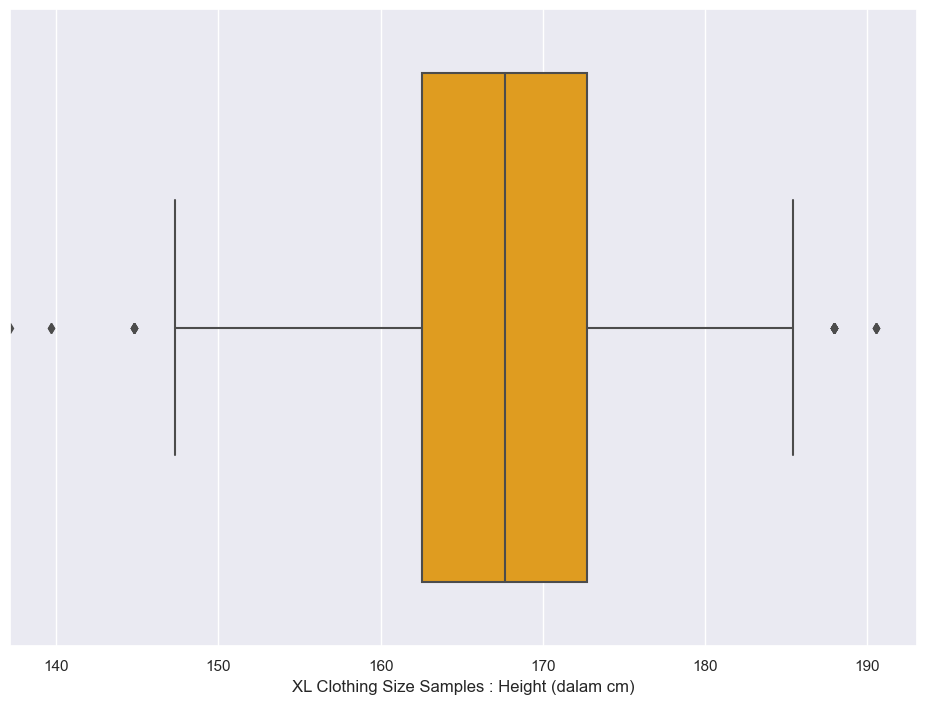

In [100]:
boxxer_plot = sns.boxplot(x = 'height', data = dataframed.loc[dataframed['size'] == 5], color = 'orange')
boxxer_plot.set(xlim = (137.1600, 193.0400))
boxxer_plot.set(xlabel = "XL Clothing Size Samples : Height (dalam cm)")

In [101]:
numpy_array = np.array(dataframed.loc[dataframed['size'] == 5]['height'],)
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("Nilai outliers kurang dari {:.4f}".format(lower_bound), "atau lebih besar dari {:.4f}".format(upper_bound))
print("Ada" ,len(outliers), "outliers.")

Nilai outliers kurang dari 147.3200 atau lebih besar dari 187.9600
Ada 28 outliers.


[(1.0, 7.0)]

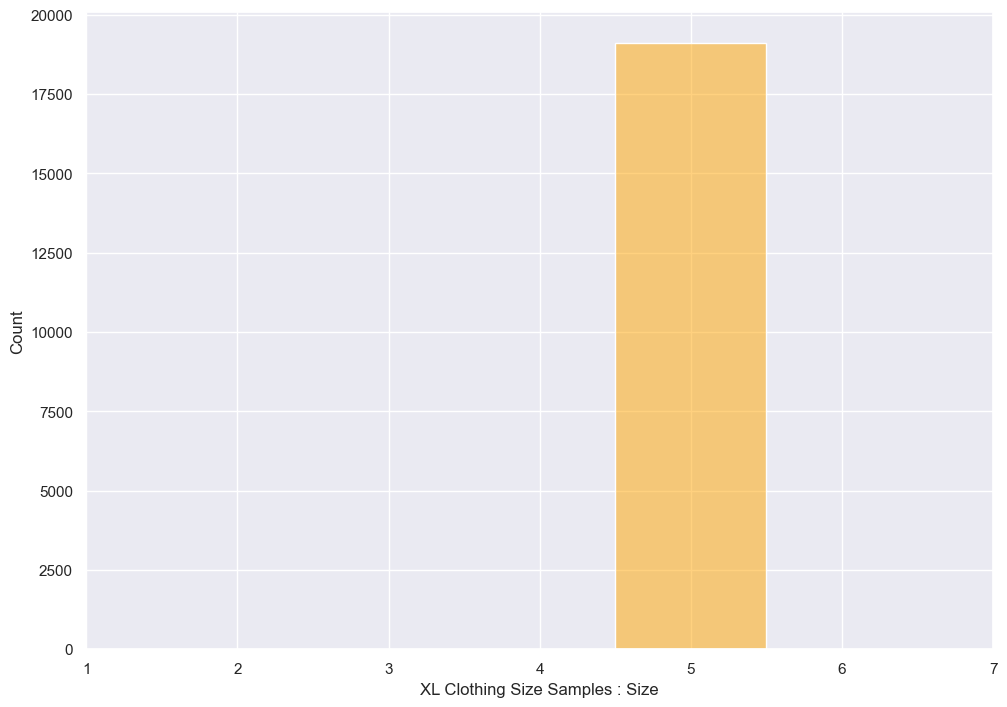

In [102]:
count_plotted = sns.histplot(x = 'size', data = dataframed.loc[dataframed['size'] == 5], kde = True, color = 'orange')
count_plotted.set(xlabel = "XL Clothing Size Samples : Size")
count_plotted.set(xlim = (1.0000, 7.0000))

[Text(0.5, 0, 'XL Clothing Size Samples : Size')]

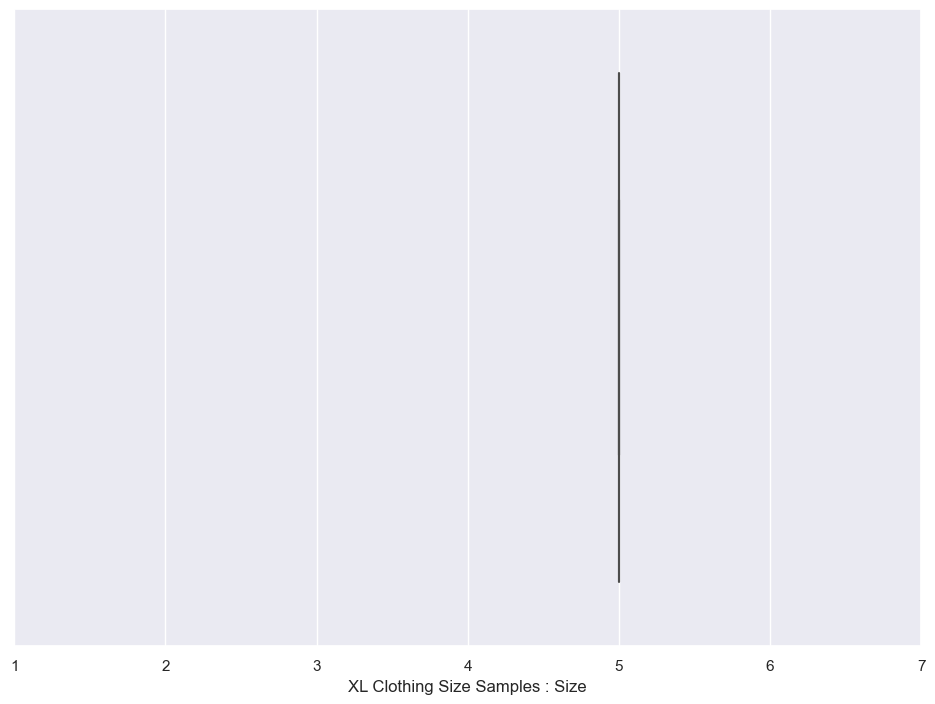

In [103]:
boxxer_plot = sns.boxplot(x = 'size', data = dataframed.loc[dataframed['size'] == 5], color = 'orange')
boxxer_plot.set(xlim = (1.0000, 7.0000))
boxxer_plot.set(xlabel = "XL Clothing Size Samples : Size")

In [104]:
numpy_array = np.array(dataframed.loc[dataframed['size'] == 5]['size'],)
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("Nilai outliers kurang dari {:.4f}".format(lower_bound), "atau lebih besar dari {:.4f}".format(upper_bound))
print("Ada" ,len(outliers), "outliers.")

Nilai outliers kurang dari 5.0000 atau lebih besar dari 5.0000
Ada 0 outliers.


[(7.8283, 54.3236)]

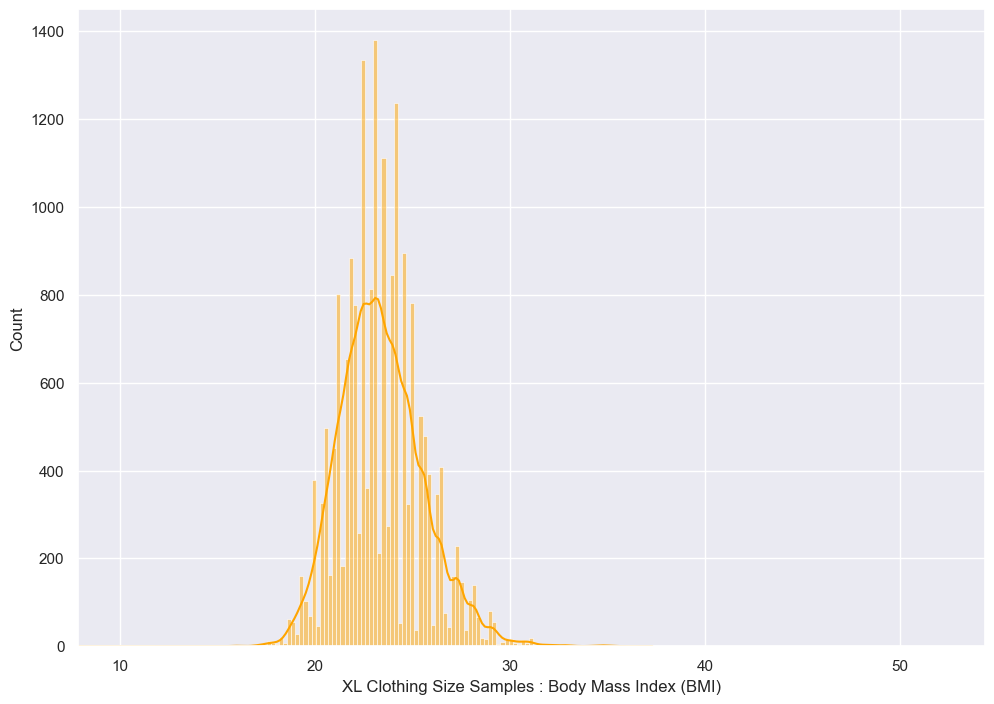

In [105]:
count_plotted = sns.histplot(x = 'bmi', data = dataframed.loc[dataframed['size'] == 5], kde = True, color = 'orange')
count_plotted.set(xlabel = "XL Clothing Size Samples : Body Mass Index (BMI)")
count_plotted.set(xlim = (7.8283, 54.3236))

[Text(0.5, 0, 'XL Clothing Size Samples : Body Mass Index (BMI)')]

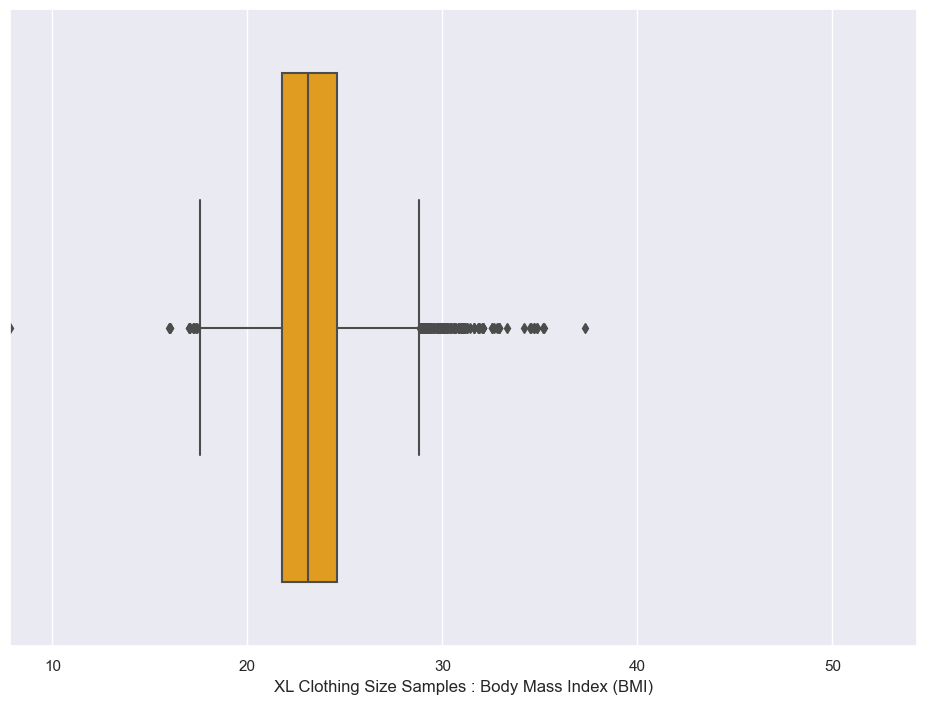

In [106]:
boxxer_plot = sns.boxplot(x = 'bmi', data = dataframed.loc[dataframed['size'] == 5], color = 'orange')
boxxer_plot.set(xlim = (7.8283, 54.3236))
boxxer_plot.set(xlabel = "XL Clothing Size Samples : Body Mass Index (BMI)")

In [107]:
numpy_array = np.array(dataframed.loc[dataframed['size'] == 5]['bmi'],)
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("Nilai outliers kurang dari {:.4f}".format(lower_bound), "atau lebih besar dari {:.4f}".format(upper_bound))
print("Ada" ,len(outliers), "outliers.")

Nilai outliers kurang dari 17.5665 atau lebih besar dari 28.8253
Ada 284 outliers.


[(22.0, 136.0)]

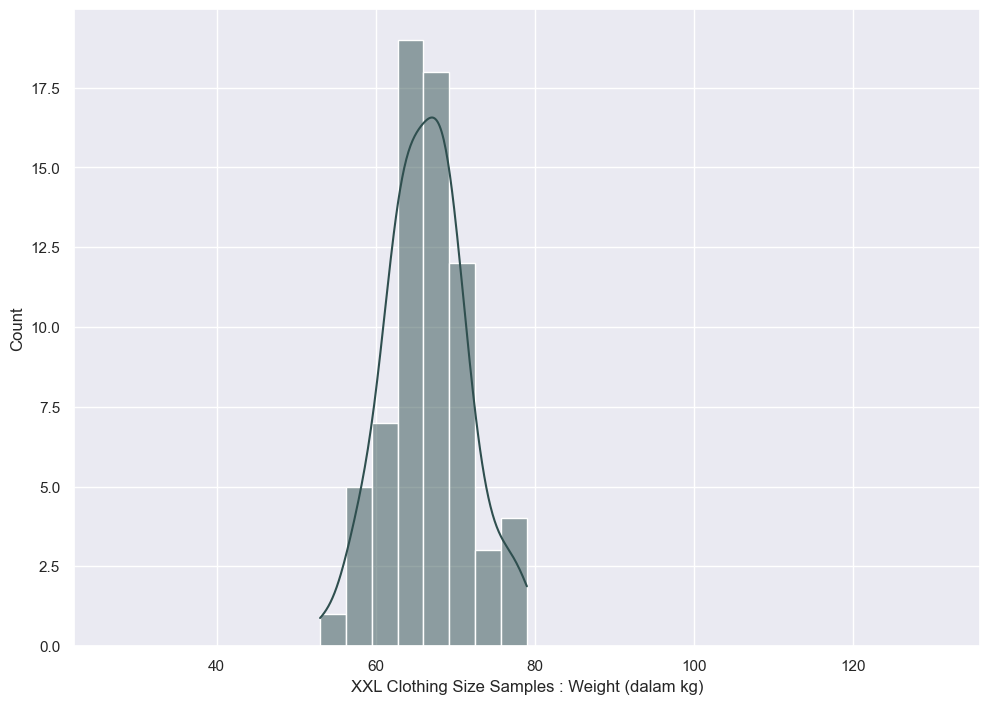

In [108]:
count_plotted = sns.histplot(x = 'weight', data = dataframed.loc[dataframed['size'] == 6], kde = True, color = 'darkslategrey')
count_plotted.set(xlabel = "XXL Clothing Size Samples : Weight (dalam kg)")
count_plotted.set(xlim = (22.0000, 136.0000))

[Text(0.5, 0, 'XXL Clothing Size Samples : Weight (dalam kg)')]

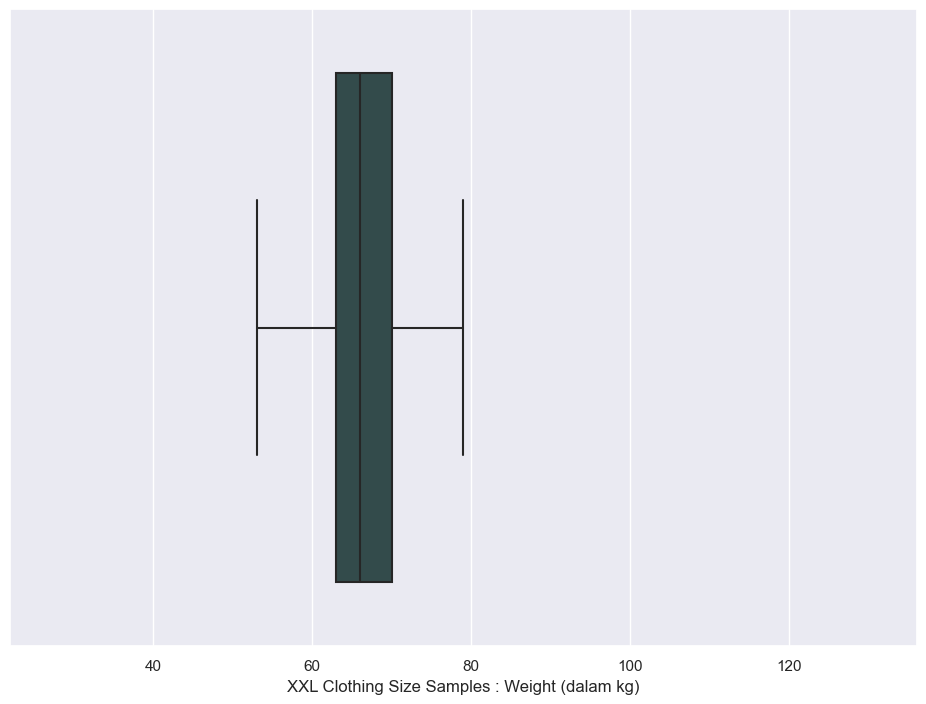

In [109]:
boxxer_plot = sns.boxplot(x = 'weight', data = dataframed.loc[dataframed['size'] == 6], color = 'darkslategrey')
boxxer_plot.set(xlim = (22.0000, 136.0000))
boxxer_plot.set(xlabel = "XXL Clothing Size Samples : Weight (dalam kg)")

In [110]:
numpy_array = np.array(dataframed.loc[dataframed['size'] == 6]['weight'],)
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("Nilai outliers kurang dari {:.4f}".format(lower_bound), "atau lebih besar dari {:.4f}".format(upper_bound))
print("Ada" ,len(outliers), "outliers.")

Nilai outliers kurang dari 52.5000 atau lebih besar dari 80.5000
Ada 0 outliers.


[(0.0, 117.0)]

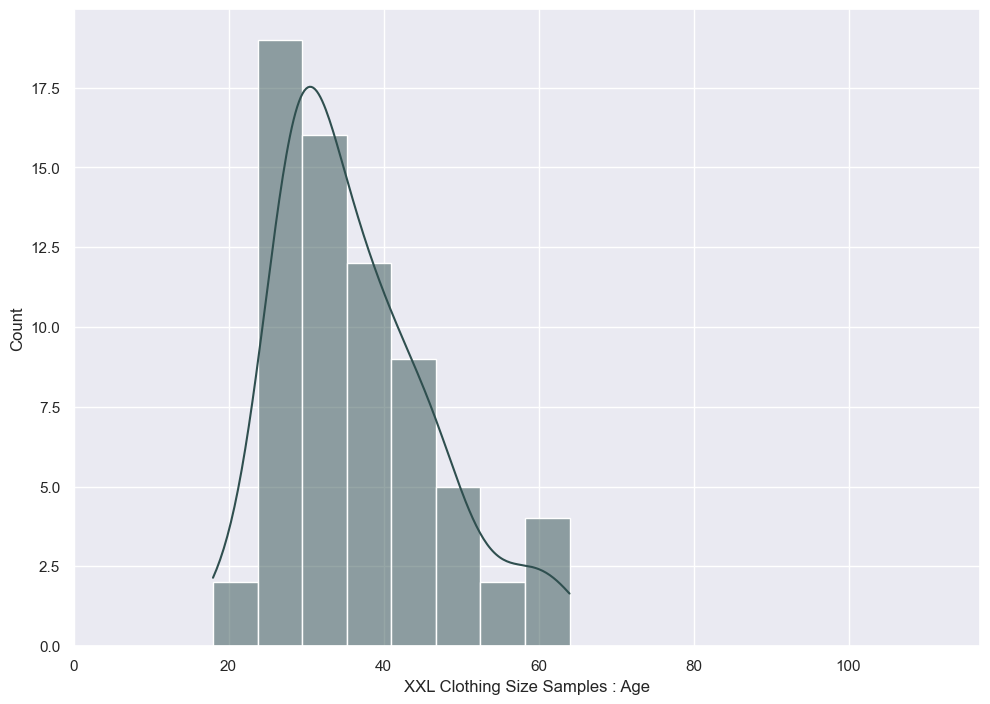

In [111]:
count_plotted = sns.histplot(x = 'age', data = dataframed.loc[dataframed['size'] == 6], kde = True, color = 'darkslategrey')
count_plotted.set(xlabel = "XXL Clothing Size Samples : Age")
count_plotted.set(xlim = (0.0000, 117.0000))

[Text(0.5, 0, 'XXL Clothing Size Samples : Age')]

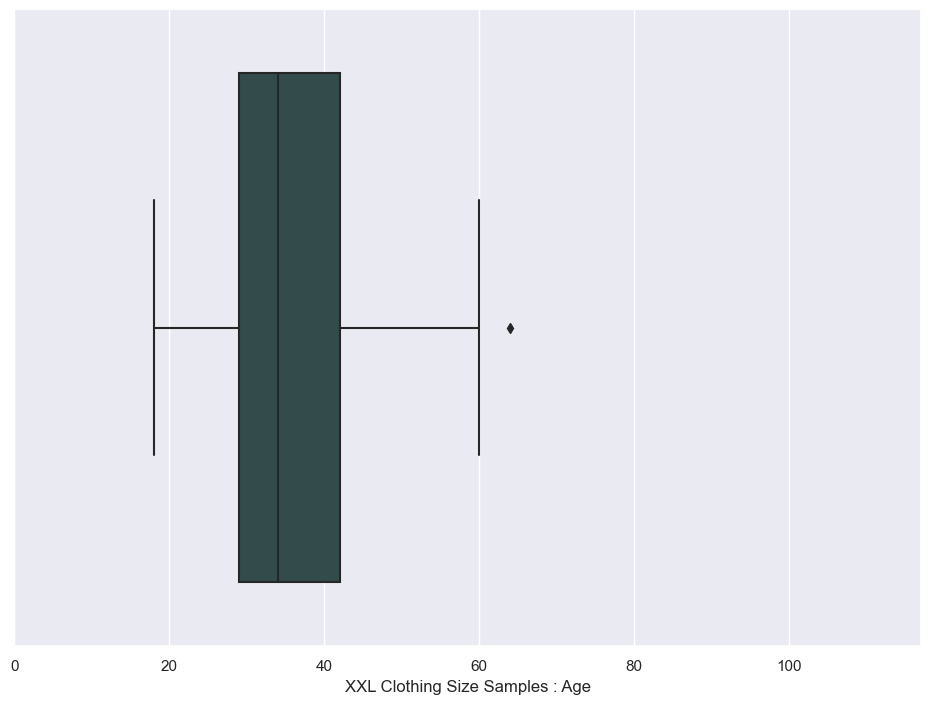

In [112]:
boxxer_plot = sns.boxplot(x = 'age', data = dataframed.loc[dataframed['size'] == 6], color = 'darkslategrey')
boxxer_plot.set(xlim = (0.0000, 117.0000))
boxxer_plot.set(xlabel = "XXL Clothing Size Samples : Age")

In [113]:
numpy_array = np.array(dataframed.loc[dataframed['size'] == 6]['age'],)
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("Nilai outliers kurang dari {:.4f}".format(lower_bound), "atau lebih besar dari {:.4f}".format(upper_bound))
print("Ada" ,len(outliers), "outliers.")

Nilai outliers kurang dari 9.5000 atau lebih besar dari 61.5000
Ada 1 outliers.


[(137.16, 193.04)]

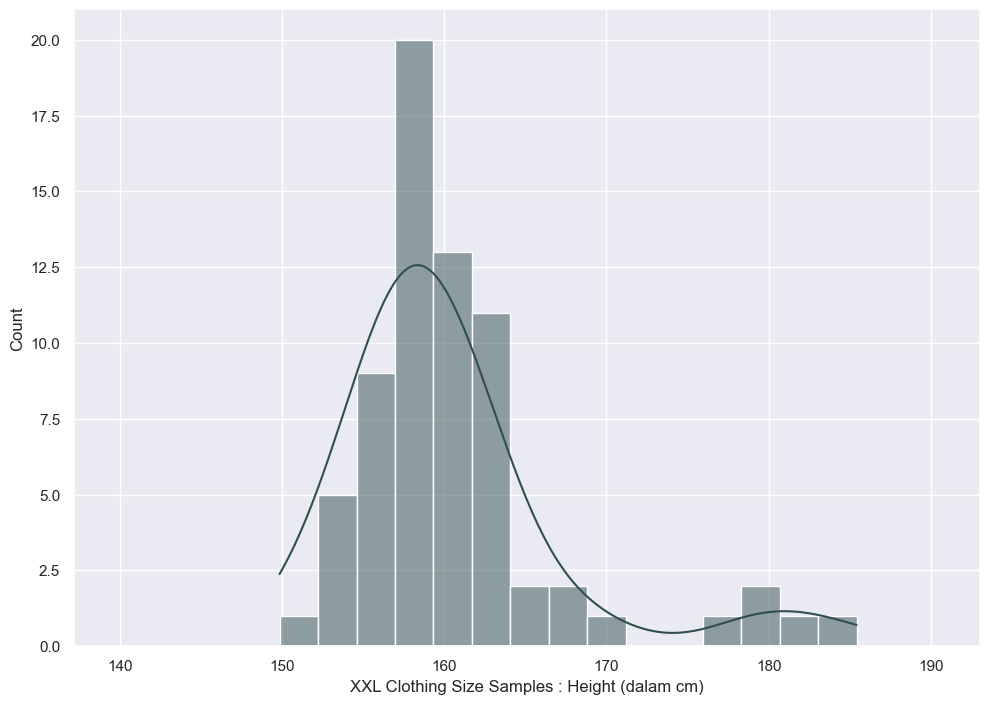

In [114]:
count_plotted = sns.histplot(x = 'height', data = dataframed.loc[dataframed['size'] == 6], kde = True, color = 'darkslategrey')
count_plotted.set(xlabel = "XXL Clothing Size Samples : Height (dalam cm)")
count_plotted.set(xlim = (137.1600, 193.0400))

[Text(0.5, 0, 'XXL Clothing Size Samples : Height (dalam cm)')]

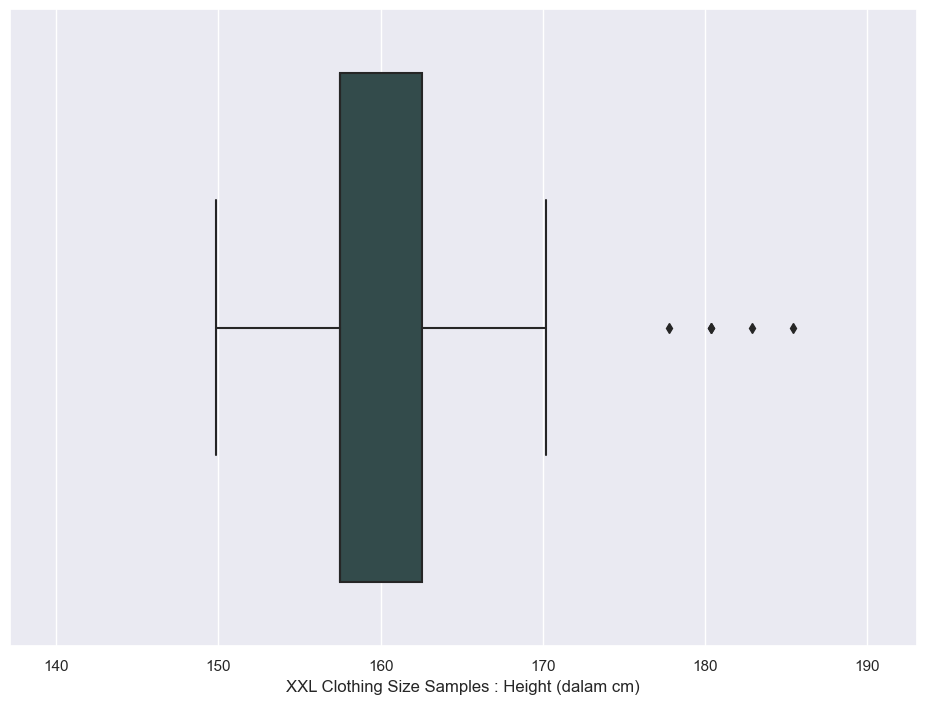

In [115]:
boxxer_plot = sns.boxplot(x = 'height', data = dataframed.loc[dataframed['size'] == 6], color = 'darkslategrey')
boxxer_plot.set(xlim = (137.1600, 193.0400))
boxxer_plot.set(xlabel = "XXL Clothing Size Samples : Height (dalam cm)")

In [116]:
numpy_array = np.array(dataframed.loc[dataframed['size'] == 6]['height'],)
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("Nilai outliers kurang dari {:.4f}".format(lower_bound), "atau lebih besar dari {:.4f}".format(upper_bound))
print("Ada" ,len(outliers), "outliers.")

Nilai outliers kurang dari 149.8600 atau lebih besar dari 170.1800
Ada 5 outliers.


[(1.0, 7.0)]

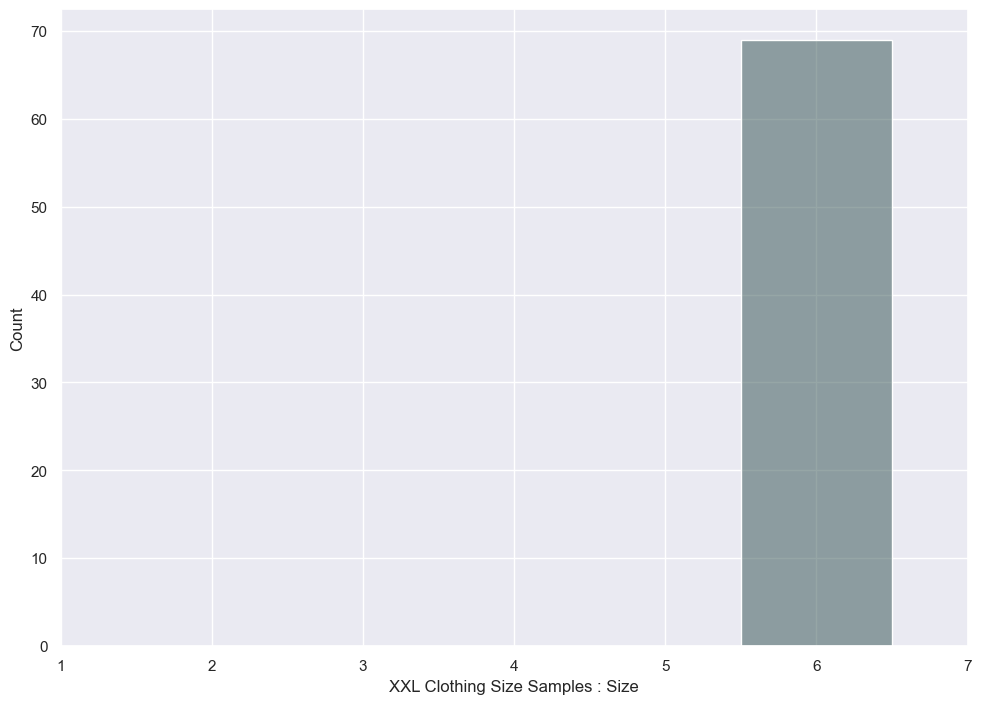

In [117]:
count_plotted = sns.histplot(x = 'size', data = dataframed.loc[dataframed['size'] == 6], kde = True, color = 'darkslategrey')
count_plotted.set(xlabel = "XXL Clothing Size Samples : Size")
count_plotted.set(xlim = (1.0000, 7.0000))

[Text(0.5, 0, 'XXL Clothing Size Samples : Size')]

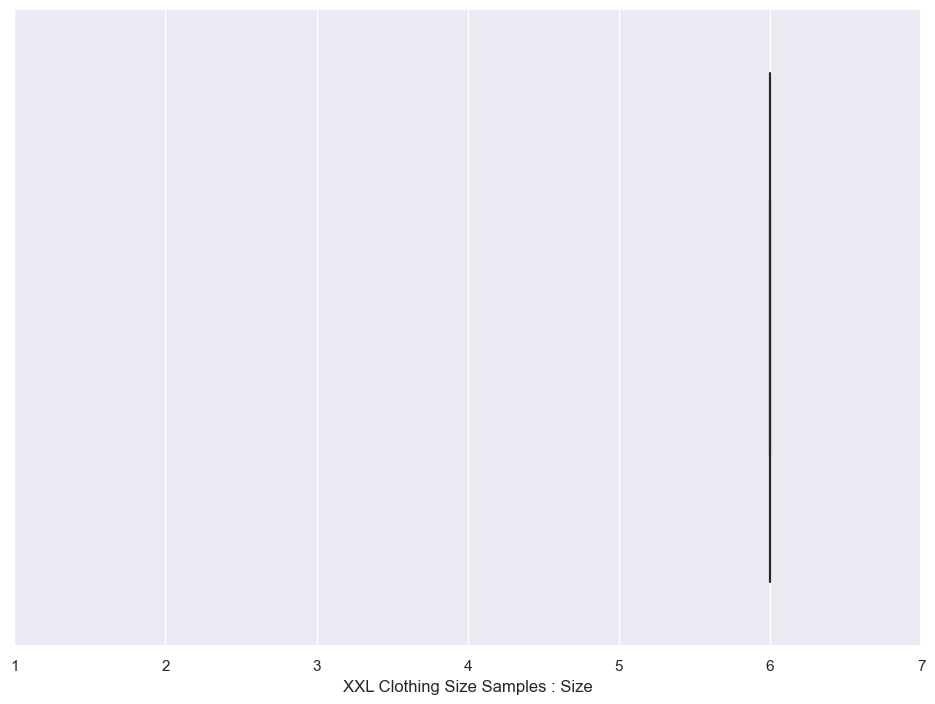

In [118]:
boxxer_plot = sns.boxplot(x = 'size', data = dataframed.loc[dataframed['size'] == 6], color = 'darkslategrey')
boxxer_plot.set(xlim = (1.0000, 7.0000))
boxxer_plot.set(xlabel = "XXL Clothing Size Samples : Size")

In [119]:
numpy_array = np.array(dataframed.loc[dataframed['size'] == 6]['size'],)
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("Nilai outliers kurang dari {:.4f}".format(lower_bound), "atau lebih besar dari {:.4f}".format(upper_bound))
print("Ada" ,len(outliers), "outliers.")

Nilai outliers kurang dari 6.0000 atau lebih besar dari 6.0000
Ada 0 outliers.


[(7.8283, 54.3236)]

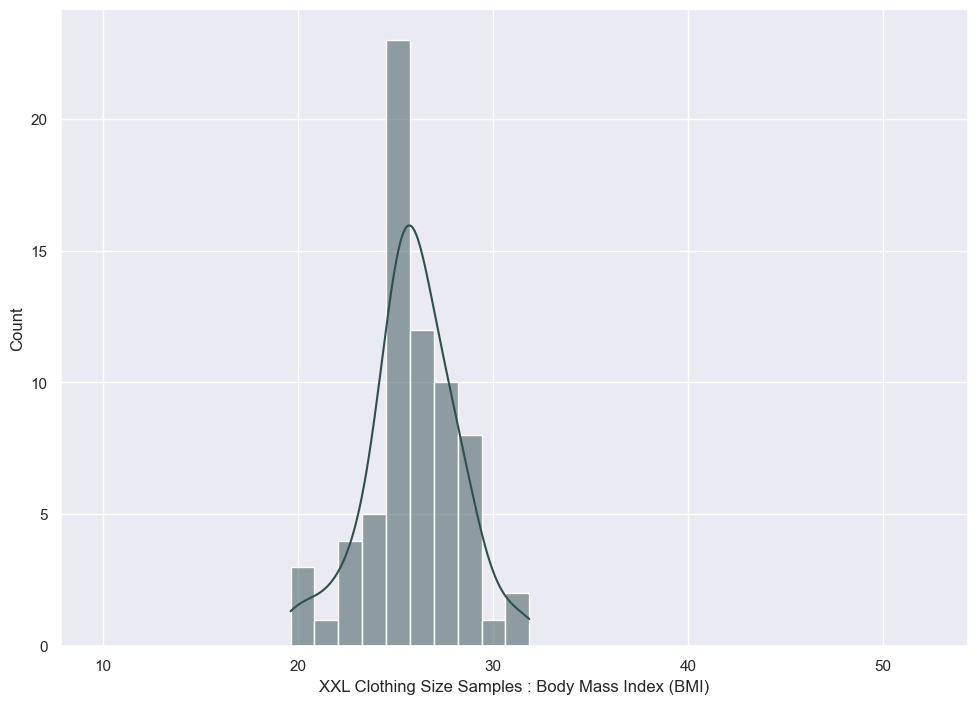

In [120]:
count_plotted = sns.histplot(x = 'bmi', data = dataframed.loc[dataframed['size'] == 6], kde = True, color = 'darkslategrey')
count_plotted.set(xlabel = "XXL Clothing Size Samples : Body Mass Index (BMI)")
count_plotted.set(xlim = (7.8283, 54.3236))

[Text(0.5, 0, 'XXL Clothing Size Samples : Body Mass Index (BMI)')]

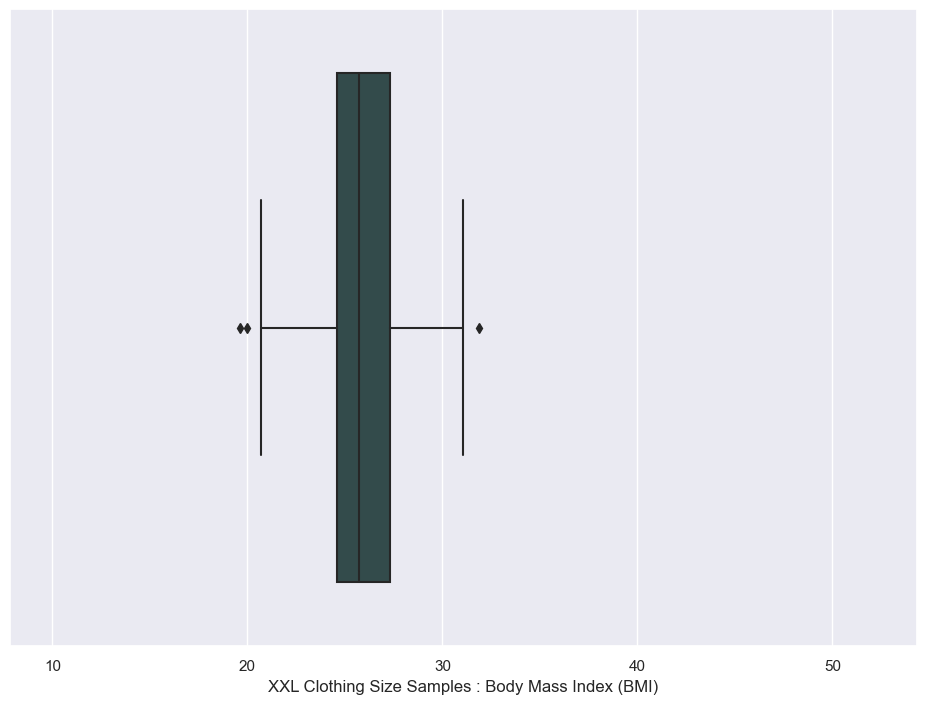

In [121]:
boxxer_plot = sns.boxplot(x = 'bmi', data = dataframed.loc[dataframed['size'] == 6], color = 'darkslategrey')
boxxer_plot.set(xlim = (7.8283, 54.3236))
boxxer_plot.set(xlabel = "XXL Clothing Size Samples : Body Mass Index (BMI)")

In [122]:
numpy_array = np.array(dataframed.loc[dataframed['size'] == 6]['bmi'],)
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("Nilai outliers kurang dari {:.4f}".format(lower_bound), "atau lebih besar dari {:.4f}".format(upper_bound))
print("Ada" ,len(outliers), "outliers.")

Nilai outliers kurang dari 20.5027 atau lebih besar dari 31.4375
Ada 3 outliers.


[(22.0, 136.0)]

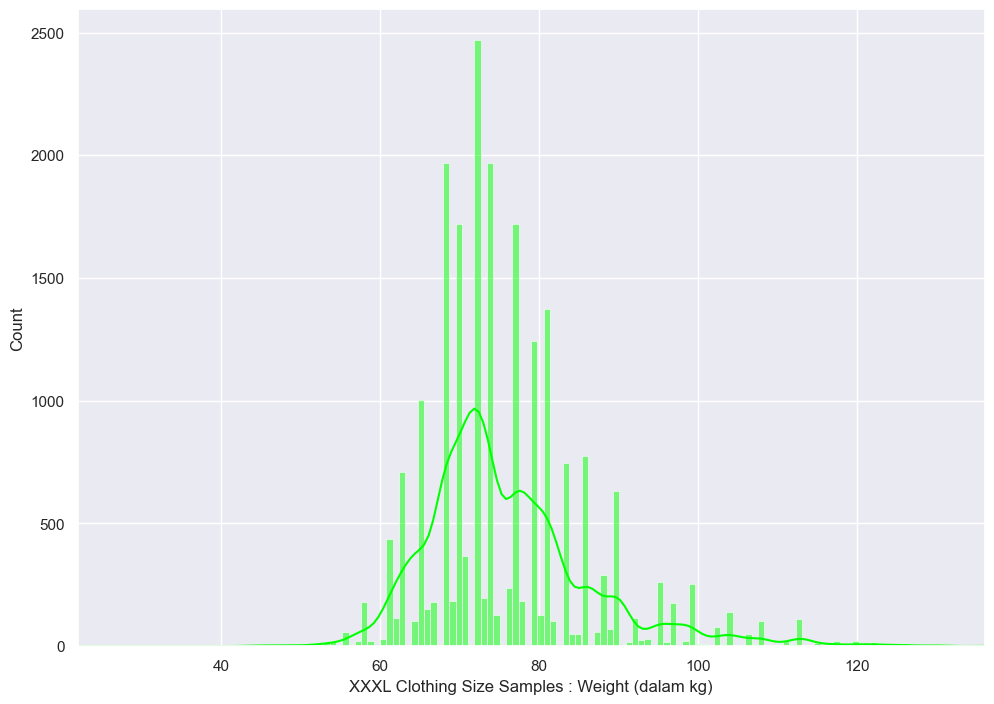

In [123]:
count_plotted = sns.histplot(x = 'weight', data = dataframed.loc[dataframed['size'] == 7], kde = True, color = 'lime')
count_plotted.set(xlabel = "XXXL Clothing Size Samples : Weight (dalam kg)")
count_plotted.set(xlim = (22.0000, 136.0000))

[Text(0.5, 0, 'XXXL Clothing Size Samples : Weight (dalam kg)')]

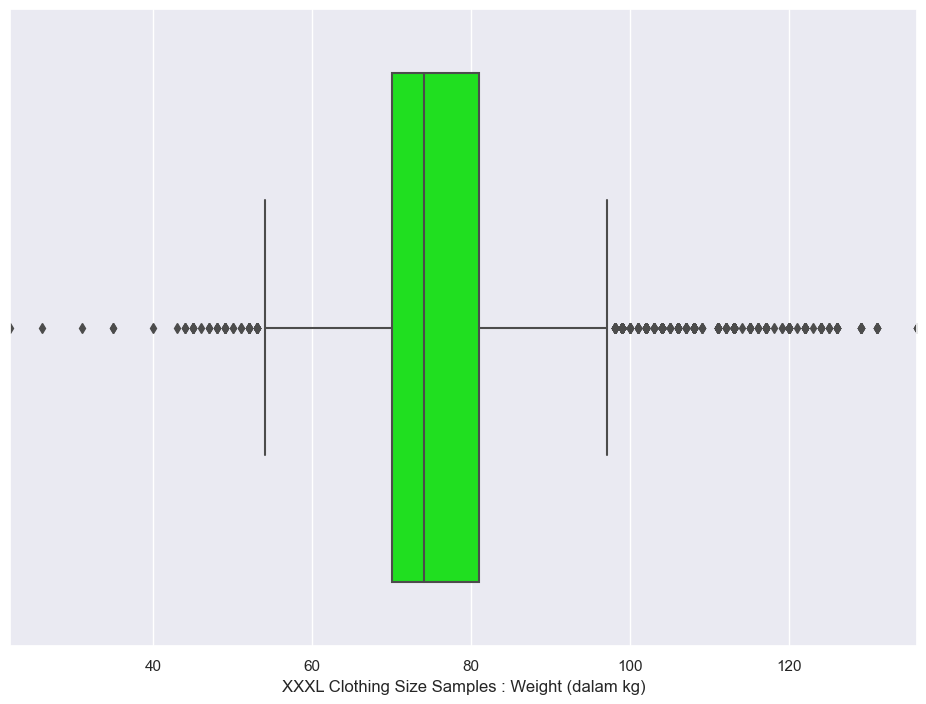

In [124]:
boxxer_plot = sns.boxplot(x = 'weight', data = dataframed.loc[dataframed['size'] == 7], color = 'lime')
boxxer_plot.set(xlim = (22.0000, 136.0000))
boxxer_plot.set(xlabel = "XXXL Clothing Size Samples : Weight (dalam kg)")

In [125]:
numpy_array = np.array(dataframed.loc[dataframed['size'] == 7]['weight'],)
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("Nilai outliers kurang dari {:.4f}".format(lower_bound), "atau lebih besar dari {:.4f}".format(upper_bound))
print("Ada" ,len(outliers), "outliers.")

Nilai outliers kurang dari 53.5000 atau lebih besar dari 97.5000
Ada 1024 outliers.


[(0.0, 117.0)]

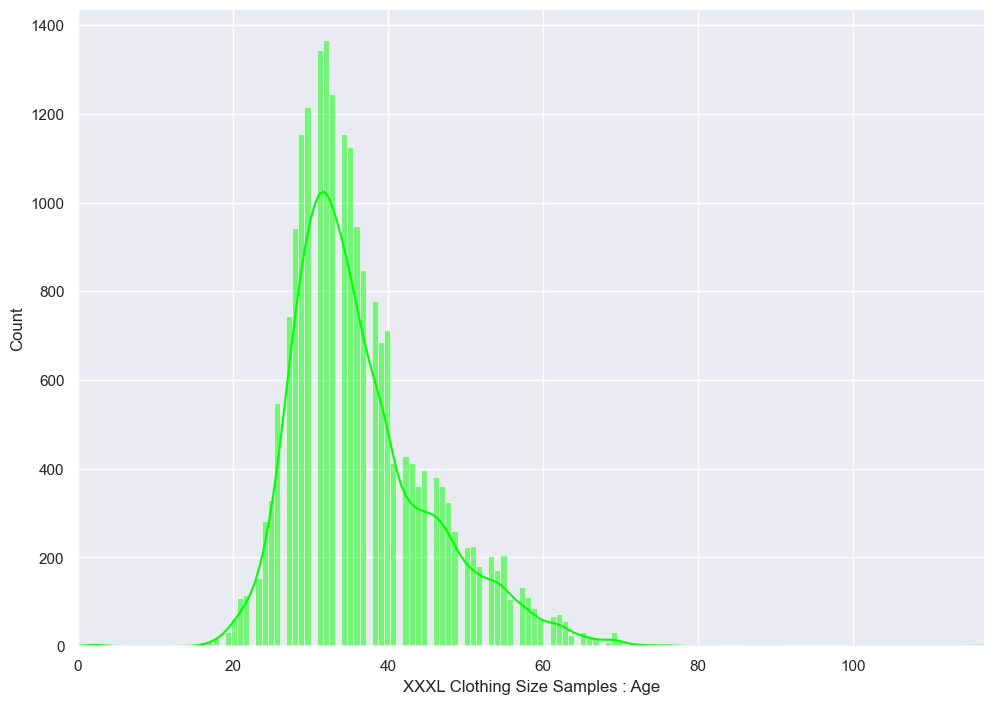

In [126]:
count_plotted = sns.histplot(x = 'age', data = dataframed.loc[dataframed['size'] == 7], kde = True, color = 'lime')
count_plotted.set(xlabel = "XXXL Clothing Size Samples : Age")
count_plotted.set(xlim = (0.0000, 117.0000))

[Text(0.5, 0, 'XXXL Clothing Size Samples : Age')]

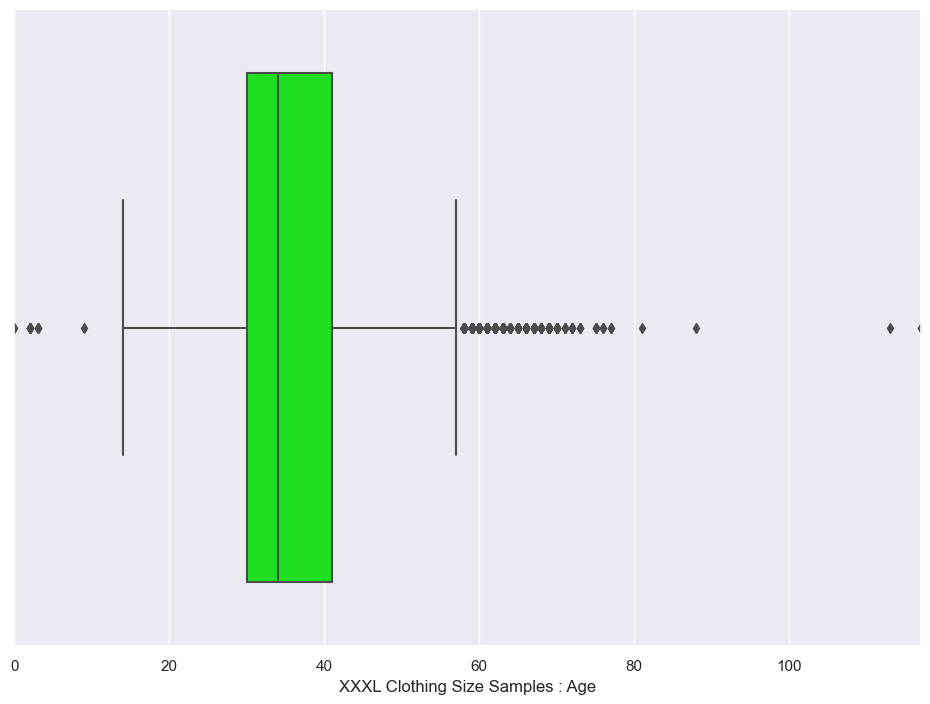

In [127]:
boxxer_plot = sns.boxplot(x = 'age', data = dataframed.loc[dataframed['size'] == 7], color = 'lime')
boxxer_plot.set(xlim = (0.0000, 117.0000))
boxxer_plot.set(xlabel = "XXXL Clothing Size Samples : Age")

In [128]:
numpy_array = np.array(dataframed.loc[dataframed['size'] == 7]['age'],)
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("Nilai outliers kurang dari {:.4f}".format(lower_bound), "atau lebih besar dari {:.4f}".format(upper_bound))
print("Ada" ,len(outliers), "outliers.")

Nilai outliers kurang dari 13.5000 atau lebih besar dari 57.5000
Ada 645 outliers.


[(137.16, 193.04)]

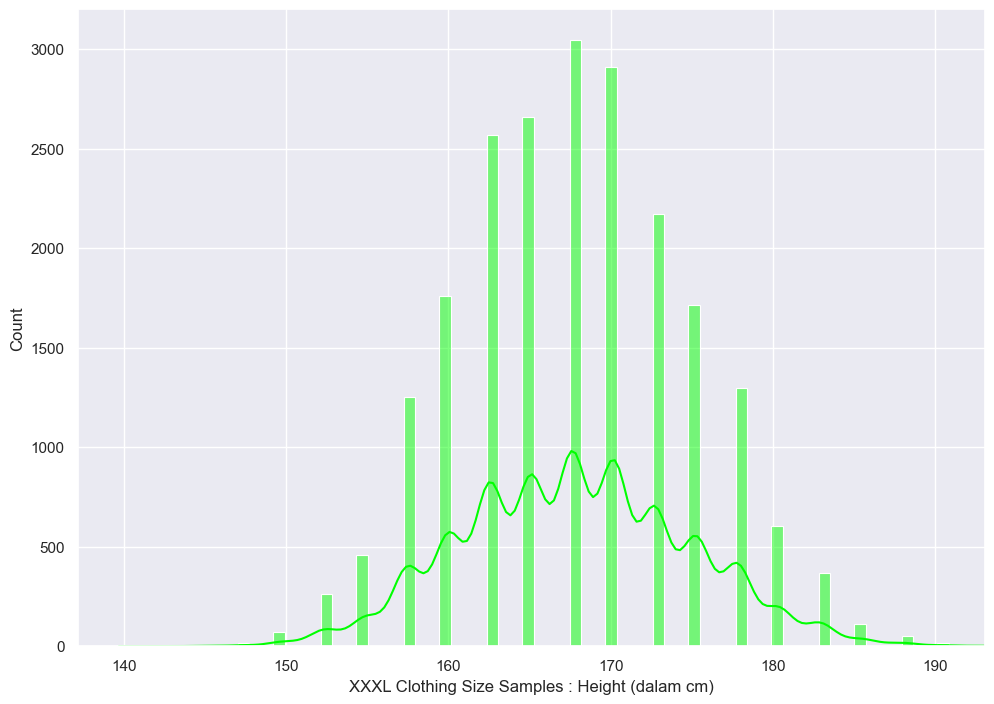

In [129]:
count_plotted = sns.histplot(x = 'height', data = dataframed.loc[dataframed['size'] == 7], kde = True, color = 'lime')
count_plotted.set(xlabel = "XXXL Clothing Size Samples : Height (dalam cm)")
count_plotted.set(xlim = (137.1600, 193.0400))

[Text(0.5, 0, 'XXXL Clothing Size Samples : Height (dalam cm)')]

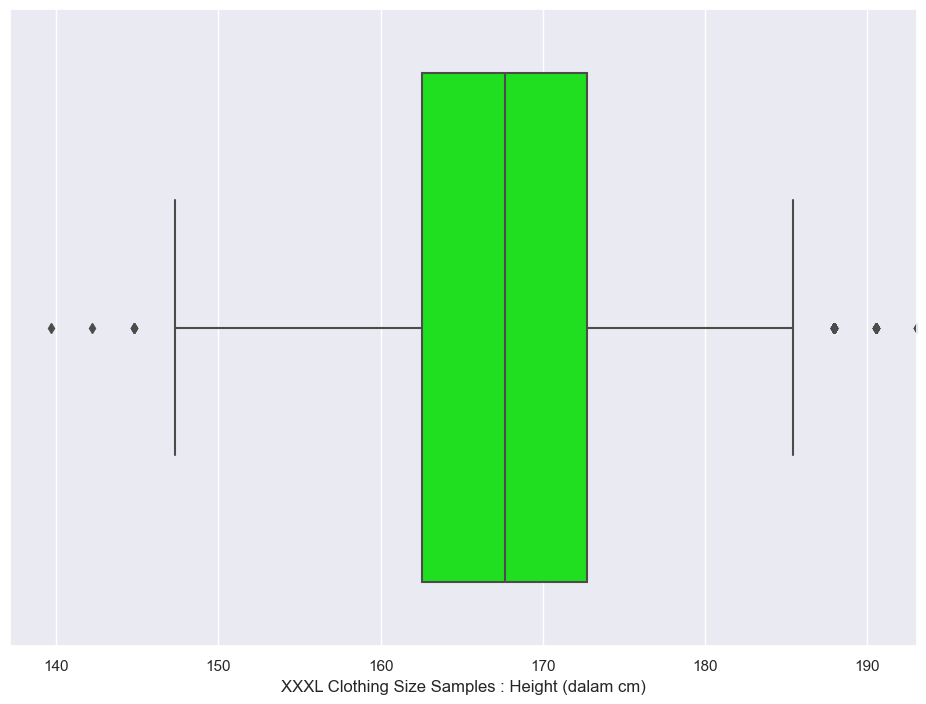

In [130]:
boxxer_plot = sns.boxplot(x = 'height', data = dataframed.loc[dataframed['size'] == 7], color = 'lime')
boxxer_plot.set(xlim = (137.1600, 193.0400))
boxxer_plot.set(xlabel = "XXXL Clothing Size Samples : Height (dalam cm)")

In [131]:
numpy_array = np.array(dataframed.loc[dataframed['size'] == 7]['height'],)
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("Nilai outliers kurang dari {:.4f}".format(lower_bound), "atau lebih besar dari {:.4f}".format(upper_bound))
print("Ada" ,len(outliers), "outliers.")

Nilai outliers kurang dari 147.3200 atau lebih besar dari 187.9600
Ada 79 outliers.


[(1.0, 7.0)]

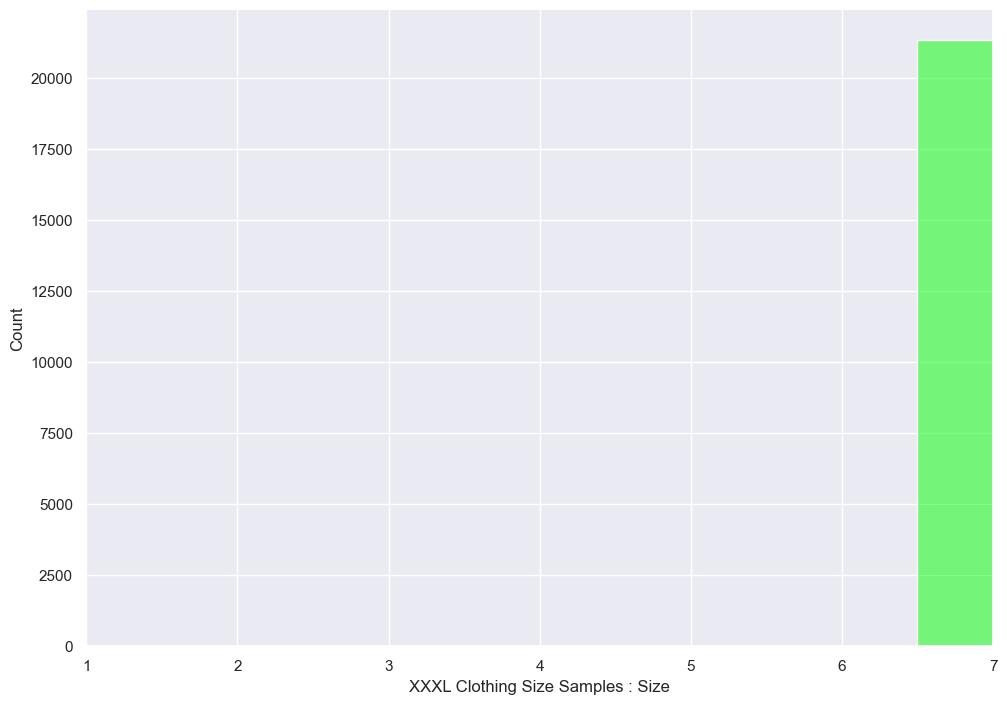

In [132]:
count_plotted = sns.histplot(x = 'size', data = dataframed.loc[dataframed['size'] == 7], kde = True, color = 'lime')
count_plotted.set(xlabel = "XXXL Clothing Size Samples : Size")
count_plotted.set(xlim = (1.0000, 7.0000))

[Text(0.5, 0, 'XXXL Clothing Size Samples : Size')]

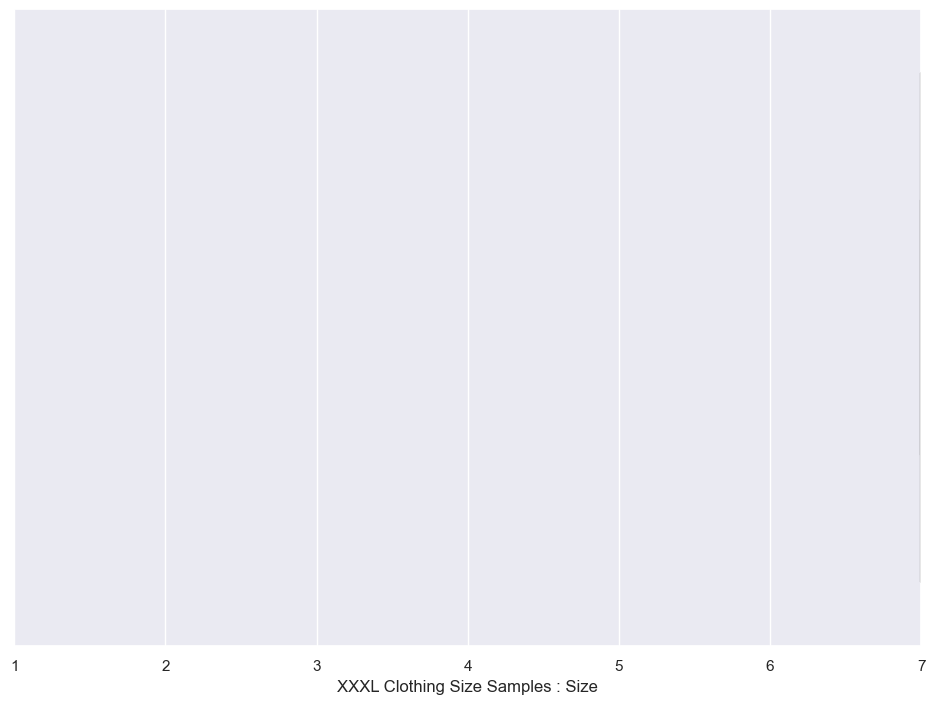

In [133]:
boxxer_plot = sns.boxplot(x = 'size', data = dataframed.loc[dataframed['size'] == 7], color = 'lime')
boxxer_plot.set(xlim = (1.0000, 7.0000))
boxxer_plot.set(xlabel = "XXXL Clothing Size Samples : Size")

In [134]:
numpy_array = np.array(dataframed.loc[dataframed['size'] == 7]['size'],)
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("Nilai outliers kurang dari {:.4f}".format(lower_bound), "atau lebih besar dari {:.4f}".format(upper_bound))
print("Ada" ,len(outliers), "outliers.")

Nilai outliers kurang dari 7.0000 atau lebih besar dari 7.0000
Ada 0 outliers.


[(7.8283, 54.3236)]

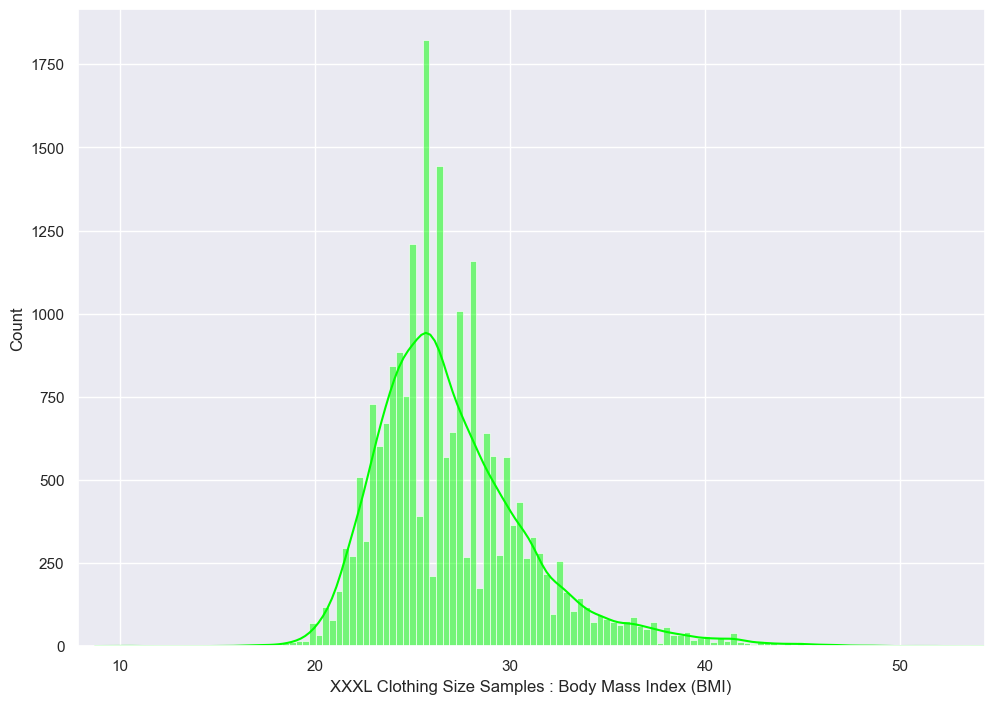

In [135]:
count_plotted = sns.histplot(x = 'bmi', data = dataframed.loc[dataframed['size'] == 7], kde = True, color = 'lime')
count_plotted.set(xlabel = "XXXL Clothing Size Samples : Body Mass Index (BMI)")
count_plotted.set(xlim = (7.8283, 54.3236))

[Text(0.5, 0, 'XXXL Clothing Size Samples : Body Mass Index (BMI)')]

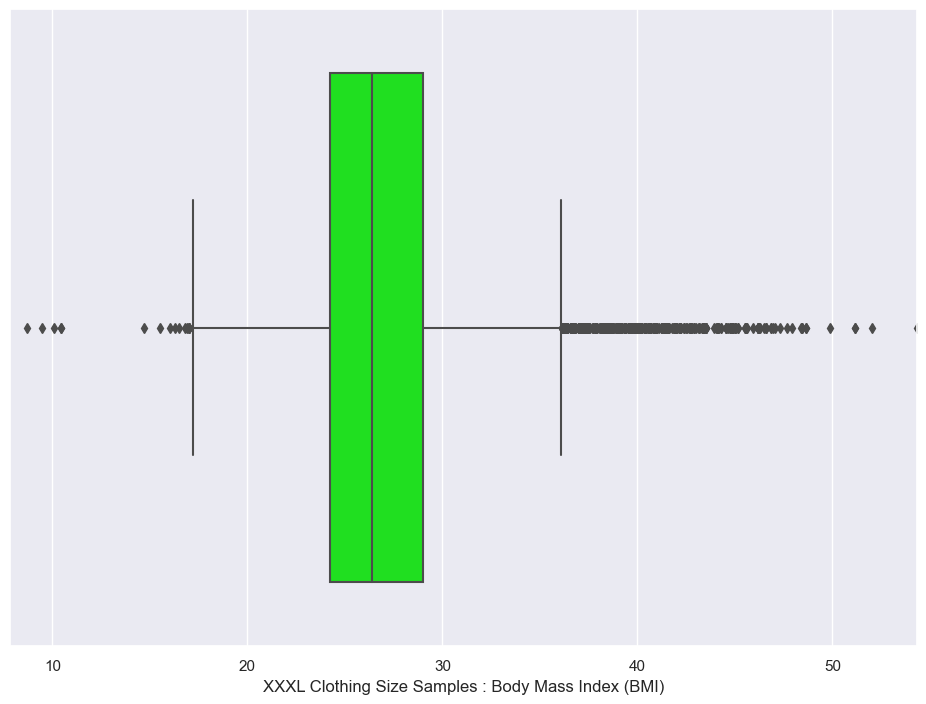

In [136]:
boxxer_plot = sns.boxplot(x = 'bmi', data = dataframed.loc[dataframed['size'] == 7], color = 'lime')
boxxer_plot.set(xlim = (7.8283, 54.3236))
boxxer_plot.set(xlabel = "XXXL Clothing Size Samples : Body Mass Index (BMI)")

In [137]:
numpy_array = np.array(dataframed.loc[dataframed['size'] == 7]['bmi'],)
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("Nilai outliers kurang dari {:.4f}".format(lower_bound), "atau lebih besar dari {:.4f}".format(upper_bound))
print("Ada" ,len(outliers), "outliers.")

Nilai outliers kurang dari 17.0583 atau lebih besar dari 36.1367
Ada 778 outliers.


In [138]:
temp_frame = []
sizes = []
for size_type in dataframed['size'].unique():
    sizes.append(size_type)
    ndf = dataframed[['age','height','weight']][dataframed['size'] == size_type]
    zscore = ((ndf - ndf.mean())/ndf.std())
    temp_frame.append(zscore)
    
for x in range(len(temp_frame)):
    temp_frame[x]['age'] = temp_frame[x]['age'][(temp_frame[x]['age']>-3) & (temp_frame[x]['age']<3)]
    temp_frame[x]['height'] = temp_frame[x]['height'][(temp_frame[x]['height']>-3) & (temp_frame[x]['height']<3)]
    temp_frame[x]['weight'] = temp_frame[x]['weight'][(temp_frame[x]['weight']>-3) & (temp_frame[x]['weight']<3)]

for x in range(len(sizes)):
    temp_frame[x]['size'] = sizes[x]
dataframed = pd.concat(temp_frame)
dataframed.head()

,age,height,weight,size
0,-0.833345,0.769753,-0.660757,5
24,-0.713221,1.542477,1.556338,5
25,-0.352850,-1.162056,-0.291241,5
28,-0.472974,-1.934780,-1.399788,5
34,0.127644,-0.775695,0.447791,5


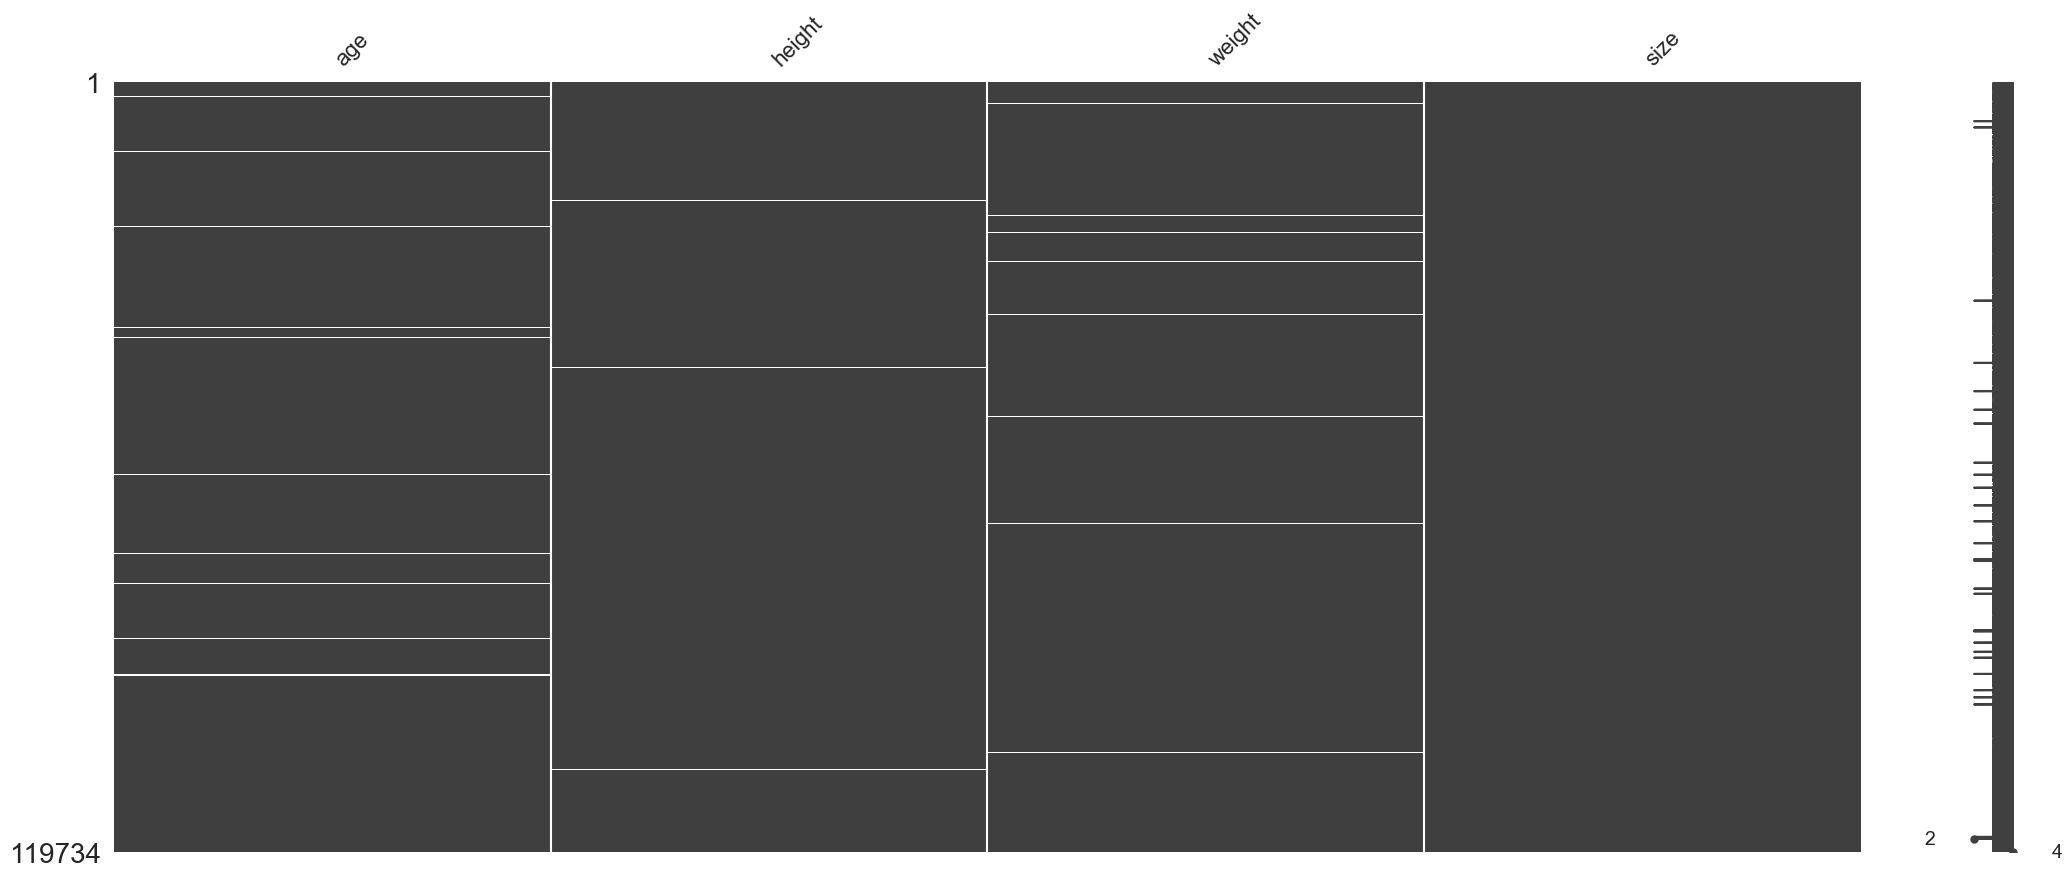

In [139]:
msno.matrix(dataframed)
plt.show()

In [140]:
dataframed["age"] = dataframed["age"].fillna(dataframed['age'].median())
dataframed["height"] = dataframed["height"].fillna(dataframed['height'].median())
dataframed["weight"] = dataframed["weight"].fillna(dataframed['weight'].median())

In [141]:
dataframed["bmi"] = dataframed["height"]/dataframed["weight"]

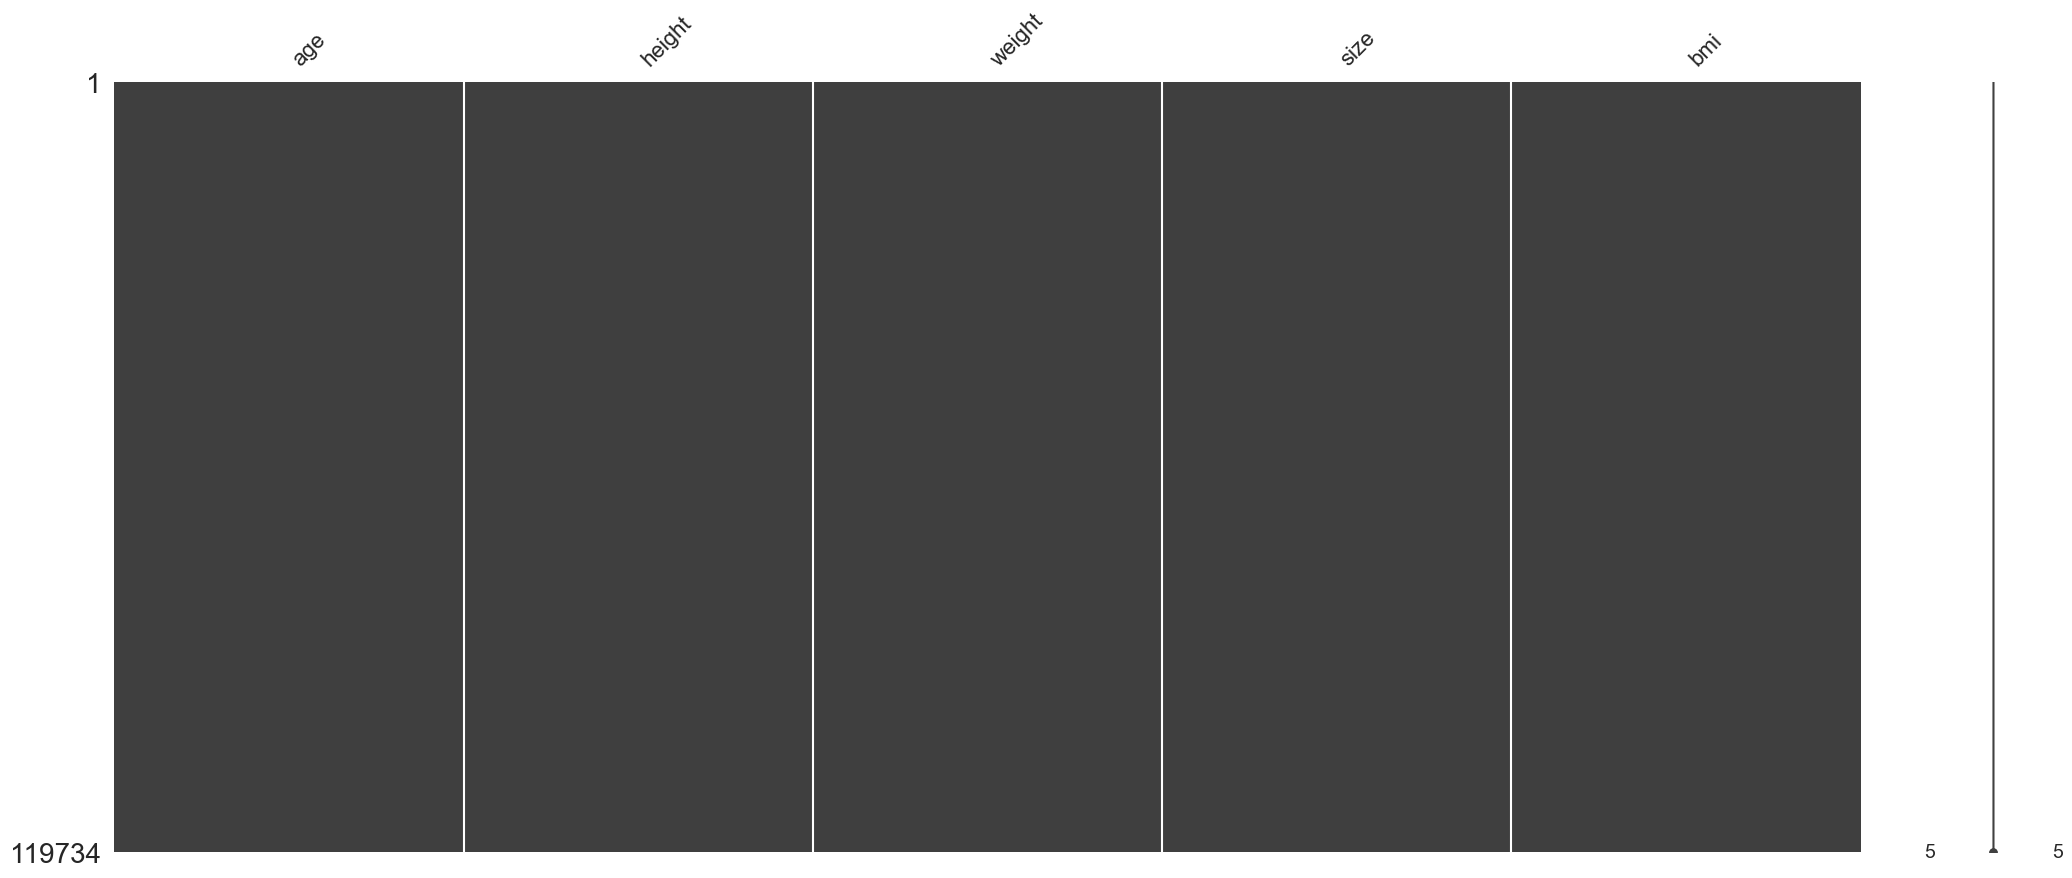

In [142]:
msno.matrix(dataframed)
plt.show()

In [143]:
X = dataframed[['weight', 'age', 'height', 'bmi']]
X.head()

,weight,age,height,bmi
0,-0.660757,-0.833345,0.769753,-1.164957
24,1.556338,-0.713221,1.542477,0.991094
25,-0.291241,-0.352850,-1.162056,3.990019
28,-1.399788,-0.472974,-1.934780,1.382195
34,0.447791,0.127644,-0.775695,-1.732270


In [144]:
y = dataframed[['size']]
y.head()

,size
0,5
24,5
25,5
28,5
34,5


In [145]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , classification_report, ConfusionMatrixDisplay,precision_score,recall_score, f1_score,roc_auc_score,roc_curve

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [147]:
print("Shape  Data (20%)")
print("X_train shape : ", X_train.shape)
print("y_train shape : ", y_train.shape)
print("X_test shape : ", X_test.shape)
print("y_test shape : ", y_test.shape)

Shape  Data (20%)
X_train shape :  (95787, 4)
y_train shape :  (95787, 1)
X_test shape :  (23947, 4)
y_test shape :  (23947, 1)


In [148]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train.values.ravel())
training_prediction = knn.predict(X_train)
testing_prediction = knn.predict(X_test)

#Training Metrics
training_accuracy = accuracy_score(y_train, training_prediction)
training_f1 = f1_score(y_train, training_prediction, average = 'weighted')
training_precision = precision_score(y_train, training_prediction, average = 'weighted')
training_recall = recall_score(y_train, training_prediction, average = 'weighted')

#Testing Metrics
testing_accuracy = accuracy_score(y_test, testing_prediction)
testing_f1 = f1_score(y_test, testing_prediction, average = 'weighted')
testing_precision = precision_score(y_test, testing_prediction, average = 'weighted')
testing_recall = recall_score(y_test, testing_prediction, average = 'weighted')

print('AL : K-Nearest Neighbors (20%)')
print('\n')
print('Training Model Performance Check')
print('Accuracy Score : {:.4f}'.format(training_accuracy))
print('F1 Score : {:.4f}'.format(training_f1))
print('Precision Score : {:.4f}'.format(training_precision))
print('Recall Score : {:.4f}'.format(training_recall))

print('\n')
print('Testing Model Performance Check')
print('Accuracy Score : {:.4f}'.format(testing_accuracy))
print('F1 Score : {:.4f}'.format(testing_f1))
print('Precision Score : {:.4f}'.format(testing_precision))
print('Recall Score : {:.4f}'.format(testing_recall))

c:\Users\Dewandra R\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\Dewandra R\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Se

AL : K-Nearest Neighbors (20%)


Training Model Performance Check
Accuracy Score : 0.9533
F1 Score : 0.9530
Precision Score : 0.9534
Recall Score : 0.9533


Testing Model Performance Check
Accuracy Score : 0.9008
F1 Score : 0.9004
Precision Score : 0.9006
Recall Score : 0.9008


c:\Users\Dewandra R\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [149]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

Decision_Tree = DecisionTreeClassifier()
Decision_Tree.fit(X_train, y_train)
training_prediction = Decision_Tree.predict(X_train)
testing_prediction = Decision_Tree.predict(X_test)

#Training Metrics
training_accuracy = accuracy_score(y_train, training_prediction)
training_f1 = f1_score(y_train, training_prediction, average = 'weighted')
training_precision = precision_score(y_train, training_prediction, average = 'weighted')
training_recall = recall_score(y_train, training_prediction, average = 'weighted')

#Testing Metrics
testing_accuracy = accuracy_score(y_test, testing_prediction)
testing_f1 = f1_score(y_test, testing_prediction, average = 'weighted')
testing_precision = precision_score(y_test, testing_prediction, average = 'weighted')
testing_recall = recall_score(y_test, testing_prediction, average = 'weighted')

print('AL : Decision Tree (20%)')
print('\n')
print('Training Model Performance Check')
print('Accuracy Score {:.4f}'.format(training_accuracy))
print('F1 Score {:.4f}'.format(training_f1))
print('Precision Score {:.4f}'.format(training_precision))
print('Recall Score {:.4f}'.format(training_recall))

print('\n')
print('Testing Model Performance Check')
print('Accuracy Score {:.4f}'.format(testing_accuracy))
print('F1 Score {:.4f}'.format(testing_f1))
print('Precision Score {:.4f}'.format(testing_precision))
print('Recall Score : {:.4f}'.format(testing_recall))

AL : Decision Tree (20%)


Training Model Performance Check
Accuracy Score 1.0000
F1 Score 1.0000
Precision Score 1.0000
Recall Score 1.0000


Testing Model Performance Check
Accuracy Score 0.9996
F1 Score 0.9996
Precision Score 0.9996
Recall Score : 0.9996


In [155]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X_train, y_train.values.ravel())
training_prediction = NB.predict(X_train)
testing_prediction = NB.predict(X_test)

# Training Metrics
training_accuracy = accuracy_score(y_train, training_prediction)
training_f1 = f1_score(y_train, training_prediction, average = 'weighted')
training_precision = precision_score(y_train, training_prediction, average = 'weighted')
training_recall = recall_score(y_train, training_prediction, average = 'weighted')

# Testing Metrics

testing_accuracy = accuracy_score(y_test, testing_prediction)
training_f1 = f1_score(y_test, testing_prediction, average = 'weighted')
training_precision = precision_score(y_test, testing_prediction, average = 'weighted')
training_recall = recall_score(y_test, testing_prediction, average = 'weighted')


print('AL : Gaussian Naive Bayes (20%)')
print('\n')

print('Training Model Performance Check')
print('Accuracy Score : {:.4f}'.format(training_accuracy))
print('F1 Score : {:.4f}'.format(training_f1))
print('Precision Score : {:.4f}'.format(training_precision))
print('Recall Score : {:.4f}'.format(training_recall))

print('\n')
print('Testing Model Performance Check')
print('Accuracy Score : {:.4f}'.format(testing_accuracy))
print('F1 Score : {:.4f}'.format(testing_f1))
print('Precision Score : {:.4f}'.format(testing_precision))
print('Recall Score : {:.4f}'.format(testing_recall))

AL : Gaussian Naive Bayes (20%)


Training Model Performance Check
Accuracy Score : 0.1642
F1 Score : 0.0888
Precision Score : 0.0949
Recall Score : 0.1694


Testing Model Performance Check
Accuracy Score : 0.1694
F1 Score : 0.9004
Precision Score : 0.9006
Recall Score : 0.9008


c:\Users\Dewandra R\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Dewandra R\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

In [157]:
print('Shape of Data (40%)')
print('X_train shape : ', X_train.shape)
print('y_train shape : ', y_train.shape)
print('X_test shape : ', X_test.shape)
print('y_train shape : ', y_train.shape)

Shape of Data (40%)
X_train shape :  (71840, 4)
y_train shape :  (71840, 1)
X_test shape :  (47894, 4)
y_train shape :  (71840, 1)


In [158]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train.values.ravel())
training_prediction = knn.predict(X_train)
testing_prediction = knn.predict(X_test)

#Training Metrics
training_accuracy = accuracy_score(y_train, training_prediction)
training_f1 = f1_score(y_train, training_prediction, average = 'weighted')
training_precision = precision_score(y_train, training_prediction, average = 'weighted')
training_recall = recall_score(y_train, training_prediction, average = 'weighted')

#Testing Metrics
testing_accuracy = accuracy_score(y_test, testing_prediction)
testing_f1 = f1_score(y_test, testing_prediction, average = 'weighted')
testing_precision = precision_score(y_test, testing_prediction, average = 'weighted')
testing_recall = recall_score(y_test, testing_prediction, average = 'weighted')

print('AL : K-Nearest Neighbors (40%)')
print('\n')
print('Training Model Performance Check')
print('Accuracy Score : {:.4f}'.format(training_accuracy))
print('F1 Score : {:.4f}'.format(training_f1))
print('Precision Score : {:.4f}'.format(training_precision))
print('Recall Score : {:.4f}'.format(training_recall))

print('\n')
print('Testing Model Performance Check')
print('Accuracy Score : {:.4f}'.format(testing_accuracy))
print('F1 Score : {:.4f}'.format(testing_f1))
print('Precision Score : {:.4f}'.format(testing_precision))
print('Recall Score : {:.4f}'.format(testing_recall))

c:\Users\Dewandra R\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\Dewandra R\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Se

AL : K-Nearest Neighbors (40%)


Training Model Performance Check
Accuracy Score : 0.9420
F1 Score : 0.9417
Precision Score : 0.9417
Recall Score : 0.9420


Testing Model Performance Check
Accuracy Score : 0.8794
F1 Score : 0.8789
Precision Score : 0.8793
Recall Score : 0.8794


c:\Users\Dewandra R\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Dewandra R\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [159]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

Decision_Tree = DecisionTreeClassifier()
Decision_Tree.fit(X_train, y_train)
training_prediction = Decision_Tree.predict(X_train)
testing_prediction = Decision_Tree.predict(X_test)

#Training Metrics
training_accuracy = accuracy_score(y_train, training_prediction)
training_f1 = f1_score(y_train, training_prediction, average = 'weighted')
training_precision = precision_score(y_train, training_prediction, average = 'weighted')
training_recall = recall_score(y_train, training_prediction, average = 'weighted')

#Testing Metrics
testing_accuracy = accuracy_score(y_test, testing_prediction)
testing_f1 = f1_score(y_test, testing_prediction, average = 'weighted')
testing_precision = precision_score(y_test, testing_prediction, average = 'weighted')
testing_recall = recall_score(y_test, testing_prediction, average = 'weighted')

print('AL : Decision Tree (40%)')
print('\n')
print('Training Model Performance Check')
print('Accuracy Score {:.4f}'.format(training_accuracy))
print('F1 Score {:.4f}'.format(training_f1))
print('Precision Score {:.4f}'.format(training_precision))
print('Recall Score {:.4f}'.format(training_recall))

print('\n')
print('Testing Model Performance Check')
print('Accuracy Score {:.4f}'.format(testing_accuracy))
print('F1 Score {:.4f}'.format(testing_f1))
print('Precision Score {:.4f}'.format(testing_precision))
print('Recall Score : {:.4f}'.format(testing_recall))

AL : Decision Tree (40%)


Training Model Performance Check
Accuracy Score 1.0000
F1 Score 1.0000
Precision Score 1.0000
Recall Score 1.0000


Testing Model Performance Check
Accuracy Score 0.9990
F1 Score 0.9990
Precision Score 0.9990
Recall Score : 0.9990


In [160]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X_train, y_train.values.ravel())
training_prediction = NB.predict(X_train)
testing_prediction = NB.predict(X_test)

# Training Metrics
training_accuracy = accuracy_score(y_train, training_prediction)
training_f1 = f1_score(y_train, training_prediction, average = 'weighted')
training_precision = precision_score(y_train, training_prediction, average = 'weighted')
training_recall = recall_score(y_train, training_prediction, average = 'weighted')

# Testing Metrics

testing_accuracy = accuracy_score(y_test, testing_prediction)
training_f1 = f1_score(y_test, testing_prediction, average = 'weighted')
training_precision = precision_score(y_test, testing_prediction, average = 'weighted')
training_recall = recall_score(y_test, testing_prediction, average = 'weighted')


print('AL : Gaussian Naive Bayes (40%)')
print('\n')

print('Training Model Performance Check')
print('Accuracy Score : {:.4f}'.format(training_accuracy))
print('F1 Score : {:.4f}'.format(training_f1))
print('Precision Score : {:.4f}'.format(training_precision))
print('Recall Score : {:.4f}'.format(training_recall))

print('\n')
print('Testing Model Performance Check')
print('Accuracy Score : {:.4f}'.format(testing_accuracy))
print('F1 Score : {:.4f}'.format(testing_f1))
print('Precision Score : {:.4f}'.format(testing_precision))
print('Recall Score : {:.4f}'.format(testing_recall))

AL : Gaussian Naive Bayes (40%)


Training Model Performance Check
Accuracy Score : 0.1656
F1 Score : 0.0868
Precision Score : 0.0952
Recall Score : 0.1662


Testing Model Performance Check
Accuracy Score : 0.1662
F1 Score : 0.9990
Precision Score : 0.9990
Recall Score : 0.9990


c:\Users\Dewandra R\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Dewandra R\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
